# LEEME

Este script es computacionalmente intensivo. Se leen, guardan, cargan y procesan archivos xlsx con un gran numero de variables. NO se realiza la regresión y pueden estar incluidas técnicas y análisis no aplicados.

A pesar de todo, es totalmente legible, reproducible y generalizable hasta cierto punto, pero no es un contenido didáctico. Es un conjunto de scripts todos unidos en uno solo.

**Se recomienda encarecidamente la lectura de la memoria en lugar de este script**

**Como disclaimer**: se proporciona esta URL a google drive para descargarse el repositorio, el cual contiene un paquete para instalar las librerías con poetry y está todo más organizado. (Con reports del primer EDA interactivos en formato HTML gracias a la librería ydata-profiling): https://drive.google.com/file/d/1JLTm3bd8btuQAkVhXTI658ZhagdBpTto/view?usp=sharing NO ES OBLIGATORIO!



Si a pesar de todo se desea leerlo, está debidamente titulado. Se proporciona un pequeño resumen de lo que se encuentra:

-> 1 encabezado por cada fichero. Incluyendo la union de los biorreactores y centrífugas en un solo archivo. Se realiza un analisis exhaustivo de cada columna y de valores anomalos varios.

-> 1 encabezado para por fichero comprobación de tipos y renombrar las variables.

-> 2 encabezados para juntar todos los archivos de train y de test.

-> 1 encabezado de outliers y 1 encabezado de plots.

**Para ejecutar este archivo deberás tener la estructura de los ficheros de esta forma (¡tal cual en el drive!):**

raíz/

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;data/

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; processed/ <- aquí apareceran tanto las predicciones como dataframes y archivos intermedios

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; raw/ <- aquí irán los ficheros xlsx del reto


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;losca/

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;notebooks/ <- aquí deberá de estar este fichero

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(este fichero)

**Además requerirás de las siguientes librerías:**

python = "^3.11, <3.13"

torch = "^2.4.0"

scikit-learn = "^1.5.1"

optuna = "^3.6.1"

pandas = "^2.2.2"

matplotlib = "^3.9.2"

openpyxl = "^3.1.5"

ydata-profiling = "^4.10.0"

lazypredict-nightly = "^0.3.2"

lime = "^0.2.0.1"

shap = "^0.46.0"



# Joining biorreactores data into a single file

In [350]:
import os
import pandas as pd
import numpy as np

# Ruta de la carpeta que contiene los archivos Excel
folder_path = '../../data/raw/'

# Lista para almacenar los dataframes
dfs = []

# Iterar sobre los archivos en la carpeta
print("Iniciando lectura de archivos...")
for filename in os.listdir(folder_path):
    # Verificar si el archivo es un archivo Excel de un biorreactor y no acaba con ":Zone.Identifier"
    if filename.startswith("Biorreactor") and filename.endswith(".xlsx") and not filename.endswith(":Zone.Identifier"):
        print(f"Leyendo archivo {filename}...")
        # Leer el archivo Excel
        print("Leyendo archivo...")
        df = pd.read_excel(os.path.join(folder_path, filename), sheet_name="Datos")
        
        # Extraer el número del biorreactor del nombre del archivo
        print("Extrayendo número del biorreactor...")
        num_biorreactor = filename.split()[1].split('.')[0]
        
        # Añadir la columna "Num_biorreactor"
        print("Añadiendo columna 'Num_biorreactor'...")
        df['Num_biorreactor'] = float(num_biorreactor)
        
        # Renombrar columnas para quitar el "XXXXX_" del principio
        print("Renombrando columnas...")
        df.columns = ("DateTime", "Agitation_PV",	"Air_Sparge_PV", "Biocontainer_Pressure_PV", "DO_1_PV", "DO_2_PV",	"Gas_Overlay_PV", "Load_Cell_Net_PV", 
                          "pH_1_PV", "pH_2_PV",  "PUMP_1_PV","PUMP_1_TOTAL", "PUMP_2_PV", "PUMP_2_TOTAL", "Single_Use_DO_PV", "Single_Use_pH_PV", "Temperatura_PV", "Num_Biorreactor")
        
        # Añadir el dataframe a la lista
        print("Añadiendo dataframe a la lista...")
        dfs.append(df)

# Concatenar todos los dataframes en uno solo (uniendo filas)
print("Concatenando dataframes...")
df_total = pd.concat(dfs, ignore_index=True)

# Guardar el dataframe resultante en un nuevo archivo Excel
print("Guardando archivo Excel...")
df_total.to_excel('../../data/processed/Biorreactor_Total.xlsx', index=False)

Iniciando lectura de archivos...
Leyendo archivo Biorreactor 14614.xlsx...
Leyendo archivo...
Extrayendo número del biorreactor...
Añadiendo columna 'Num_biorreactor'...
Renombrando columnas...
Añadiendo dataframe a la lista...
Leyendo archivo Biorreactor 13171.xlsx...
Leyendo archivo...
Extrayendo número del biorreactor...
Añadiendo columna 'Num_biorreactor'...
Renombrando columnas...
Añadiendo dataframe a la lista...
Leyendo archivo Biorreactor 14615.xlsx...
Leyendo archivo...
Extrayendo número del biorreactor...
Añadiendo columna 'Num_biorreactor'...
Renombrando columnas...
Añadiendo dataframe a la lista...
Leyendo archivo Biorreactor 13172.xlsx...
Leyendo archivo...


KeyboardInterrupt: 

In [2]:
#print row with missing values

print(df_total[df_total.isnull().any(axis=1)])

                       DateTime  Agitation_PV  Air_Sparge_PV  \
12238   2023-07-20 12:30:00.000           NaN            NaN   
12239   2023-07-20 12:45:00.000           NaN            NaN   
12240   2023-07-20 13:00:00.000           NaN            NaN   
12241   2023-07-20 13:15:00.000           NaN            NaN   
12242   2023-07-20 13:30:00.000           NaN            NaN   
...                         ...           ...            ...   
470308  2024-08-27 08:00:00.000           NaN            NaN   
470309  2024-08-27 08:15:00.000           NaN            NaN   
470310  2024-08-27 08:30:00.000           NaN            NaN   
470311  2024-08-27 08:45:00.000           NaN            NaN   
470312  2024-08-27 09:00:00.000           NaN            NaN   

        Biocontainer_Pressure_PV  DO_1_PV  DO_2_PV  Gas_Overlay_PV  \
12238                        NaN      NaN      NaN             NaN   
12239                        NaN      NaN      NaN             NaN   
12240                

In [3]:
# Guardar el dataframe resultante en un nuevo archivo Excel
print("Guardando archivo Excel...")
df_total.to_excel('../../data/processed/Biorreactor_Total.xlsx', index=False)

Guardando archivo Excel...


In [4]:
df_total

,DateTime,Agitation_PV,Air_Sparge_PV,Biocontainer_Pressure_PV,DO_1_PV,DO_2_PV,Gas_Overlay_PV,Load_Cell_Net_PV,pH_1_PV,pH_2_PV,PUMP_1_PV,PUMP_1_TOTAL,PUMP_2_PV,PUMP_2_TOTAL,Single_Use_DO_PV,Single_Use_pH_PV,Temperatura_PV,Num_Biorreactor
0,2023-03-15 00:00:00.000,80.0,0.0,0.572660,0.0,-0.00553,4.000087,1576.8,-0.156925,5.888288,0.0,14.880000,0.0,191.200293,799.991992,799.967969,30.216161,14614.0
1,2023-03-15 00:15:00.000,80.0,0.0,0.491942,0.0,-0.00553,4.000084,1576.8,-0.156925,5.896104,0.0,14.880000,0.0,191.200293,799.991992,799.967969,30.135999,14614.0
2,2023-03-15 00:30:00.000,80.0,0.0,0.552688,0.0,-0.00553,4.000161,1576.8,-0.156925,5.896104,0.0,14.880000,0.0,191.200293,799.991992,799.967969,29.823988,14614.0
3,2023-03-15 00:45:00.000,80.0,0.0,0.613318,0.0,-0.00553,4.000088,1576.8,-0.156925,5.896104,0.0,14.880000,0.0,191.200293,799.991992,799.967969,29.408039,14614.0
4,2023-03-15 01:00:00.000,80.0,0.0,0.552421,0.0,-0.00553,3.999864,1577.2,-0.156925,5.904210,0.0,14.880000,0.0,191.200293,799.991992,799.967969,29.191720,14614.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471712,2024-09-10 23:00:00.000,0.0,0.0,480.000000,0.0,0.00000,0.000000,-17.2,1.306835,-0.232956,0.0,22.320001,0.0,0.000000,799.991992,799.919971,15.268666,14616.0
471713,2024-09-10 23:15:00.000,0.0,0.0,480.000000,0.0,0.00000,0.000000,-17.2,1.306835,-0.232956,0.0,22.320001,0.0,0.000000,799.991992,799.919971,15.216003,14616.0
471714,2024-09-10 23:30:00.000,0.0,0.0,480.000000,0.0,0.00000,0.000000,-17.2,1.306835,-0.232956,0.0,22.320001,0.0,0.000000,799.991992,799.919971,15.169230,14616.0
471715,2024-09-10 23:45:00.000,0.0,0.0,480.000000,0.0,0.00000,0.000000,-17.2,1.306835,-0.232956,0.0,22.320001,0.0,0.000000,799.991992,799.919971,15.171162,14616.0


In [5]:
#Tipo de dato de cada columna
print("Tipo de dato de cada columna:")
print(df_total.dtypes)


Tipo de dato de cada columna:
DateTime                     object
Agitation_PV                float64
Air_Sparge_PV               float64
Biocontainer_Pressure_PV    float64
DO_1_PV                     float64
DO_2_PV                     float64
Gas_Overlay_PV              float64
Load_Cell_Net_PV            float64
pH_1_PV                     float64
pH_2_PV                     float64
PUMP_1_PV                   float64
PUMP_1_TOTAL                float64
PUMP_2_PV                   float64
PUMP_2_TOTAL                float64
Single_Use_DO_PV            float64
Single_Use_pH_PV            float64
Temperatura_PV              float64
Num_Biorreactor             float64
dtype: object


# Biorreactores: anomalies detection and analysis

In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [7]:
bt = pd.read_excel('../../data/processed/Biorreactor_Total.xlsx')

In [8]:
bt.describe()

,Agitation_PV,Air_Sparge_PV,Biocontainer_Pressure_PV,DO_1_PV,DO_2_PV,Gas_Overlay_PV,Load_Cell_Net_PV,pH_1_PV,pH_2_PV,PUMP_1_PV,PUMP_1_TOTAL,PUMP_2_PV,PUMP_2_TOTAL,Single_Use_DO_PV,Single_Use_pH_PV,Temperatura_PV,Num_Biorreactor
count,431877.000000,431877.000000,431890.000000,384002.000000,245346.000000,431879.000000,431888.000000,426758.000000,429724.000000,431878.000000,431885.000000,431878.000000,431884.000000,431880.000000,431877.000000,431881.000000,471717.000000
mean,22.264953,67.826063,231.580387,460.671929,0.762953,4.761391,398.106171,-1.429023,-24.918618,82.530459,40.102418,0.239615,2146.337329,797.813822,543.930108,18.526823,13973.555556
std,29.388784,220.130778,273.785910,1750.364447,5.539170,9.910544,667.906720,142.288434,92.918234,354.489916,138.601327,1.191678,3285.685085,2630.598721,381.346614,14.732128,718.276646
min,0.000000,-794.335986,-17.678558,-0.281366,-0.007697,0.000000,-84.400000,-16705.317188,-389.260962,-22.400000,0.000000,0.000000,0.000000,-14.840857,-794.367969,-0.400000,13169.000000
25%,0.000000,0.000000,-0.601849,0.000000,0.000000,0.000000,-6.000000,1.512431,-0.255274,0.000000,4.960000,0.000000,0.000000,480.000000,5.895996,12.366531,13171.000000
50%,6.144000,0.000000,2.271934,0.000000,0.000000,3.999763,0.000000,1.707277,-0.011332,0.000000,14.880000,0.000000,23.901222,741.763574,799.912012,16.359578,14614.000000
75%,29.656006,0.000000,480.000000,0.000000,0.000000,4.000171,170.640002,5.872530,2.509231,0.000000,40.800000,0.000000,4386.676172,799.991992,800.039990,23.992437,14616.000000
max,84.000000,805.695996,815.403125,12268.625000,89.740161,157.079858,1732.400000,2049.615234,178.781299,1711.449056,8199.600000,80.000000,22260.512500,32921.481250,805.952002,81.073239,14618.000000


Rare values taking in consideration the mean of data, max values distancing from mean. Also the std for some variables indicates data value is spreaded widely (e.g. Air_Sparge_PV)

In [9]:
bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471717 entries, 0 to 471716
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DateTime                  471717 non-null  object 
 1   Agitation_PV              431877 non-null  float64
 2   Air_Sparge_PV             431877 non-null  float64
 3   Biocontainer_Pressure_PV  431890 non-null  float64
 4   DO_1_PV                   384002 non-null  float64
 5   DO_2_PV                   245346 non-null  float64
 6   Gas_Overlay_PV            431879 non-null  float64
 7   Load_Cell_Net_PV          431888 non-null  float64
 8   pH_1_PV                   426758 non-null  float64
 9   pH_2_PV                   429724 non-null  float64
 10  PUMP_1_PV                 431878 non-null  float64
 11  PUMP_1_TOTAL              431885 non-null  float64
 12  PUMP_2_PV                 431878 non-null  float64
 13  PUMP_2_TOTAL              431884 non-null  f

Type for column biorreactor is wrong. Should be a string. Let's correct it.

In [10]:
#Type num_biorreactor to string
bt['Num_Biorreactor'] = bt['Num_Biorreactor'].astype(str)

In [11]:
bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471717 entries, 0 to 471716
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DateTime                  471717 non-null  object 
 1   Agitation_PV              431877 non-null  float64
 2   Air_Sparge_PV             431877 non-null  float64
 3   Biocontainer_Pressure_PV  431890 non-null  float64
 4   DO_1_PV                   384002 non-null  float64
 5   DO_2_PV                   245346 non-null  float64
 6   Gas_Overlay_PV            431879 non-null  float64
 7   Load_Cell_Net_PV          431888 non-null  float64
 8   pH_1_PV                   426758 non-null  float64
 9   pH_2_PV                   429724 non-null  float64
 10  PUMP_1_PV                 431878 non-null  float64
 11  PUMP_1_TOTAL              431885 non-null  float64
 12  PUMP_2_PV                 431878 non-null  float64
 13  PUMP_2_TOTAL              431884 non-null  f

In [12]:
bt.head()

,DateTime,Agitation_PV,Air_Sparge_PV,Biocontainer_Pressure_PV,DO_1_PV,DO_2_PV,Gas_Overlay_PV,Load_Cell_Net_PV,pH_1_PV,pH_2_PV,PUMP_1_PV,PUMP_1_TOTAL,PUMP_2_PV,PUMP_2_TOTAL,Single_Use_DO_PV,Single_Use_pH_PV,Temperatura_PV,Num_Biorreactor
0,2023-03-15 00:00:00.000,80.0,0.0,0.572660,0.0,-0.00553,4.000087,1576.8,-0.156925,5.888288,0.0,14.88,0.0,191.200293,799.991992,799.967969,30.216161,14614
1,2023-03-15 00:15:00.000,80.0,0.0,0.491942,0.0,-0.00553,4.000084,1576.8,-0.156925,5.896104,0.0,14.88,0.0,191.200293,799.991992,799.967969,30.135999,14614
2,2023-03-15 00:30:00.000,80.0,0.0,0.552688,0.0,-0.00553,4.000161,1576.8,-0.156925,5.896104,0.0,14.88,0.0,191.200293,799.991992,799.967969,29.823988,14614
3,2023-03-15 00:45:00.000,80.0,0.0,0.613318,0.0,-0.00553,4.000088,1576.8,-0.156925,5.896104,0.0,14.88,0.0,191.200293,799.991992,799.967969,29.408039,14614
4,2023-03-15 01:00:00.000,80.0,0.0,0.552421,0.0,-0.00553,3.999864,1577.2,-0.156925,5.904210,0.0,14.88,0.0,191.200293,799.991992,799.967969,29.191720,14614


In [13]:
#Duplicated rows
bt[bt.duplicated()]

,DateTime,Agitation_PV,Air_Sparge_PV,Biocontainer_Pressure_PV,DO_1_PV,DO_2_PV,Gas_Overlay_PV,Load_Cell_Net_PV,pH_1_PV,pH_2_PV,PUMP_1_PV,PUMP_1_TOTAL,PUMP_2_PV,PUMP_2_TOTAL,Single_Use_DO_PV,Single_Use_pH_PV,Temperatura_PV,Num_Biorreactor


No duplicated rows, good start

In [14]:
bt.isnull().sum()

DateTime                         0
Agitation_PV                 39840
Air_Sparge_PV                39840
Biocontainer_Pressure_PV     39827
DO_1_PV                      87715
DO_2_PV                     226371
Gas_Overlay_PV               39838
Load_Cell_Net_PV             39829
pH_1_PV                      44959
pH_2_PV                      41993
PUMP_1_PV                    39839
PUMP_1_TOTAL                 39832
PUMP_2_PV                    39839
PUMP_2_TOTAL                 39833
Single_Use_DO_PV             39837
Single_Use_pH_PV             39840
Temperatura_PV               39836
Num_Biorreactor                  0
dtype: int64

Interesting number of Null or NaN values. Almost every variable shares similar number, except DO_1 and DO_2, with 80k values and 226k values. Almost half of the values in column DO_2 are Null values...

In [15]:
(bt == 0).sum()

DateTime                         0
Agitation_PV                212983
Air_Sparge_PV               364359
Biocontainer_Pressure_PV      2587
DO_1_PV                     280302
DO_2_PV                     185717
Gas_Overlay_PV              174461
Load_Cell_Net_PV             70934
pH_1_PV                        174
pH_2_PV                        276
PUMP_1_PV                   385309
PUMP_1_TOTAL                 60410
PUMP_2_PV                   402514
PUMP_2_TOTAL                176605
Single_Use_DO_PV               136
Single_Use_pH_PV             44084
Temperatura_PV               25125
Num_Biorreactor                  0
dtype: int64

Unequal distribution of ranges for "0" value. Can not exactly interpret if these are value errors or else, as we do not have a codebook for the explanation of the variables or their value range. Also we do not know how a Biorreactor functions, so we can not comprehend what do these columns mean (only partially or based around instinct).


## It's plotting time

Also, let's analyze each variable per separated

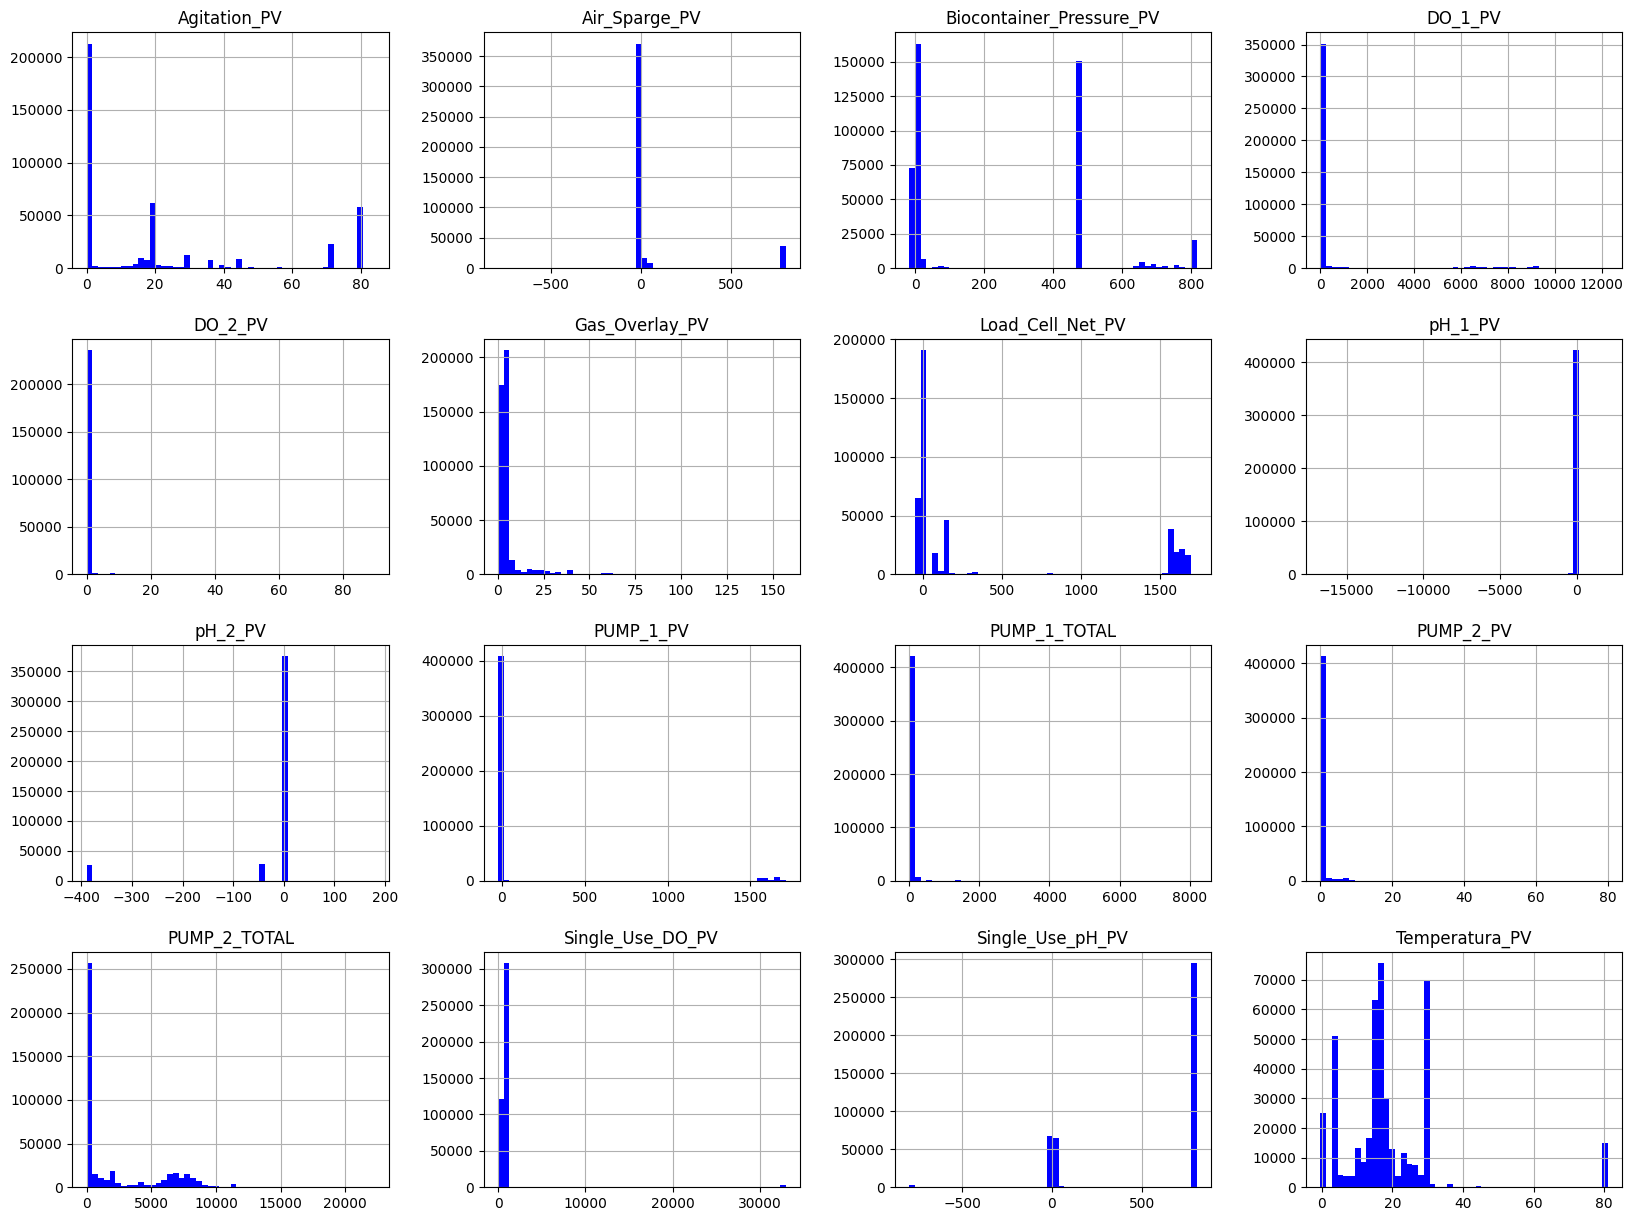

In [16]:
#Histogram for all columns
bt.hist(bins=50, figsize=(20,15), color='b')
plt.show()


From histograms of variables we can see that the dispersion for some variables is high, for example pressure. Also, visually it can be seen that there are values that can't be right, by definition of the variable. pH is a index which can range from 0 to 14, but there are values outside that range. Let's see those rows.

In [17]:
#Rows where pH_2_PV is less than 0 or greater than 14, only show column
bt[(bt['pH_2_PV'] < 0) | (bt['pH_2_PV'] > 14)]['pH_2_PV'].head()




3580   -0.255274
3581   -0.255274
3582   -0.255274
3583   -0.255274
3584   -0.255274
Name: pH_2_PV, dtype: float64

In [18]:
(bt['pH_2_PV'] < 0).sum() + (bt['pH_2_PV'] > 14).sum()

np.int64(215065)

-389.26? Have they created the perfect acid? What happens if they drop it from the container? It tears though the soil up to the core of the Earth?

In total, half of the column for pH_2_PV has wrong data. We can extrapolate values close to the edges to it, but what about the extremes? Let's repeat for columns pH_1_PV and Single_Use_pH_PV

In [19]:
#Rows where pH_2_PV is less than 0 or greater than 14, only show column
bt[(bt['pH_1_PV'] < 0) | (bt['pH_1_PV'] > 14)]['pH_1_PV'].head()

0   -0.156925
1   -0.156925
2   -0.156925
3   -0.156925
4   -0.156925
Name: pH_1_PV, dtype: float64

In [20]:
(bt['pH_1_PV'] < 0).sum() + (bt['pH_1_PV'] > 14).sum()

np.int64(50965)

In [21]:
#Rows where pH_2_PV is less than 0 or greater than 14, only show column
bt[(bt['Single_Use_pH_PV'] < 0) | (bt['Single_Use_pH_PV'] > 14)]['Single_Use_pH_PV'].head()

0    799.967969
1    799.967969
2    799.967969
3    799.967969
4    799.967969
Name: Single_Use_pH_PV, dtype: float64

800, the perfect base.

In [22]:
(bt['Single_Use_pH_PV'] < 0).sum() + (bt['Single_Use_pH_PV'] > 14).sum()

np.int64(302145)

Let's now see the resume per each variable

In [23]:
print(bt.groupby('Num_Biorreactor')['Agitation_PV'].describe())

                   count       mean        std       min        25%  \
Num_Biorreactor                                                       
13169            47939.0  22.050232  31.468260  0.000000   0.000000   
13170            47952.0  29.692431  34.858793  0.000000   0.000000   
13171            47755.0  17.658302  25.926322  0.000000   0.000000   
13172            48086.0  21.470704  27.278393  0.000000   0.000000   
14614            47970.0  27.900242  34.386795  0.000000   0.000000   
14615            48060.0  19.022394   7.666435  2.879999  14.935999   
14616            48054.0  27.403867  34.856413  0.000000   0.000000   
14617            47967.0  13.849633  26.725745  0.000000   0.000000   
14618            48094.0  21.319701  27.653088  0.000000   0.000000   

                       50%        75%       max  
Num_Biorreactor                                  
13169             0.000000  36.000000  80.00000  
13170            20.000000  80.000000  84.00000  
13171             

In [24]:
bt.columns

Index(['DateTime', 'Agitation_PV', 'Air_Sparge_PV', 'Biocontainer_Pressure_PV',
       'DO_1_PV', 'DO_2_PV', 'Gas_Overlay_PV', 'Load_Cell_Net_PV', 'pH_1_PV',
       'pH_2_PV', 'PUMP_1_PV', 'PUMP_1_TOTAL', 'PUMP_2_PV', 'PUMP_2_TOTAL',
       'Single_Use_DO_PV', 'Single_Use_pH_PV', 'Temperatura_PV',
       'Num_Biorreactor'],
      dtype='object')

In [25]:
print("Descriptive statistics for Agitation_PV:")
print(bt.groupby('Num_Biorreactor')['Agitation_PV'].describe())
print("\n")

Descriptive statistics for Agitation_PV:
                   count       mean        std       min        25%  \
Num_Biorreactor                                                       
13169            47939.0  22.050232  31.468260  0.000000   0.000000   
13170            47952.0  29.692431  34.858793  0.000000   0.000000   
13171            47755.0  17.658302  25.926322  0.000000   0.000000   
13172            48086.0  21.470704  27.278393  0.000000   0.000000   
14614            47970.0  27.900242  34.386795  0.000000   0.000000   
14615            48060.0  19.022394   7.666435  2.879999  14.935999   
14616            48054.0  27.403867  34.856413  0.000000   0.000000   
14617            47967.0  13.849633  26.725745  0.000000   0.000000   
14618            48094.0  21.319701  27.653088  0.000000   0.000000   

                       50%        75%       max  
Num_Biorreactor                                  
13169             0.000000  36.000000  80.00000  
13170            20.000000 

In [26]:
print("Descriptive statistics for Air_Sparge_PV:")
print(bt.groupby('Num_Biorreactor')['Air_Sparge_PV'].describe())
print("\n")

Descriptive statistics for Air_Sparge_PV:
                   count        mean         std         min    25%  \
Num_Biorreactor                                                       
13169            47939.0    2.601502   11.546708    0.000000  0.000   
13170            47952.0    2.900448   12.290201    0.000000  0.000   
13171            47755.0    0.203269    1.598309    0.000000  0.000   
13172            48086.0    0.161079    1.392737    0.000000  0.000   
14614            47970.0    2.627570   11.698932    0.000000  0.000   
14615            48060.0  596.475058  346.869553 -794.335986  5.984   
14616            48054.0    2.698571   11.930932    0.000000  0.000   
14617            47967.0    1.675816    9.417125    0.000000  0.000   
14618            48094.0    0.178219    1.462651    0.000000  0.000   

                        50%         75%         max  
Num_Biorreactor                                      
13169              0.000000    0.000000  160.037955  
13170         

In [27]:
print("Descriptive statistics for Biocontainer_Pressure_PV:")
print(bt.groupby('Num_Biorreactor')['Biocontainer_Pressure_PV'].describe())
print("\n")

Descriptive statistics for Biocontainer_Pressure_PV:
                   count        mean         std        min         25%  \
Num_Biorreactor                                                           
13169            47945.0  208.037243  238.238807 -14.382141   -0.804401   
13170            47953.0  139.790907  218.456331  -5.868543   -1.136401   
13171            47757.0  207.211399  237.890199 -17.466855   -0.445921   
13172            48087.0  167.961288  229.240359 -12.795142   -1.006946   
14614            47971.0  128.601994  212.843545 -14.839222   -0.804401   
14615            48060.0  577.740845  314.921425   0.000000  640.967871   
14616            48054.0  166.480441  228.538402 -17.678558   -0.534957   
14617            47967.0  307.409516  230.864840 -13.325246   -0.144588   
14618            48096.0  180.597354  232.652878  -6.820026   -0.824652   

                        50%         75%         max  
Num_Biorreactor                                      
13169        

In [28]:
print("Descriptive statistics for DO_1_PV:")
print(bt.groupby('Num_Biorreactor')['DO_1_PV'].describe())
print("\n")


Descriptive statistics for DO_1_PV:
                   count         mean          std       min  25%  \
Num_Biorreactor                                                     
13169            47941.0     5.661660    23.656879  0.000000  0.0   
13170            47952.0     7.265186    16.070681  0.000000  0.0   
13171            46785.0     3.106710    11.683093  0.000000  0.0   
13172             1178.0     1.881705     7.540776  0.000000  0.0   
14614            47970.0     6.195418    14.491800  0.000000  0.0   
14615            48061.0  3647.979931  3586.865184  0.000000  0.0   
14616            48054.0     5.030329    11.980638  0.000000  0.0   
14617            47967.0     2.791717     9.068869 -0.281366  0.0   
14618            48094.0     2.769094    10.635949  0.000000  0.0   

                         50%          75%           max  
Num_Biorreactor                                          
13169               0.000000     0.000000   4262.800000  
13170               0.000000  

In [29]:
print("Descriptive statistics for DO_2_PV:")
print(bt.groupby('Num_Biorreactor')['DO_2_PV'].describe())
print("\n")

Descriptive statistics for DO_2_PV:
                   count      mean        std       min       25%       50%  \
Num_Biorreactor                                                               
13169             1395.0  1.071074   5.668946 -0.007697 -0.007697 -0.007697   
13170             1624.0  0.000000   0.000000  0.000000  0.000000  0.000000   
13171            47755.0  0.052313   2.160249  0.000000  0.000000  0.000000   
13172            48086.0  3.295799  11.825040  0.000000  0.000000  0.000000   
14614            47971.0 -0.005427   0.000733 -0.005530 -0.005530 -0.005530   
14615            48060.0  0.518288   1.694473  0.000000  0.000000  0.000000   
14616            48054.0  0.001346   0.294981  0.000000  0.000000  0.000000   
14617             1150.0  0.000000   0.000000  0.000000  0.000000  0.000000   
14618             1251.0  0.000000   0.000000  0.000000  0.000000  0.000000   

                     75%        max  
Num_Biorreactor                      
13169            0

In [30]:
print("Descriptive statistics for Gas_Overlay_PV:")
print(bt.groupby('Num_Biorreactor')['Gas_Overlay_PV'].describe())
print("\n")

Descriptive statistics for Gas_Overlay_PV:


                   count       mean        std  min       25%        50%  \
Num_Biorreactor                                                            
13169            47939.0   2.388680   2.524671  0.0  0.000000   3.999587   
13170            47952.0   2.673700   2.130250  0.0  0.000000   3.999563   
13171            47755.0   1.976907   2.197306  0.0  0.000000   0.000000   
13172            48086.0   2.434127   1.964264  0.0  0.000000   3.999765   
14614            47970.0   3.179065   2.458059  0.0  0.000000   3.999900   
14615            48061.0  24.139296  20.485735  0.0  9.239999  21.119997   
14616            48054.0   2.437565   2.029030  0.0  0.000000   3.999731   
14617            47967.0   1.411087   2.115722  0.0  0.000000   0.000000   
14618            48095.0   2.176757   2.099013  0.0  0.000000   3.999652   

                       75%         max  
Num_Biorreactor                         
13169             4.000068   20.592549  
13170             4.000168   18.399838  

In [31]:
print("Descriptive statistics for Load_Cell_Net_PV:")
print(bt.groupby('Num_Biorreactor')['Load_Cell_Net_PV'].describe())
print("\n")

Descriptive statistics for Load_Cell_Net_PV:
                   count        mean         std        min    25%  \
Num_Biorreactor                                                      
13169            47942.0  664.331123  786.575572 -24.800000 -18.40   
13170            47953.0  829.763131  801.459025 -84.400000 -17.60   
13171            47757.0   54.850920   73.671666  -8.604112  -6.48   
13172            48087.0   70.357556   77.132751  -8.479657  -6.16   
14614            47972.0  723.199197  780.332766 -22.800000  -1.20   
14615            48060.0    0.003039    0.384737   0.000000   0.00   
14616            48054.0  737.509252  801.436624 -27.200000 -16.80   
14617            47967.0  440.529907  714.418416 -26.800000  -1.20   
14618            48096.0   63.016860   74.350430  -9.040000  -6.24   

                         50%          75%          max  
Num_Biorreactor                                         
13169               0.400000  1590.400000  1700.826514  
13170        

In [32]:
print("Descriptive statistics for pH_1_PV:")
print(bt.groupby('Num_Biorreactor')['pH_1_PV'].describe())
print("\n")

Descriptive statistics for pH_1_PV:
                   count       mean         std           min       25%  \
Num_Biorreactor                                                           
13169            47940.0   3.093624    2.441836     -0.033251  1.563560   
13170            47305.0   3.834368    2.088075     -1.499362  1.583819   
13171            43276.0   3.092163    2.153384     -0.328578  1.457041   
13172            48087.0  -0.557152    4.195475     -4.779090 -4.686229   
14614            47972.0   3.078209    2.187794     -0.156925  1.516280   
14615            48061.0   2.013196    3.010385     -0.264446 -0.234763   
14616            48054.0   1.808313  400.586570 -16705.317188  1.579833   
14617            47967.0   2.808930    1.793312     -0.098878  1.698633   
14618            48096.0 -31.450050  135.055240   -527.387158  4.539851   

                      50%       75%          max  
Num_Biorreactor                                   
13169            1.665760  5.639794 

In [33]:
print("Descriptive statistics for pH_2_PV:")
print(bt.groupby('Num_Biorreactor')['pH_2_PV'].describe())
print("\n")

Descriptive statistics for pH_2_PV:
                   count        mean         std         min         25%  \
Num_Biorreactor                                                            
13169            47940.0   -0.020121    0.088208   -0.347235   -0.011332   
13170            47953.0  -23.006696   18.846901  -38.210712  -38.210712   
13171            45594.0    3.072010    0.605580   -0.016351    3.200000   
13172            48087.0    1.227808    2.592923   -0.851783   -0.851783   
14614            47972.0    0.000656    1.018567   -0.255274   -0.255274   
14615            48061.0    2.557953    1.831666    0.000000    1.300273   
14616            48054.0 -208.914982  195.424102 -389.260962 -389.260962   
14617            47967.0   -0.147510    1.577168   -1.969051   -1.969051   
14618            48096.0    2.500757    2.314162   -0.342431    0.598121   

                        50%       75%         max  
Num_Biorreactor                                    
13169             -0.01

In [34]:
print("Descriptive statistics for PUMP_1_PV:")
print(bt.groupby('Num_Biorreactor')['PUMP_1_PV'].describe())
print("\n")

Descriptive statistics for PUMP_1_PV:
                   count        mean         std   min   25%  50%     75%  \
Num_Biorreactor                                                             
13169            47939.0    0.009560    0.591963   0.0   0.0  0.0     0.0   
13170            47952.0    0.011006    0.715615   0.0   0.0  0.0     0.0   
13171            47755.0    0.002065    0.214428   0.0   0.0  0.0     0.0   
13172            48086.0    0.001996    0.309558   0.0   0.0  0.0     0.0   
14614            47970.0    0.004003    0.438301   0.0   0.0  0.0     0.0   
14615            48061.0  741.588541  800.297193 -22.4 -16.4  2.8  1592.0   
14616            48054.0    0.002997    0.379252   0.0   0.0  0.0     0.0   
14617            47967.0    0.000797    0.174499   0.0   0.0  0.0     0.0   
14618            48094.0    0.000998    0.218875   0.0   0.0  0.0     0.0   

                         max  
Num_Biorreactor               
13169              80.000000  
13170              48

In [35]:
print("Descriptive statistics for PUMP_1_TOTAL:")
print(bt.groupby('Num_Biorreactor')['PUMP_1_TOTAL'].describe())
print("\n")


Descriptive statistics for PUMP_1_TOTAL:


                   count       mean         std  min        25%        50%  \
Num_Biorreactor                                                              
13169            47940.0  79.654032  303.577819  0.0  12.400000  24.800002   
13170            47953.0  54.089623  227.285274  0.0   9.600000  18.000000   
13171            47756.0  36.590068  101.605139  0.0   7.439999   9.920000   
13172            48087.0  11.264756   12.879822  0.0   4.960000   7.439999   
14614            47972.0  45.618193   69.663801  0.0  14.880000  32.239999   
14615            48060.0   2.771288    2.139259  0.0   0.000000   3.999800   
14616            48054.0  48.465288   60.065844  0.0  12.400000  34.719998   
14617            47967.0  64.224683   66.363623  0.0  24.800002  49.599991   
14618            48096.0  18.441754   27.211317  0.0   7.439999  12.400000   

                       75%          max  
Num_Biorreactor                          
13169            74.399982  2987.585547  
13170          

In [36]:
print("Descriptive statistics for PUMP_2_PV:")
print(bt.groupby('Num_Biorreactor')['PUMP_2_PV'].describe())
print("\n")

Descriptive statistics for PUMP_2_PV:
                   count      mean       std  min  25%  50%  75%        max
Num_Biorreactor                                                            
13169            47940.0  0.422480  1.523038  0.0  0.0  0.0  0.0  46.867441
13170            47952.0  0.533255  1.731224  0.0  0.0  0.0  0.0  48.000000
13171            47755.0  0.025990  0.404671  0.0  0.0  0.0  0.0  48.000000
13172            48086.0  0.017902  0.494674  0.0  0.0  0.0  0.0  48.000000
14614            47970.0  0.431322  1.567480  0.0  0.0  0.0  0.0  80.000000
14615            48060.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.000000
14616            48054.0  0.459112  1.595708  0.0  0.0  0.0  0.0  48.000000
14617            47967.0  0.252685  1.201884  0.0  0.0  0.0  0.0  48.000000
14618            48094.0  0.014245  0.449777  0.0  0.0  0.0  0.0  72.000000




In [37]:
print("Descriptive statistics for PUMP_2_TOTAL:")
print(bt.groupby('Num_Biorreactor')['PUMP_2_TOTAL'].describe())
print("\n")

Descriptive statistics for PUMP_2_TOTAL:
                   count         mean          std  min          25%  \
Num_Biorreactor                                                        
13169            47940.0  3636.428698  3541.153566  0.0     0.000000   
13170            47953.0  4111.451776  4528.482384  0.0     0.000000   
13171            47756.0   471.754425  1142.744120  0.0     0.000000   
13172            48087.0    18.354265    78.606721  0.0     0.000000   
14614            47972.0  3540.257883  3448.011286  0.0     0.000000   
14615            48060.0     5.813831    12.754246  0.0     0.000000   
14616            48054.0  3825.414684  3443.966762  0.0   150.563818   
14617            47967.0  3686.075363  3072.608697  0.0  1653.925000   
14618            48095.0    27.468309    88.202283  0.0     0.000000   

                         50%          75%           max  
Num_Biorreactor                                          
13169            1713.515223  7517.381250  22260.5

In [38]:
print("Descriptive statistics for Single_Use_DO_PV:")
print(bt.groupby('Num_Biorreactor')['Single_Use_DO_PV'].describe())
print("\n")

Descriptive statistics for Single_Use_DO_PV:
                   count         mean          std        min         25%  \
Num_Biorreactor                                                             
13169            47941.0   587.299919   296.335998   0.000000  655.086768   
13170            47952.0   586.632232   308.615392   0.000000  663.893799   
13171            47755.0   674.701970   261.325842   0.000000  712.941797   
13172            48086.0   690.827001   254.611412   0.000000  736.844434   
14614            47970.0   611.919448   300.299917   0.000000  698.499951   
14615            48061.0   148.239273   221.862870 -14.840857   -0.423723   
14616            48054.0  2505.258850  7622.647642   0.000000  637.647070   
14617            47967.0   665.568743   254.877459   0.000000  731.655420   
14618            48094.0   707.844035   239.384771   0.000000  735.895508   

                        50%         75%           max  
Num_Biorreactor                                    

In [39]:
print("Descriptive statistics for Single_Use_pH_PV:")
print(bt.groupby('Num_Biorreactor')['Single_Use_pH_PV'].describe())
print("\n")

Descriptive statistics for Single_Use_pH_PV:


                   count        mean         std         min         25%  \
Num_Biorreactor                                                            
13169            47939.0  589.883287  351.098117 -788.247998    6.087988   
13170            47952.0  623.764271  330.018406   -0.400000  799.687988   
13171            47755.0  628.815058  345.260436 -790.128027  799.912012   
13172            48086.0  677.109585  297.374994 -794.047998  799.935986   
14614            47970.0  556.635964  376.543569 -794.223975    5.912012   
14615            48060.0    3.202747   12.943404    0.000000    0.000000   
14616            48054.0  616.261361  336.037650 -794.271973  799.687988   
14617            47967.0  492.032695  434.237034 -794.367969    5.895996   
14618            48094.0  708.243909  254.144807    0.096000  799.960010   

                        50%         75%         max  
Num_Biorreactor                                      
13169            799.847998  799.912012  800.119971  
1

In [40]:
print("Descriptive statistics for Temperatura_PV:")
print(bt.groupby('Num_Biorreactor')['Temperatura_PV'].describe())
print("\n")

Descriptive statistics for Temperatura_PV:
                   count       mean        std       min        25%  \
Num_Biorreactor                                                       
13169            47940.0  17.538095   8.013500  0.134221  14.279996   
13170            47952.0  17.415170   9.153360 -0.400000  12.856006   
13171            47755.0  17.078610   7.762257  0.157253  13.499294   
13172            48087.0  16.279289   8.635179  0.000000  10.456031   
14614            47971.0  18.024732   8.206971  3.047998  14.704004   
14615            48060.0  29.496487  35.796978  0.000000   0.000000   
14616            48054.0  17.610518   8.591194  3.015997  14.070899   
14617            47967.0  16.674519   6.442489  3.032001  14.494048   
14618            48095.0  16.607862   8.151115 -0.247998  13.656006   

                       50%        75%        max  
Num_Biorreactor                                   
13169            16.174336  23.367996  80.831995  
13170            16.11

In [41]:
# Convert to datetime
bt['DateTime'] = pd.to_datetime(bt['DateTime'])

In [42]:
# Do all groups follow the +15 minutes rule? (sort first before diff)
weird_minutes = bt.groupby('Num_Biorreactor')['DateTime'].apply(lambda x: x.sort_values().diff().dt.total_seconds())
weird_minutes = weird_minutes[weird_minutes > 900]
weird_minutes

Num_Biorreactor        
13169            263129    4500.0
                 298745    4500.0
13170            315542    4500.0
                 351158    4500.0
13171            53477     4500.0
                 89093     4500.0
13172            158303    4500.0
                 193919    4500.0
14614            1064      4500.0
                 36680     4500.0
14615            105890    4500.0
                 141506    4500.0
14616            420368    4500.0
                 455984    4500.0
14617            367955    4500.0
                 403571    4500.0
14618            210716    4500.0
                 246332    4500.0
Name: DateTime, dtype: float64

In [43]:
# Loc weird_minutes by second level index
ind = weird_minutes.index.get_level_values(1)
bt.loc[ind]

,DateTime,Agitation_PV,Air_Sparge_PV,Biocontainer_Pressure_PV,DO_1_PV,DO_2_PV,Gas_Overlay_PV,Load_Cell_Net_PV,pH_1_PV,pH_2_PV,PUMP_1_PV,PUMP_1_TOTAL,PUMP_2_PV,PUMP_2_TOTAL,Single_Use_DO_PV,Single_Use_pH_PV,Temperatura_PV,Num_Biorreactor
263129,2023-03-26 03:00:00,0.000000,0.000000,480.000000,0.000000,NaN,0.000000,-19.600000,1.563560,-0.011332,0.0,27.280002,0.0,1486.330176,655.892432,799.623975,17.726984,13169
298745,2024-03-31 03:00:00,0.000000,0.000000,480.000000,0.000000,NaN,0.000000,-18.400000,1.589182,-0.011332,0.0,39.679996,0.0,7637.635938,693.113818,799.847998,15.923848,13169
315542,2023-03-26 03:00:00,0.000000,0.000000,480.000000,0.000000,NaN,0.000000,-16.000000,1.623706,-0.138586,0.0,30.000000,0.0,8707.276563,686.276074,799.839990,16.623999,13170
351158,2024-03-31 03:00:00,0.000000,0.000000,480.000000,0.000000,0.00000,0.000000,-17.200000,1.572478,-38.210712,0.0,34.800000,0.0,7083.582031,715.940625,799.895996,15.542689,13170
53477,2023-03-26 03:00:00,32.000000,0.000000,1.626208,0.000000,0.00000,3.999720,98.400006,5.944230,3.200000,0.0,96.719971,0.0,75.446790,799.991992,800.519971,29.735715,13171
89093,2024-03-31 03:00:00,0.000000,0.000000,480.000000,0.000000,0.00000,0.000000,-5.600000,1.383357,3.200000,0.0,12.400000,0.0,57.759473,723.647168,799.991992,16.568927,13171
158303,2023-03-26 03:00:00,72.000000,0.000000,-1.270258,NaN,0.00000,4.000370,154.640002,1.507032,-0.851783,0.0,0.000000,0.0,0.000000,799.991992,800.391992,3.223999,13172
193919,2024-03-31 03:00:00,0.000000,0.000000,480.000000,NaN,0.00000,0.000000,-6.960000,-4.686229,1.298498,0.0,7.439999,0.0,2.766121,736.844434,800.208008,17.135999,13172
1064,2023-03-26 03:00:00,0.000000,0.000000,480.000000,0.000000,-0.00553,0.000000,-18.000000,-0.156925,1.350532,0.0,66.959973,0.0,8552.753906,684.221729,799.967969,17.112000,14614
36680,2024-03-31 03:00:00,0.000000,0.000000,480.000000,0.000000,-0.00553,0.000000,-17.600000,1.467677,-0.255274,0.0,32.239999,0.0,6269.859375,738.545020,799.943994,16.312000,14614


In [44]:
weird_minutes_oct = bt.groupby('Num_Biorreactor')['DateTime'].apply(lambda x: x.sort_values().diff().dt.total_seconds())
weird_minutes_oct = weird_minutes_oct[weird_minutes_oct < 900]
weird_minutes_oct

Num_Biorreactor        
13169            283961    0.0
                 283958    0.0
                 283963    0.0
                 283960    0.0
13170            336374    0.0
                 336371    0.0
                 336376    0.0
                 336373    0.0
13171            74309     0.0
                 74306     0.0
                 74311     0.0
                 74308     0.0
13172            179135    0.0
                 179132    0.0
                 179137    0.0
                 179134    0.0
14614            21896     0.0
                 21893     0.0
                 21898     0.0
                 21895     0.0
14615            126722    0.0
                 126719    0.0
                 126724    0.0
                 126721    0.0
14616            441200    0.0
                 441197    0.0
                 441202    0.0
                 441199    0.0
14617            388787    0.0
                 388784    0.0
                 388789    0.0
               

In [45]:
# Loc weird_minutes by second level index
ind = weird_minutes_oct.index.get_level_values(1)
bt.loc[ind]

,DateTime,Agitation_PV,Air_Sparge_PV,Biocontainer_Pressure_PV,DO_1_PV,DO_2_PV,Gas_Overlay_PV,Load_Cell_Net_PV,pH_1_PV,pH_2_PV,PUMP_1_PV,PUMP_1_TOTAL,PUMP_2_PV,PUMP_2_TOTAL,Single_Use_DO_PV,Single_Use_pH_PV,Temperatura_PV,Num_Biorreactor
283961,2023-10-29 02:00:00,0.000000,0.000000,480.000000,0.0,NaN,0.000000,-20.800000,1.433881,-0.011332,0.0,74.399982,0.0,6585.218750,660.495361,799.975977,8.983999,13169
283958,2023-10-29 02:15:00,0.000000,0.000000,480.000000,0.0,NaN,0.000000,-20.800000,1.433881,-0.011332,0.0,74.399982,0.0,6585.218750,660.495361,799.975977,8.888003,13169
283963,2023-10-29 02:30:00,0.000000,0.000000,480.000000,0.0,NaN,0.000000,-20.800000,1.433881,-0.011332,0.0,74.399982,0.0,6585.218750,660.495361,799.975977,8.988277,13169
283960,2023-10-29 02:45:00,0.000000,0.000000,480.000000,0.0,NaN,0.000000,-20.800000,1.488061,-0.011332,0.0,74.399982,0.0,5922.862026,660.495361,799.975977,8.903994,13169
336374,2023-10-29 02:00:00,20.000000,0.000000,-2.445026,0.0,NaN,3.999715,1574.000000,3.531377,-38.210712,0.0,13.200000,0.0,0.000000,766.275830,800.031982,4.791998,13170
336371,2023-10-29 02:15:00,20.000000,0.000000,-2.484169,0.0,NaN,4.000606,1574.000000,3.531377,-38.210712,0.0,13.200000,0.0,0.000000,766.275830,800.031982,4.735999,13170
336376,2023-10-29 02:30:00,20.000000,0.000000,-2.486954,0.0,NaN,3.999850,1574.000000,3.531377,-38.210712,0.0,13.200000,0.0,0.000000,766.275830,800.031982,4.823999,13170
336373,2023-10-29 02:45:00,20.000000,0.000000,-2.483061,0.0,NaN,4.000522,1574.000000,3.531377,-38.210712,0.0,13.200000,0.0,0.000000,766.275830,800.031982,4.791998,13170
74309,2023-10-29 02:00:00,0.000000,0.000000,480.000000,0.0,0.00000,0.000000,0.080000,3.223364,3.200000,0.0,512.534473,0.0,2426.916602,834.803223,800.087988,9.423999,13171
74306,2023-10-29 02:15:00,0.000000,0.000000,480.000000,0.0,0.00000,0.000000,0.080000,3.223364,3.200000,0.0,512.534473,0.0,2426.916602,834.803223,800.087988,9.280005,13171


In [46]:
# Are there dupe rows
bt.duplicated().sum()

np.int64(0)

In [47]:
bt[(bt['DateTime'] >= '2023-10-29 00:00:00') & (bt['DateTime'] < '2023-10-29 04:00:00')]

,DateTime,Agitation_PV,Air_Sparge_PV,Biocontainer_Pressure_PV,DO_1_PV,DO_2_PV,Gas_Overlay_PV,Load_Cell_Net_PV,pH_1_PV,pH_2_PV,PUMP_1_PV,PUMP_1_TOTAL,PUMP_2_PV,PUMP_2_TOTAL,Single_Use_DO_PV,Single_Use_pH_PV,Temperatura_PV,Num_Biorreactor
21884,2023-10-29 00:00:00,0.0,0.0,-3.830325,0.0,-0.00553,4.000035,-0.800000,1.728335,-0.255274,0.0,66.959985,0.0,6825.221875,799.991992,800.016016,10.047998,14614
21885,2023-10-29 00:15:00,0.0,0.0,-3.802081,0.0,-0.00553,4.000367,-0.800000,1.728335,-0.255274,0.0,66.959985,0.0,6825.221875,799.991992,800.016016,10.047998,14614
21886,2023-10-29 00:30:00,0.0,0.0,-3.843715,0.0,-0.00553,4.000248,-0.800000,1.728335,-0.255274,0.0,66.959985,0.0,6825.221875,799.991992,800.016016,10.023999,14614
21887,2023-10-29 00:45:00,0.0,0.0,-3.811757,0.0,-0.00553,3.999834,-0.800000,1.728335,-0.255274,0.0,66.959985,0.0,6825.221875,799.991992,800.016016,10.047998,14614
21888,2023-10-29 01:00:00,0.0,0.0,-3.841122,0.0,-0.00553,3.999736,-0.800000,1.728335,-0.255274,0.0,66.959985,0.0,6825.221875,799.991992,800.016016,10.000000,14614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441203,2023-10-29 02:45:00,0.0,0.0,480.000000,0.0,0.00000,0.000000,-17.200000,3.079762,-389.260962,0.0,0.000000,0.0,0.000000,723.058545,800.064014,9.647998,14616
441204,2023-10-29 03:00:00,0.0,0.0,480.000000,0.0,0.00000,0.000000,-17.200000,3.079762,-389.260962,0.0,0.000000,0.0,0.000000,723.058545,800.064014,9.712000,14616
441205,2023-10-29 03:15:00,0.0,0.0,480.000000,0.0,0.00000,0.000000,-17.600000,3.079762,-389.260962,0.0,0.000000,0.0,0.000000,723.058545,800.064014,9.719319,14616
441206,2023-10-29 03:30:00,0.0,0.0,480.000000,0.0,0.00000,0.000000,-17.200000,3.079762,-389.260962,0.0,0.000000,0.0,0.000000,723.058545,800.064014,9.720630,14616


Fix later, in rebuild, the datetimes

In [48]:
bt.columns

Index(['DateTime', 'Agitation_PV', 'Air_Sparge_PV', 'Biocontainer_Pressure_PV',
       'DO_1_PV', 'DO_2_PV', 'Gas_Overlay_PV', 'Load_Cell_Net_PV', 'pH_1_PV',
       'pH_2_PV', 'PUMP_1_PV', 'PUMP_1_TOTAL', 'PUMP_2_PV', 'PUMP_2_TOTAL',
       'Single_Use_DO_PV', 'Single_Use_pH_PV', 'Temperatura_PV',
       'Num_Biorreactor'],
      dtype='object')

In [49]:
bt.to_csv('../../data/processed/Biorreactor_Total.csv', index=False)

# Joining centrifuga data into a single file

In [50]:
import pandas as pd
import numpy as np
import os

# Ruta de la carpeta que contiene los archivos Excel
folder_path = '../../data/raw'

# Lista para almacenar los dataframes
dfs = []

# Iterar sobre los archivos en la carpeta
print("Iniciando lectura de archivos...")
for filename in os.listdir(folder_path):
    # Verificar si el archivo es un archivo Excel de un biorreactor y no acaba con ":Zone.Identifier"
    if filename.startswith("Centrífuga") and filename.endswith(".xlsx") and not filename.endswith(":Zone.Identifier"):
        print(f"Leyendo archivo {filename}...")
        # Leer el archivo Excel
        print("Leyendo archivo...")
        df = pd.read_excel(os.path.join(folder_path, filename), sheet_name="Datos")
        
        # Extraer el número del biorreactor del nombre del archivo
        print("Extrayendo número de centrífuga...")
        num_centrifuga = filename.split()[1].split('.')[0]
        
        # Añadir la columna "Num_biorreactor"
        print("Añadiendo columna 'Num_centrífuga'...")
        df['Num_centrifuga'] = float(num_centrifuga)

        #Eliminar "XXXXX_" de los nombres de las columnas (los 5 primeros números)
        print("Eliminando 'XXXXX_' de los nombres de las columnas...")
        df.columns = df.columns.str.replace(r'^\d{5}_', '', regex=True)
        
        # Reordenar columnas de tal manera: Datetime, EN_parcial, EN_total, D01780551.PV, D01906041.PV, D01916047.PV, D01916503.PV, D01919022.PV, Num_centrifuga
        print("Reordenando columnas...")
        df = df[['DateTime', 'CTF0101.EN_Parcial', 'CTF0101.EN_Total', 'D01780551.PV', 'D01906041.PV', 'D01916047.PV', 'D01916503.PV', 'D01919022.PV', 'Num_centrifuga']]

        #Renombrar columnas
        print("Renombrando columnas...")
        df.columns = ['DateTime', 'EN_parcial', 'EN_total', 'Apertura valvula agua', 'Caudal', 'Contrapresion', 'Presion agua', 'Velocidad separacion', 'Num_centrifuga']
        
        # Añadir el dataframe a la lista
        print("Añadiendo dataframe a la lista...")
        dfs.append(df)

# Concatenar todos los dataframes en uno solo (uniendo filas)
print("Concatenando dataframes...")
df_total = pd.concat(dfs, ignore_index=True)

# Guardar el dataframe resultante en un nuevo archivo Excel
print("Guardando archivo Excel...")
df_total.to_excel('../../data/processed/Centrifuga_Total.xlsx', index=False)

Iniciando lectura de archivos...
Leyendo archivo Centrífuga 17825.xlsx...
Leyendo archivo...
Extrayendo número de centrífuga...
Añadiendo columna 'Num_centrífuga'...
Eliminando 'XXXXX_' de los nombres de las columnas...
Reordenando columnas...
Renombrando columnas...
Añadiendo dataframe a la lista...
Leyendo archivo Centrífuga 12912.xlsx...
Leyendo archivo...
Extrayendo número de centrífuga...
Añadiendo columna 'Num_centrífuga'...
Eliminando 'XXXXX_' de los nombres de las columnas...
Reordenando columnas...
Renombrando columnas...
Añadiendo dataframe a la lista...
Leyendo archivo Centrífuga 14246.xlsx...
Leyendo archivo...
Extrayendo número de centrífuga...
Añadiendo columna 'Num_centrífuga'...
Eliminando 'XXXXX_' de los nombres de las columnas...
Reordenando columnas...
Renombrando columnas...
Añadiendo dataframe a la lista...
Concatenando dataframes...
Guardando archivo Excel...


In [51]:
#Tipo de dato de cada columna
print("Tipo de dato de cada columna:")
print(df_total.dtypes)


Tipo de dato de cada columna:
DateTime                  object
EN_parcial               float64
EN_total                 float64
Apertura valvula agua    float64
Caudal                   float64
Contrapresion            float64
Presion agua             float64
Velocidad separacion     float64
Num_centrifuga           float64
dtype: object


# Centrifuga: anomalies detection and analysis

In [1371]:
import pandas as pd

In [1372]:
ct = pd.read_excel('../../data/processed/Centrifuga_Total.xlsx')
ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157239 entries, 0 to 157238
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DateTime               157239 non-null  object 
 1   EN_parcial             154983 non-null  float64
 2   EN_total               155199 non-null  float64
 3   Apertura valvula agua  156224 non-null  float64
 4   Caudal                 156223 non-null  float64
 5   Contrapresion          156223 non-null  float64
 6   Presion agua           111674 non-null  float64
 7   Velocidad separacion   156224 non-null  float64
 8   Num_centrifuga         157239 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 10.8+ MB


In [1373]:
ct.head()

,DateTime,EN_parcial,EN_total,Apertura valvula agua,Caudal,Contrapresion,Presion agua,Velocidad separacion,Num_centrifuga
0,2023-03-15 00:00:00.000,0.0,0.0,100.0,0.0,0.411225,NaN,0.0,17825
1,2023-03-15 00:15:00.000,0.0,0.0,100.0,0.0,0.411225,NaN,0.0,17825
2,2023-03-15 00:30:00.000,0.0,0.0,100.0,0.0,0.410938,NaN,0.0,17825
3,2023-03-15 00:45:00.000,0.0,0.0,100.0,0.0,0.411229,NaN,0.0,17825
4,2023-03-15 01:00:00.000,0.0,0.0,100.0,0.0,0.411227,NaN,0.0,17825


In [1374]:
# Are there any dupe rows?
ct.duplicated().sum()

np.int64(0)

In [1375]:
# Describe each float column
ct.describe()

,EN_parcial,EN_total,Apertura valvula agua,Caudal,Contrapresion,Presion agua,Velocidad separacion,Num_centrifuga
count,154983.000000,155199.000000,156224.000000,156223.000000,156223.000000,111674.000000,156224.000000,157239.000000
mean,0.001361,0.050890,95.838774,24.764024,0.319711,0.402061,358.151126,14994.333333
std,0.097877,1.084302,16.723563,136.241759,0.709665,0.451891,1486.449974,2074.356990
min,0.000000,0.000000,17.000000,0.000000,-0.800000,-0.142530,0.000000,12912.000000
25%,0.000000,0.000000,100.000000,0.000000,0.002080,0.024688,0.000000,12912.000000
50%,0.000000,0.000000,100.000000,0.000000,0.406304,0.412799,0.000000,14246.000000
75%,0.000000,0.000000,100.000000,0.000000,0.428968,0.453626,0.000000,17825.000000
max,12.000000,66.000000,100.000000,2400.000000,7.074342,4.000000,6694.487420,17825.000000


Interesting values, specially those with a mean near 0, considering their max is way more than 0. There are a lot of 0 values, and a lot of nulls.

In [1376]:
# For each column show the number of missing values
ct.isnull().sum()

DateTime                     0
EN_parcial                2256
EN_total                  2040
Apertura valvula agua     1015
Caudal                    1016
Contrapresion             1016
Presion agua             45565
Velocidad separacion      1015
Num_centrifuga               0
dtype: int64

In [1377]:
# For each column show the number of 0 values
(ct == 0).sum()

DateTime                      0
EN_parcial               154939
EN_total                 153787
Apertura valvula agua         0
Caudal                   148744
Contrapresion                 0
Presion agua                 15
Velocidad separacion     147338
Num_centrifuga                0
dtype: int64

Why does the data exhibit this pattern?  Some values are never zero meanwhile others are almost always zero.

In [1378]:
# Describe using groupby Num_centrifuga
print(ct.groupby('Num_centrifuga')['EN_parcial'].describe())

                  count      mean       std  min  25%  50%  75%   max
Num_centrifuga                                                       
12912           51327.0  0.000156  0.016515  0.0  0.0  0.0  0.0   3.0
14246           51828.0  0.003859  0.168256  0.0  0.0  0.0  0.0  12.0
17825           51828.0  0.000058  0.007608  0.0  0.0  0.0  0.0   1.0


In [1379]:
print(ct.groupby('Num_centrifuga')['EN_total'].describe())

                  count      mean       std  min  25%  50%  75%   max
Num_centrifuga                                                       
12912           51058.0  0.055310  1.093471  0.0  0.0  0.0  0.0  62.0
14246           51828.0  0.035251  0.814950  0.0  0.0  0.0  0.0  62.0
17825           52313.0  0.062069  1.289459  0.0  0.0  0.0  0.0  66.0


In [1380]:
print(ct.groupby('Num_centrifuga')['Apertura valvula agua'].describe())

                  count       mean        std        min    25%    50%    75%  \
Num_centrifuga                                                                  
12912           51487.0  96.426133  15.408582  17.000000  100.0  100.0  100.0   
14246           52368.0  95.374782  17.798649  22.863174  100.0  100.0  100.0   
17825           52369.0  95.725292  16.838906  23.652878  100.0  100.0  100.0   

                  max  
Num_centrifuga         
12912           100.0  
14246           100.0  
17825           100.0  


In [1381]:
print(ct.groupby('Num_centrifuga')['Caudal'].describe())

                  count       mean         std  min  25%  50%  75%  \
Num_centrifuga                                                       
12912           51487.0  22.781724  131.454222  0.0  0.0  0.0  0.0   
14246           52368.0  26.400984  137.303909  0.0  0.0  0.0  0.0   
17825           52368.0  25.076015  139.733254  0.0  0.0  0.0  0.0   

                        max  
Num_centrifuga               
12912           2309.516897  
14246           2400.000000  
17825           2181.597266  


In [1382]:
print(ct.groupby('Num_centrifuga')['Contrapresion'].describe())

                  count      mean       std       min       25%       50%  \
Num_centrifuga                                                              
12912           51487.0  0.138600  0.783119 -0.800000 -0.005302 -0.001100   
14246           52368.0  0.412692  0.668566 -0.051759  0.008449  0.416701   
17825           52368.0  0.404795  0.635882 -0.800000  0.002105  0.407345   

                     75%       max  
Num_centrifuga                      
12912           0.418577  7.074342  
14246           0.428009  6.895808  
17825           0.457419  6.853874  


In [1383]:
print(ct.groupby('Num_centrifuga')['Presion agua'].describe())

                  count      mean       std       min       25%       50%  \
Num_centrifuga                                                              
12912           36637.0  0.452688  0.577266 -0.142530  0.018148  0.401221   
14246           37518.0  0.386954  0.382353 -0.136785  0.083663  0.418113   
17825           37519.0  0.367732  0.363757 -0.026177  0.021007  0.452082   

                     75%       max  
Num_centrifuga                      
12912           0.419799  4.000000  
14246           0.423275  3.227609  
17825           0.464062  2.595497  


In [1384]:
print(ct.groupby('Num_centrifuga')['Velocidad separacion'].describe())

                  count        mean          std  min  25%  50%  75%  \
Num_centrifuga                                                         
12912           51487.0  317.621721  1404.263199  0.0  0.0  0.0  0.0   
14246           52368.0  396.126960  1558.386114  0.0  0.0  0.0  0.0   
17825           52369.0  360.022824  1490.337105  0.0  0.0  0.0  0.0   

                        max  
Num_centrifuga               
12912           6689.361345  
14246           6694.331250  
17825           6694.487420  


In [1385]:
# Convert to datetime
ct['DateTime'] = pd.to_datetime(ct['DateTime'])

In [1386]:
# Do all groups follow the +15 minutes rule? (sort first before diff)
weird_minutes = ct.groupby('Num_centrifuga')['DateTime'].apply(lambda x: x.sort_values().diff().dt.total_seconds())
weird_minutes = weird_minutes[weird_minutes > 900]
weird_minutes


Num_centrifuga        
12912           53477     4500.0
                89093     4500.0
14246           105890    4500.0
                141506    4500.0
17825           1064      4500.0
                36680     4500.0
Name: DateTime, dtype: float64

In [1387]:
# Loc weird_minutes by second level index
ind = weird_minutes.index.get_level_values(1)
ct.loc[ind]

,DateTime,EN_parcial,EN_total,Apertura valvula agua,Caudal,Contrapresion,Presion agua,Velocidad separacion,Num_centrifuga
53477,2023-03-26 03:00:00,0.0,0.0,100.0,0.0,0.427999,NaN,0.0,12912
89093,2024-03-31 03:00:00,0.0,0.0,100.0,0.0,0.410648,0.403475,0.0,12912
105890,2023-03-26 03:00:00,0.0,0.0,100.0,0.0,0.006434,NaN,0.0,14246
141506,2024-03-31 03:00:00,0.0,0.0,100.0,0.0,0.428031,0.423958,0.0,14246
1064,2023-03-26 03:00:00,0.0,0.0,100.0,0.0,0.000652,NaN,0.0,17825
36680,2024-03-31 03:00:00,0.0,0.0,100.0,0.0,0.457228,0.460594,0.0,17825


In [1388]:
weird_minutes_oct = ct.groupby('Num_centrifuga')['DateTime'].apply(lambda x: x.sort_values().diff().dt.total_seconds())
weird_minutes_oct = weird_minutes_oct[weird_minutes_oct < 900]
weird_minutes_oct

Num_centrifuga        
12912           74309     0.0
                74306     0.0
                74311     0.0
                74308     0.0
14246           126722    0.0
                126719    0.0
                126724    0.0
                126721    0.0
17825           21896     0.0
                21893     0.0
                21898     0.0
                21895     0.0
Name: DateTime, dtype: float64

In [1389]:
# Loc weird_minutes by second level index
ind = weird_minutes_oct.index.get_level_values(1)
ct.loc[ind]

,DateTime,EN_parcial,EN_total,Apertura valvula agua,Caudal,Contrapresion,Presion agua,Velocidad separacion,Num_centrifuga
74309,2023-10-29 02:00:00,0.0,0.0,100.0,0.0,-0.004572,-0.021802,0.0,12912
74306,2023-10-29 02:15:00,0.0,0.0,100.0,0.0,-0.004687,-0.017789,0.0,12912
74311,2023-10-29 02:30:00,0.0,0.0,100.0,0.0,-0.004128,-0.018124,0.0,12912
74308,2023-10-29 02:45:00,0.0,0.0,100.0,0.0,-0.005150,-0.021354,0.0,12912
126722,2023-10-29 02:00:00,0.0,0.0,100.0,0.0,0.007718,0.052668,0.0,14246
126719,2023-10-29 02:15:00,0.0,0.0,100.0,0.0,0.007716,0.072119,0.0,14246
126724,2023-10-29 02:30:00,0.0,0.0,100.0,0.0,0.007736,0.056925,0.0,14246
126721,2023-10-29 02:45:00,0.0,0.0,100.0,0.0,0.007581,0.038081,0.0,14246
21896,2023-10-29 02:00:00,0.0,0.0,100.0,0.0,0.002373,0.020660,0.0,17825
21893,2023-10-29 02:15:00,0.0,0.0,100.0,0.0,0.002103,0.022384,0.0,17825


### What happened in march and october?  SUMMER TIME CHANGE
#### In March, +1h. Other data not affected.
#### In October, -1h. Makes repeated values appear.

We fix this in rebuild_centrifuga converting to UTC

In [1390]:
# pRINT october weird minutes
ct.iloc[weird_minutes_oct.index.get_level_values(1)]

,DateTime,EN_parcial,EN_total,Apertura valvula agua,Caudal,Contrapresion,Presion agua,Velocidad separacion,Num_centrifuga
74309,2023-10-29 02:00:00,0.0,0.0,100.0,0.0,-0.004572,-0.021802,0.0,12912
74306,2023-10-29 02:15:00,0.0,0.0,100.0,0.0,-0.004687,-0.017789,0.0,12912
74311,2023-10-29 02:30:00,0.0,0.0,100.0,0.0,-0.004128,-0.018124,0.0,12912
74308,2023-10-29 02:45:00,0.0,0.0,100.0,0.0,-0.005150,-0.021354,0.0,12912
126722,2023-10-29 02:00:00,0.0,0.0,100.0,0.0,0.007718,0.052668,0.0,14246
126719,2023-10-29 02:15:00,0.0,0.0,100.0,0.0,0.007716,0.072119,0.0,14246
126724,2023-10-29 02:30:00,0.0,0.0,100.0,0.0,0.007736,0.056925,0.0,14246
126721,2023-10-29 02:45:00,0.0,0.0,100.0,0.0,0.007581,0.038081,0.0,14246
21896,2023-10-29 02:00:00,0.0,0.0,100.0,0.0,0.002373,0.020660,0.0,17825
21893,2023-10-29 02:15:00,0.0,0.0,100.0,0.0,0.002103,0.022384,0.0,17825


In [1391]:
# Print 2023-10-29 02:00:00, compare without taking into account the time change but take into account hours
ct[(ct['DateTime'] >= '2023-03-26 01:00:00') & (ct['DateTime'] < '2023-03-26 04:00:00')]

,DateTime,EN_parcial,EN_total,Apertura valvula agua,Caudal,Contrapresion,Presion agua,Velocidad separacion,Num_centrifuga
1060,2023-03-26 01:00:00,0.0,0.0,100.0,0.0,0.000637,NaN,0.0,17825
1061,2023-03-26 01:15:00,0.0,0.0,100.0,0.0,0.000349,NaN,0.0,17825
1062,2023-03-26 01:30:00,0.0,0.0,100.0,0.0,0.000926,NaN,0.0,17825
1063,2023-03-26 01:45:00,0.0,0.0,100.0,0.0,0.001487,NaN,0.0,17825
1064,2023-03-26 03:00:00,0.0,0.0,100.0,0.0,0.000652,NaN,0.0,17825
1065,2023-03-26 03:15:00,0.0,0.0,100.0,0.0,0.000637,NaN,0.0,17825
1066,2023-03-26 03:30:00,0.0,0.0,100.0,0.0,0.000360,NaN,0.0,17825
1067,2023-03-26 03:45:00,0.0,0.0,100.0,0.0,0.000637,NaN,0.0,17825
53473,2023-03-26 01:00:00,0.0,0.0,100.0,0.0,0.426297,NaN,0.0,12912
53474,2023-03-26 01:15:00,0.0,0.0,100.0,0.0,0.429164,NaN,0.0,12912


In [1392]:
# Same for october
ct[(ct['DateTime'] >= '2023-10-29 01:00:00') & (ct['DateTime'] < '2023-10-29 04:00:00')]

,DateTime,EN_parcial,EN_total,Apertura valvula agua,Caudal,Contrapresion,Presion agua,Velocidad separacion,Num_centrifuga
21888,2023-10-29 01:00:00,0.0,0.0,100.0,0.0,0.001928,0.021875,0.0,17825
21889,2023-10-29 01:15:00,0.0,0.0,100.0,0.0,0.002373,0.021460,0.0,17825
21890,2023-10-29 01:30:00,0.0,0.0,100.0,0.0,0.001794,0.020486,0.0,17825
21891,2023-10-29 01:45:00,0.0,0.0,100.0,0.0,0.002083,0.020074,0.0,17825
21892,2023-10-29 02:00:00,0.0,0.0,100.0,0.0,0.002216,0.021580,0.0,17825
21893,2023-10-29 02:15:00,0.0,0.0,100.0,0.0,0.002103,0.022384,0.0,17825
21894,2023-10-29 02:30:00,0.0,0.0,100.0,0.0,0.002238,0.021088,0.0,17825
21895,2023-10-29 02:45:00,0.0,0.0,100.0,0.0,0.002237,0.020405,0.0,17825
21896,2023-10-29 02:00:00,0.0,0.0,100.0,0.0,0.002373,0.020660,0.0,17825
21897,2023-10-29 02:15:00,0.0,0.0,100.0,0.0,0.001794,0.022569,0.0,17825


In [1393]:
ct[(ct['DateTime'] >= '2023-03-26 00:00:00') & (ct['DateTime'] < '2023-03-26 04:00:00')]

,DateTime,EN_parcial,EN_total,Apertura valvula agua,Caudal,Contrapresion,Presion agua,Velocidad separacion,Num_centrifuga
1056,2023-03-26 00:00:00,0.0,0.0,100.0,0.0,0.000933,NaN,0.0,17825
1057,2023-03-26 00:15:00,0.0,0.0,100.0,0.0,0.000926,NaN,0.0,17825
1058,2023-03-26 00:30:00,0.0,0.0,100.0,0.0,0.000926,NaN,0.0,17825
1059,2023-03-26 00:45:00,0.0,0.0,100.0,0.0,0.001791,NaN,0.0,17825
1060,2023-03-26 01:00:00,0.0,0.0,100.0,0.0,0.000637,NaN,0.0,17825
1061,2023-03-26 01:15:00,0.0,0.0,100.0,0.0,0.000349,NaN,0.0,17825
1062,2023-03-26 01:30:00,0.0,0.0,100.0,0.0,0.000926,NaN,0.0,17825
1063,2023-03-26 01:45:00,0.0,0.0,100.0,0.0,0.001487,NaN,0.0,17825
1064,2023-03-26 03:00:00,0.0,0.0,100.0,0.0,0.000652,NaN,0.0,17825
1065,2023-03-26 03:15:00,0.0,0.0,100.0,0.0,0.000637,NaN,0.0,17825


In [1394]:
# Do weird minutes exist now?
weird_minutes = ct.groupby('Num_centrifuga')['DateTime'].apply(lambda x: x.sort_values().diff().dt.total_seconds())
weird_minutes = weird_minutes[weird_minutes > 900]
weird_minutes

Num_centrifuga        
12912           53477     4500.0
                89093     4500.0
14246           105890    4500.0
                141506    4500.0
17825           1064      4500.0
                36680     4500.0
Name: DateTime, dtype: float64

In [1395]:
# and in october?
weird_minutes_oct = ct.groupby('Num_centrifuga')['DateTime'].apply(lambda x: x.sort_values().diff().dt.total_seconds())
weird_minutes_oct = weird_minutes_oct[weird_minutes_oct < 900]
weird_minutes_oct

Num_centrifuga        
12912           74309     0.0
                74306     0.0
                74311     0.0
                74308     0.0
14246           126722    0.0
                126719    0.0
                126724    0.0
                126721    0.0
17825           21896     0.0
                21893     0.0
                21898     0.0
                21895     0.0
Name: DateTime, dtype: float64

In [1396]:
# Are there dupe rows
ct.duplicated().sum()

np.int64(0)

In [1397]:

ct[(ct['DateTime'] >= '2023-10-29 00:00:00') & (ct['DateTime'] < '2023-10-29 04:00:00')]

,DateTime,EN_parcial,EN_total,Apertura valvula agua,Caudal,Contrapresion,Presion agua,Velocidad separacion,Num_centrifuga
21884,2023-10-29 00:00:00,0.0,0.0,100.0,0.0,0.002063,0.021701,0.0,17825
21885,2023-10-29 00:15:00,0.0,0.0,100.0,0.0,0.002083,0.020313,0.0,17825
21886,2023-10-29 00:30:00,0.0,0.0,100.0,0.0,0.002083,0.019874,0.0,17825
21887,2023-10-29 00:45:00,0.0,0.0,100.0,0.0,0.002649,0.019875,0.0,17825
21888,2023-10-29 01:00:00,0.0,0.0,100.0,0.0,0.001928,0.021875,0.0,17825
21889,2023-10-29 01:15:00,0.0,0.0,100.0,0.0,0.002373,0.021460,0.0,17825
21890,2023-10-29 01:30:00,0.0,0.0,100.0,0.0,0.001794,0.020486,0.0,17825
21891,2023-10-29 01:45:00,0.0,0.0,100.0,0.0,0.002083,0.020074,0.0,17825
21892,2023-10-29 02:00:00,0.0,0.0,100.0,0.0,0.002216,0.021580,0.0,17825
21893,2023-10-29 02:15:00,0.0,0.0,100.0,0.0,0.002103,0.022384,0.0,17825


In [1398]:
# DateTime describe
ct['DateTime'].describe()

count                           157239
mean     2023-12-13 00:11:51.476160512
min                2023-03-15 00:00:00
25%                2023-07-29 12:45:00
50%                2023-12-12 23:30:00
75%                2024-04-27 12:15:00
max                2024-09-11 00:00:00
Name: DateTime, dtype: object

In [1399]:
# Save as csv
ct.to_csv('../../data/processed/Centrifuga_Total.csv', index=False)

# Movimiento componentes: anomalies detection and analysis

In [1400]:
import pandas as pd
import matplotlib.pyplot as plt

In [1401]:
dtypes = {'Lote': str, 'Material': str, 'Lote interno': str, 'Lote Proveedor': str, 'Qty': float, 'Fecha recepción': object, 'Fecha traslado': object}

In [1402]:
mc = pd.read_excel('../../data/raw/Movimientos componentes.xlsx', dtype=dtypes)
mc.head()

,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado
0,23019,100001,0000737133,AM1798471,72.0,2023-01-12 00:00:00,2023-03-22 00:00:00
1,23019,100002,0000676155,K53821835,72.0,2022-03-07 00:00:00,2023-03-15 00:00:00
2,23019,100003,0000636590,0005065337,4800.0,2021-08-27 00:00:00,2023-03-13 00:00:00
3,23019,100004,0000655968,2414150,320.0,2021-11-25 00:00:00,2023-03-10 00:00:00
4,23019,100005,0000723171,M3889,96.0,2022-11-04 00:00:00,2023-03-03 00:00:00


In [1403]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5024 entries, 0 to 5023
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lote             5024 non-null   object 
 1   Material         5024 non-null   object 
 2   Lote interno     5024 non-null   object 
 3   Lote Proveedor   5024 non-null   object 
 4   Qty              5024 non-null   float64
 5   Fecha recepción  5024 non-null   object 
 6   Fecha traslado   5024 non-null   object 
dtypes: float64(1), object(6)
memory usage: 274.9+ KB


Fecha recepción y traslado are not datetimes

In [1404]:
mc.describe()

,Qty
count,5024.000000
mean,1639.163955
std,2729.803662
min,-8352.000000
25%,67.200000
50%,144.940000
75%,2047.200000
max,9600.000000


It is weird for a quantity to be less than 0 (even 0 is weird!)

In [1405]:
# Duplicated rows count
mc.duplicated().sum()

np.int64(104)

In [1406]:
# Lets take a look at the duplicated rows how many times they are duplicated
df = mc.copy()
# For each duplicated row we are going to count the number of times the row is duplicated
df['duplicated'] = df.duplicated(keep=False)
# Get those which are duplicated
df = df[df['duplicated']]
print(df[df['duplicated']].shape[0])
# Get the row number 1
#print(df.loc[df['Lote'] == df.iloc[1]['Lote']])
# Count the number of times the row is duplicated using apply, axis = 1

df['duplicated_count'] = df.apply(lambda x: df[df.eq(x).all(1)].shape[0], axis=1)
df = df.drop_duplicates()
df = df.sort_values(by='duplicated_count', ascending=False)
# Sum
df['duplicated_count'].sum()


202


np.int64(202)

In [1407]:
df.head(10)

,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado,duplicated,duplicated_count
4874,24097,100004,0000828959,LA-APS-0303,0.0,45404,45443,True,5
3377,24034,100006,0000676218,C4837,177.6,2022-03-07 00:00:00,2024-02-01 00:00:00,True,3
3535,24038,100011,0000804674,0002408591,3200.0,2023-12-19 00:00:00,2024-02-15 00:00:00,True,3
3524,24038,100003,0000677338,0005645346,4800.0,2022-03-11 00:00:00,2024-02-14 00:00:00,True,3
1814,23093,100002,0000764791,K54491535,384.0,2023-05-25 00:00:00,2023-07-07 00:00:00,True,2
2141,23115,100012,0000780017,3178726,7872.0,2023-08-09 00:00:00,2023-10-27 00:00:00,True,2
1088,23066,100002,0000762483,K54491535,384.0,2023-05-16 00:00:00,2023-06-19 00:00:00,True,2
1091,23066,100012,0000769202,3121971,7872.0,2023-06-16 00:00:00,2023-07-05 00:00:00,True,2
2184,23116,100012,0000780017,3178726,7872.0,2023-08-09 00:00:00,2023-10-27 00:00:00,True,2
2355,23122,100012,0000780018,3178726,7872.0,2023-08-09 00:00:00,2023-11-08 00:00:00,True,2


In [1408]:
df.tail(10)

,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado,duplicated,duplicated_count
4213,24059,100001,0000804669,100977,72.0,2023-12-19 00:00:00,2024-03-04 00:00:00,True,2
4183,24058,100009,0000820609,0002439101,7680.0,2024-03-11 00:00:00,2024-03-28 00:00:00,True,2
4218,24059,100004,0000738806,2463830,320.0,2023-01-23 00:00:00,2024-03-21 00:00:00,True,2
4221,24059,100007,0000822448,4045286,8352.0,2024-03-19 00:00:00,2024-04-08 00:00:00,True,2
4855,24097,100009,0000827435,0002482368,7680.0,45397,45449,True,2
4846,24097,100011,0000814043,0002408673,3200.0,45329,45446,True,2
4858,24097,100001,0000826820,101372,57.6,45393,45433,True,2
4864,24097,100007,0000828650,4073765,8352.0,45401,45447,True,2
4867,24097,100006,0000819017,C5945,177.6,45352,45442,True,2
4881,24097,100003,0000826477,0007850532,4800.0,45392,45443,True,2


### Is there a pattern in the duplicated rows?

In [1409]:
# Drop duplicated rows
mc.drop_duplicates(inplace=True)

## Columns


## Qty 

In [1410]:
# Is there any non-alphanumeric character in the 'Qty' column?
print('Number of values with digit characters: ' + str(mc['Qty'].astype(str).str.count('^[-0-9.]+').sum()))
# Which ones are positive?
print('Number of positive values: ' + str(mc[mc['Qty'] > 0]['Qty'].count()))
# Which ones are negative?
print('Number of negative values: ' + str(mc[mc['Qty'] < 0]['Qty'].count()))
# Which ones are zero?
print('Number of zero values: ' + str(mc[mc['Qty'] == 0]['Qty'].count()))

Number of values with digit characters: 4920
Number of positive values: 4905
Number of negative values: 12
Number of zero values: 3


In [1411]:
# Lets show the negative values
mc[mc['Qty'] < 0]

,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado
4845,24097,100012,0000800167,3262705,-7872.0,45254,45405
4847,24097,100011,0000814043,0002408673,-3200.0,45329,45446
4850,24097,100010,0000821622,0002452145,-96.8,45365,45449
4853,24097,100002,0000829314,K55514635,-384.8,45405,45446
4856,24097,100009,0000827435,0002482368,-7680.0,45397,45449
4859,24097,100001,0000826820,101372,-57.6,45393,45433
4862,24097,100008,0000821945,A1682579,-144.8,45366,45442
4865,24097,100007,0000828650,4073765,-8352.0,45401,45447
4868,24097,100006,0000819017,C5945,-177.6,45352,45442
4871,24097,100005,0000723171,M3889,-96.8,44869,45355


In [1412]:
# Lets show the zero values
mc[mc['Qty'] == 0]

,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado
677,23048,100004,0000655974,2414142,0.0,2021-11-25 00:00:00,2023-03-23 00:00:00
2214,23117,100004,0000785548,KA-APS-0306,0.0,2023-09-13 00:00:00,2023-11-06 00:00:00
4874,24097,100004,0000828959,LA-APS-0303,0.0,45404,45443


In [1413]:
# Lets show 10 of the positive values
mc[mc['Qty'] > 0].sample(10)

,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado
2710,23134,100011,0000737873,0002246451,3200.000,2023-01-17 00:00:00,2023-11-22 00:00:00
3616,24040,100001,0000804669,100977,72.000,2023-12-19 00:00:00,2024-02-09 00:00:00
402,23036,100009,0000719593,0002231404,7680.000,2022-10-17 00:00:00,2023-05-04 00:00:00
358,23034,100006,0000676218,C4837,18.824,2022-03-07 00:00:00,2023-01-17 00:00:00
2058,23112,100004,0000738324,2445947,28.800,2023-01-19 00:00:00,2023-10-30 00:00:00
1546,23082,100007,0000759578,2202239,8352.000,2023-05-02 00:00:00,2023-09-04 00:00:00
1704,23089,100007,0000763537,2202239,8000.000,2023-05-19 00:00:00,2023-09-18 00:00:00
4714,24093,100011,0000814043,0002408673,3224.000,45329,45446
3010,24017,100003,0000677338,0005645346,4800.000,2022-03-11 00:00:00,2024-01-19 00:00:00
609,23045,100001,0000751297,88844,0.048,2023-03-21 00:00:00,2023-04-18 00:00:00


Weird values for recepción y traslado, lets check what else happened with those columns later.

## Lote

In [1414]:
### Are all lote chars digits?
mc['Lote'].str.isdigit().all()

np.True_

In [1415]:
# Lote max and min length
print('Lote max length: ' + str(mc['Lote'].str.len().max()))
print('Lote min length: ' + str(mc['Lote'].str.len().min()))


Lote max length: 5
Lote min length: 5


In [1416]:
#Number of unique lote values
print('Number of unique lote values: ' + str(mc['Lote'].nunique()) + ' out of ' + str(mc['Lote'].count()))

Number of unique lote values: 194 out of 4920


194 unique values != 205 unique from OF 123456 excel sheet.

## Lote proveedor

In [1417]:
# Lote proveedor unique values
print('Number of unique lote proveedor values: ' + str(mc['Lote Proveedor'].nunique()) + 
      ' out of ' + str(mc['Lote Proveedor'].count()))

Number of unique lote proveedor values: 118 out of 4920


In [1418]:
# Min and max length 
print('Min lote length: ' + str(mc['Lote Proveedor'].str.len().min()))
print('Max lote length: ' + str(mc['Lote Proveedor'].str.len().max()))

Min lote length: 5
Max lote length: 11


<Axes: xlabel='Lote Proveedor'>

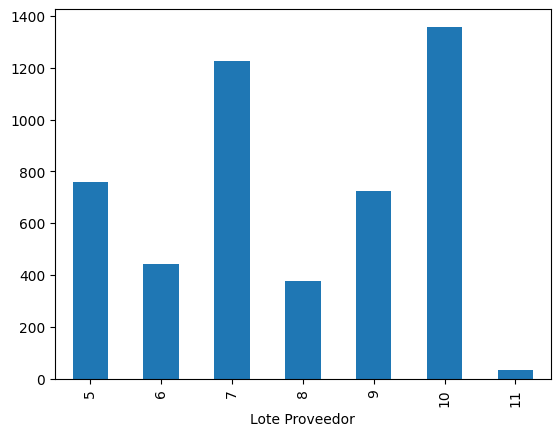

In [1419]:
# Distribution of lengths
mc['Lote Proveedor'].str.len().value_counts().sort_index().plot(kind='bar')

In [1420]:
# They are not all digits, but they are all alphanumeric
mc['Lote Proveedor'].str.isalnum().all()

np.False_

In [1421]:
# Which is not alphanumeric?
mc[~mc['Lote Proveedor'].str.isalnum()]['Lote Proveedor'].unique()

array(['KA-APS-0306', 'KA-APS-0305', 'KA-APS-0304', 'LA-APS-0302',
       'LA-APS-0303'], dtype=object)

There are patterns and groups

In [1422]:
# First values of 'Lote Proveedor' patterns
mc['Lote Proveedor'].value_counts().index.str.extract(r'(^.{1})').value_counts()

0
2    47
0    35
K     9
3     8
A     5
1     4
4     3
C     3
L     2
8     1
M     1
Name: count, dtype: int64

In [1423]:
mc['Lote Proveedor'].value_counts().index.str.extract(r'(^.{2})').value_counts()

0 
24    44
00    35
K5     6
31     4
A1     4
40     3
KA     3
10     3
C5     2
LA     2
32     2
12     1
21     1
22     1
33     1
25     1
30     1
88     1
AM     1
C4     1
M3     1
Name: count, dtype: int64

In [1424]:
mc['Lote Proveedor'].value_counts().index.str.extract(r'(^.{3})').value_counts()

0  
000    35
246    13
243     9
244     9
241     8
242     5
A16     4
KA-     3
K55     3
407     2
100     2
LA-     2
101     1
311     1
300     1
250     1
220     1
129     1
215     1
327     1
326     1
317     1
315     1
312     1
888     1
404     1
331     1
C54     1
C48     1
AM1     1
C59     1
K54     1
K53     1
K52     1
M38     1
Name: count, dtype: int64

In [1425]:
mc['Lote Proveedor'].value_counts().index.str.extract(r'(^.{4})').value_counts()

0   
0002    27
2463    13
2430     9
2445     9
2414     8
0005     6
2428     5
KA-A     3
A168     3
1009     2
LA-A     2
2157     1
2202     1
1013     1
0007     1
0001     1
1292     1
2505     1
3159     1
3178     1
3262     1
3277     1
3319     1
3009     1
3114     1
3121     1
4073     1
4072     1
4045     1
8884     1
C483     1
C545     1
A167     1
AM17     1
K521     1
C594     1
K538     1
K544     1
K551     1
K550     1
K555     1
M388     1
Name: count, dtype: int64

Could there be any value in splitting the suppliers into several categories for statistical analysis or ML related analysis?

## Lote interno

In [1426]:
# lote interno unique values
print('Number of unique lote interno values: ' + str(mc['Lote interno'].nunique()) + 
      ' out of ' + str(mc['Lote interno'].count()))

Number of unique lote interno values: 160 out of 4920


### This looks interesting, one would assume lote interno was an ID for the material transaction but seems it is not true

In [1427]:
# Are all lote interno chars digits?
mc['Lote interno'].str.isdigit().all()

np.True_

In [1428]:
# Minimum and max length of lote interno
print('Minimum length of lote interno: ' + str(mc['Lote interno'].str.len().min()))
print('Maximum length of lote interno: ' + str(mc['Lote interno'].str.len().max()))

Minimum length of lote interno: 10
Maximum length of lote interno: 10


In [1429]:
# Is there any pattern to the unique values?
mc['Lote interno'].value_counts().index.str.extract(r'(^.{5})').value_counts()

0    
00007    90
00008    37
00006    33
Name: count, dtype: int64

In [1430]:
mc['Lote interno'].value_counts().index.str.extract(r'(.{6}$)').value_counts()

0     
636590    1
637889    1
644272    1
648033    1
652422    1
         ..
828650    1
828957    1
828959    1
829314    1
837299    1
Name: count, Length: 160, dtype: int64

### This just looks like a numerical id, but we can't know what it is exactly identifying, it is likely a combination of Lote, Lote interno and Material/ proveedor which makes the row identifiable

## Fecha recepcion

In [1431]:
# Number of unique values for fecha recepción
print('Number of unique fecha recepción values: ' + str(mc['Fecha recepción'].nunique()) + 
      ' out of ' + str(mc['Fecha recepción'].count()))

Number of unique fecha recepción values: 110 out of 4920


In [1432]:
# Are all datetimes? 
# Check with type
import datetime
print('All recepcion datetimes: ' + str(mc['Fecha recepción'].apply(lambda x: type(x)).eq(datetime.datetime).all()))
print('All traslado datetimes: ' + str(mc['Fecha traslado'].apply(lambda x: type(x)).eq(datetime.datetime).all()))
# Get those which are not datetimes
not_dt = mc[~mc['Fecha recepción'].apply(lambda x: type(x)).eq(datetime.datetime)]
print('Number of not datetime values in fecha recepción: ' + str(not_dt.shape[0]))
not_dt = mc[~mc['Fecha traslado'].apply(lambda x: type(x)).eq(datetime.datetime)]
print('Number of not datetime values in fecha traslado: ' + str(not_dt.shape[0]))

not_dt.shape[0]
#nUnique of fecha recepción
print('nUnique of fecha recepción: ' + str(not_dt['Fecha recepción'].nunique()))
# nUnique of Lote
print('nUnique of Lote: ' + str(not_dt['Lote'].nunique()))  
# nUnique of Lote Proveedor
print('nUnique of Lote Proveedor: ' + str(not_dt['Lote Proveedor'].nunique()))
# nUnique of Material
print('nUnique of Material: ' + str(not_dt['Material'].nunique()))
# nUnique of Qty
print('nUnique of Qty: ' + str(not_dt['Qty'].nunique()))
# nUnique of Fecha traslado
print('nUnique of Fecha traslado: ' + str(not_dt['Fecha traslado'].nunique()))
# nUnique of Lote interno
print('nUnique of Lote interno: ' + str(not_dt['Lote interno'].nunique()))
print(not_dt)


All recepcion datetimes: False
All traslado datetimes: False
Number of not datetime values in fecha recepción: 760
Number of not datetime values in fecha traslado: 760
nUnique of fecha recepción: 28
nUnique of Lote: 48
nUnique of Lote Proveedor: 33
nUnique of Material: 12
nUnique of Qty: 292
nUnique of Fecha traslado: 45
nUnique of Lote interno: 40
       Lote Material Lote interno Lote Proveedor     Qty Fecha recepción  \
4254  24060   100012   0000795420        3262705  7872.0           45233   
4255  24060   100011   0000808869     0002408636  3208.0           45307   
4256  24060   100010   0000800462     0002322586    96.0           45257   
4257  24060   100002   0000820714      K55125135   384.0           45362   
4258  24060   100009   0000820609     0002439101  7688.0           45362   
...     ...      ...          ...            ...     ...             ...   
5019  24110   100001   0000826820         101372    72.0           45393   
5020  24109   100002   0000829314      K5

In [1433]:
# Are non-datetime values in the fecha traslado greater than fecha recepción?
(not_dt['Fecha traslado'] > not_dt['Fecha recepción']).all()

np.True_

## Convert Excel Serial to datetime to fix the date values


In [1434]:
# notdt fecha recepcion and traslado to float
# Copy not_dt to avoid SettingWithCopyWarning
not_dt = not_dt.copy()
not_dt.info()


<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 4254 to 5023
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lote             760 non-null    object 
 1   Material         760 non-null    object 
 2   Lote interno     760 non-null    object 
 3   Lote Proveedor   760 non-null    object 
 4   Qty              760 non-null    float64
 5   Fecha recepción  760 non-null    object 
 6   Fecha traslado   760 non-null    object 
dtypes: float64(1), object(6)
memory usage: 47.5+ KB


In [1435]:
# Convert ints from Excel Serial Date to datetime
from datetime import datetime, timedelta

def from_excel_ordinal(ordinal: float, _epoch0=datetime(1899, 12, 31)) -> datetime:
    if ordinal >= 60:
        ordinal -= 1  # Excel leap year bug, 1900 is not a leap year!
    return (_epoch0 + timedelta(days=ordinal)).replace(microsecond=0)

not_dt['Fecha recepción'] = not_dt['Fecha recepción'].apply(from_excel_ordinal)
not_dt['Fecha traslado'] = not_dt['Fecha traslado'].apply(from_excel_ordinal)
not_dt

,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado
4254,24060,100012,0000795420,3262705,7872.0,2023-11-03,2024-04-10
4255,24060,100011,0000808869,0002408636,3208.0,2024-01-16,2024-04-18
4256,24060,100010,0000800462,0002322586,96.0,2023-11-27,2023-12-01
4257,24060,100002,0000820714,K55125135,384.0,2024-03-11,2024-04-18
4258,24060,100009,0000820609,0002439101,7688.0,2024-03-11,2024-04-16
...,...,...,...,...,...,...,...
5019,24110,100001,0000826820,101372,72.0,2024-04-11,2024-06-20
5020,24109,100002,0000829314,K55514635,72.0,2024-04-23,2024-06-10
5021,24109,100001,0000826820,101372,72.0,2024-04-11,2024-06-20
5022,24108,100002,0000829314,K55514635,72.0,2024-04-23,2024-06-10


In [1436]:
# do they make sense?
(not_dt['Fecha traslado'] > not_dt['Fecha recepción']).value_counts()

True    760
Name: count, dtype: int64

In [1437]:
# Are there any duplicated rows?
not_dt.duplicated().sum()

np.int64(0)

In [1438]:
# DESCRIBE
not_dt['Fecha recepción'].describe()

count                              760
mean     2024-01-04 14:48:37.894736896
min                2022-11-04 00:00:00
25%                2024-02-02 00:00:00
50%                2024-03-11 00:00:00
75%                2024-04-10 00:00:00
max                2024-06-03 00:00:00
Name: Fecha recepción, dtype: object

In [1439]:
not_dt['Fecha traslado'].describe()

count                              760
mean     2024-05-03 22:25:15.789473792
min                2023-12-01 00:00:00
25%                2024-04-16 00:00:00
50%                2024-05-10 00:00:00
75%                2024-06-03 00:00:00
max                2024-07-04 00:00:00
Name: Fecha traslado, dtype: object

In [1440]:
mc.describe()

,Qty
count,4920.000000
mean,1601.472037
std,2700.787580
min,-8352.000000
25%,59.760000
50%,144.800000
75%,1968.000000
max,9600.000000


In [1441]:
# Replace mc not_dt by index
mc.loc[not_dt.index] = not_dt
print(mc.describe())

               Qty
count  4920.000000
mean   1601.472037
std    2700.787580
min   -8352.000000
25%      59.760000
50%     144.800000
75%    1968.000000
max    9600.000000


In [1442]:
mc['Fecha recepción'] = pd.to_datetime(mc['Fecha recepción'])
mc['Fecha traslado'] = pd.to_datetime(mc['Fecha traslado'])


In [1443]:
# Are the hours and minutes always 0?
mc['Fecha recepción'].dt.hour.value_counts()

Fecha recepción
0    4920
Name: count, dtype: int64

In [1444]:
# Are the hours and minutes always 0?
mc['Fecha traslado'].dt.hour.value_counts()

Fecha traslado
0    4920
Name: count, dtype: int64

## Duration

In [1445]:
# Create a column for duration in mc
mc['Duration'] = mc['Fecha traslado'] - mc['Fecha recepción']
#mc['Duration'] = mc['Duration'].apply(dur_map)
mc


,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado,Duration
0,23019,100001,0000737133,AM1798471,72.0,2023-01-12,2023-03-22,69 days
1,23019,100002,0000676155,K53821835,72.0,2022-03-07,2023-03-15,373 days
2,23019,100003,0000636590,0005065337,4800.0,2021-08-27,2023-03-13,563 days
3,23019,100004,0000655968,2414150,320.0,2021-11-25,2023-03-10,470 days
4,23019,100005,0000723171,M3889,96.0,2022-11-04,2023-03-03,119 days
...,...,...,...,...,...,...,...,...
5019,24110,100001,0000826820,101372,72.0,2024-04-11,2024-06-20,70 days
5020,24109,100002,0000829314,K55514635,72.0,2024-04-23,2024-06-10,48 days
5021,24109,100001,0000826820,101372,72.0,2024-04-11,2024-06-20,70 days
5022,24108,100002,0000829314,K55514635,72.0,2024-04-23,2024-06-10,48 days


Mean duration: 186 days 12:56:25.384615384
Median duration: 118 days 00:00:00
Std duration: 184 days 02:02:42.058699578


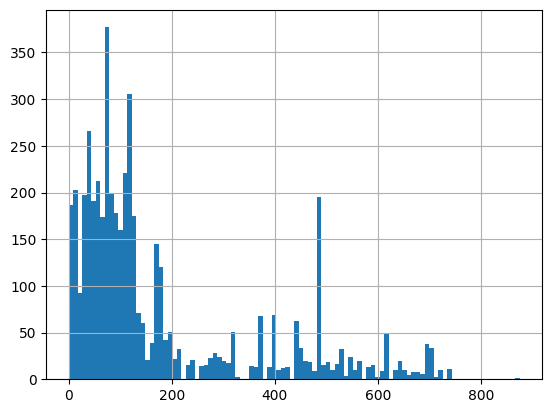

In [1446]:
# Plot histogram of duration
mc['Duration'].dt.days.hist(bins=100)
# Print mean
print('Mean duration: ' + str(mc[~mc.index.isin(not_dt.index)]['Duration'].mean()))
# Print median
print('Median duration: ' + str(mc[~mc.index.isin(not_dt.index)]['Duration'].median()))
# Print std
print('Std duration: ' + str(mc[~mc.index.isin(not_dt.index)]['Duration'].std()))

## Fecha traslado


In [1447]:
# Unique values of Fecha traslado
print('Unique values of Fecha traslado: ' + str(mc['Fecha traslado'].nunique()) + ' out of '
                                                 + str(mc['Fecha traslado'].count()))

Unique values of Fecha traslado: 211 out of 4920


## Material

In [1448]:
print(mc['Material'].nunique())
mc['Material'].value_counts()

13


Material
100002    603
100001    590
100004    468
100007    411
100009    389
100011    381
100008    376
100006    368
100010    366
100005    365
100012    326
100003    221
100013     56
Name: count, dtype: int64

<Axes: xlabel='Material'>

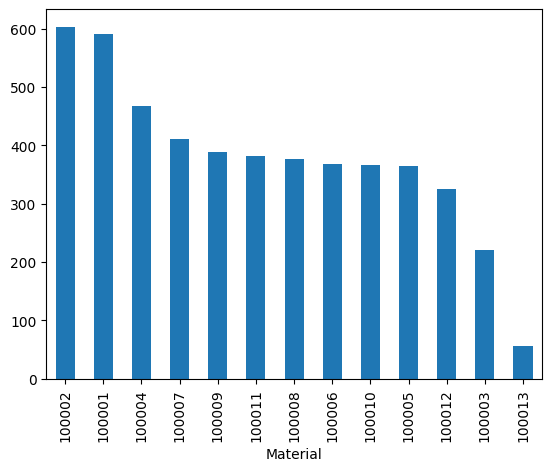

In [1449]:
# Plot histogram of Material
mc['Material'].value_counts().plot(kind='bar')

### Note: 100003 and 100013 as the least frequent

In [1450]:
## How many materials are there for each lote?
mc.groupby('Lote')['Material'].nunique().sort_values(ascending=False)

Lote
23115    13
23110    13
23116    13
23111    13
23024    12
         ..
23077    11
23087    11
23083    11
23074    11
23096    11
Name: Material, Length: 194, dtype: int64

In [1451]:
# Does the combination of material and lote uniquely identify a row?
mc.groupby(['Lote', 'Material']).size()



Lote   Material
23019  100001      3
       100002      3
       100003      1
       100004      2
       100005      2
                  ..
24110  100008      1
       100009      1
       100010      1
       100011      1
       100012      1
Length: 2327, dtype: int64

In [1452]:
# Select those which Lote and material has more than one row
# Get lote 23019 and material 100001
mc[(mc['Lote'] == '23019') & (mc['Material'] == '100001')]

,Lote,Material,Lote interno,Lote Proveedor,Qty,Fecha recepción,Fecha traslado,Duration
0,23019,100001,0000737133,AM1798471,72.000,2023-01-12,2023-03-22,69 days
8,23019,100001,0000737133,AM1798471,57.600,2023-01-12,2023-03-02,49 days
19,23019,100001,0000737133,AM1798471,7.248,2023-01-12,2023-03-02,49 days


This example marks well what is happening here: We need all values to identify a row of this dataset.
We could make a new ID here to simplify it probably?

## Saving


In [1453]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4920 entries, 0 to 5023
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Lote             4920 non-null   object         
 1   Material         4920 non-null   object         
 2   Lote interno     4920 non-null   object         
 3   Lote Proveedor   4920 non-null   object         
 4   Qty              4920 non-null   float64        
 5   Fecha recepción  4920 non-null   datetime64[ns] 
 6   Fecha traslado   4920 non-null   datetime64[ns] 
 7   Duration         4920 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), object(4), timedelta64[ns](1)
memory usage: 475.0+ KB


In [1454]:
mc.to_csv('../../data/processed/mov_componentes.csv', index=False)

# Fases producción: anomalies detection and analysis

In [1455]:
import pandas as pd 
import matplotlib.pyplot as plt

## Preinóculo

### Load and anomalies checks

In [1456]:

pino = pd.read_excel('../../data/raw/Fases producción v02.xlsx', sheet_name='Preinóculo', skiprows=1)


In [1457]:
pino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   LOTE               165 non-null    object        
 1   Fecha/hora inicio  165 non-null    datetime64[ns]
 2   Fecha/hora fin     165 non-null    datetime64[ns]
 3   línea 1            163 non-null    float64       
 4   línea 2            152 non-null    float64       
 5   línea 3            138 non-null    object        
 6   línea 1.1          163 non-null    float64       
 7   línea 2.1          152 non-null    float64       
 8   línea 3.1          139 non-null    object        
 9   línea 1.2          165 non-null    int64         
 10  línea 2.2          165 non-null    int64         
 11  línea 3.2          165 non-null    int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(3)
memory usage: 15.6+ KB


In [1458]:
columns = ['Lote',
           'f_h_inicio',
              'f_h_fin',
              'ph_1',
               'ph_2',
               'ph_3',
               'turb_1',
               'turb_2',
               'turb_3',
               'usada_1',
               'usada_2',
               'usada_3'

           ]
pino.columns = columns

In [1459]:
pino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Lote        165 non-null    object        
 1   f_h_inicio  165 non-null    datetime64[ns]
 2   f_h_fin     165 non-null    datetime64[ns]
 3   ph_1        163 non-null    float64       
 4   ph_2        152 non-null    float64       
 5   ph_3        138 non-null    object        
 6   turb_1      163 non-null    float64       
 7   turb_2      152 non-null    float64       
 8   turb_3      139 non-null    object        
 9   usada_1     165 non-null    int64         
 10  usada_2     165 non-null    int64         
 11  usada_3     165 non-null    int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(3)
memory usage: 15.6+ KB


#### Duplicated checks

In [1460]:
# Number of dupe rows
print(pino.duplicated().sum())

1


In [1461]:
# Print dupe row
print(pino[pino.duplicated()])

      Lote          f_h_inicio             f_h_fin   ph_1   ph_2   ph_3  \
115  24020 2024-01-25 00:30:00 2024-01-26 07:00:00  5.448  5.504  5.528   

     turb_1  turb_2 turb_3  usada_1  usada_2  usada_3  
115   35.04   24.16  25.44        1        0        1  


In [1462]:
# Drop dupe row
pino = pino.drop_duplicates()

### Lote

In [1463]:
# Lote is an object. Which values are non-digits?
# First to str
pino['Lote'] = pino['Lote'].astype(str)
# Then find non-digit values
pino[pino['Lote'].str.contains('[\D]')]


,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3
86,P23462,2023-11-12 00:30:00,2023-11-13 07:25:00,5.432,5.352,NaN,28.64,26.8,NaN,0,1,0


### Ph_3 and turb_3

In [1464]:
# ph_3 is an object. Which values are non-digits?
# First to str
pino['ph_3'] = pino['ph_3'].astype(str)
# Then find non-digit values
pino[pino['ph_3'].str.contains('[\D][.]')]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3
6,23029,2023-04-15 05:30:00,2023-04-16 06:30:00,5.52,5.520,N.A,30.00,30.32,N.A,1,1,0
7,23030,2023-04-15 05:30:00,2023-04-16 06:30:00,5.52,5.520,N.A,30.00,30.32,N.A,1,1,0
8,23031,2023-04-15 05:30:00,2023-04-16 06:30:00,5.52,5.512,N.A,32.08,32.96,N.A,1,1,0
9,23032,2023-04-15 05:30:00,2023-04-16 06:30:00,5.52,5.512,N.A,32.08,32.96,N.A,1,1,0
12,23035,2023-04-23 05:00:00,2023-03-24 07:30:00,5.52,5.520,N.A,25.68,26.56,N.A,1,0,0


In [1465]:
# Change to NaN and then to float
pino['ph_3'] = pino['ph_3'].replace('N.A', 'NaN').astype(float)

In [1466]:
pino.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 0 to 164
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Lote        164 non-null    object        
 1   f_h_inicio  164 non-null    datetime64[ns]
 2   f_h_fin     164 non-null    datetime64[ns]
 3   ph_1        162 non-null    float64       
 4   ph_2        151 non-null    float64       
 5   ph_3        132 non-null    float64       
 6   turb_1      162 non-null    float64       
 7   turb_2      151 non-null    float64       
 8   turb_3      138 non-null    object        
 9   usada_1     164 non-null    int64         
 10  usada_2     164 non-null    int64         
 11  usada_3     164 non-null    int64         
dtypes: datetime64[ns](2), float64(5), int64(3), object(2)
memory usage: 16.7+ KB


#### Looks like NA is typed as N.A instead

In [1467]:
# turb_3 is an object. Which values are non-digits?
# First to str
pino['turb_3'] = pino['turb_3'].astype(str)
# Then find non-digit values
pino[pino['turb_3'].str.contains('[\D][.]')]


,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3
6,23029,2023-04-15 05:30:00,2023-04-16 06:30:00,5.52,5.520,NaN,30.00,30.32,N.A,1,1,0
7,23030,2023-04-15 05:30:00,2023-04-16 06:30:00,5.52,5.520,NaN,30.00,30.32,N.A,1,1,0
8,23031,2023-04-15 05:30:00,2023-04-16 06:30:00,5.52,5.512,NaN,32.08,32.96,N.A,1,1,0
9,23032,2023-04-15 05:30:00,2023-04-16 06:30:00,5.52,5.512,NaN,32.08,32.96,N.A,1,1,0
12,23035,2023-04-23 05:00:00,2023-03-24 07:30:00,5.52,5.520,NaN,25.68,26.56,N.A,1,0,0


In [1468]:
# Change to NaN and then to float
pino['turb_3'] = pino['turb_3'].replace('N.A', 'NaN').astype(float)

In [1469]:
pino.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 0 to 164
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Lote        164 non-null    object        
 1   f_h_inicio  164 non-null    datetime64[ns]
 2   f_h_fin     164 non-null    datetime64[ns]
 3   ph_1        162 non-null    float64       
 4   ph_2        151 non-null    float64       
 5   ph_3        132 non-null    float64       
 6   turb_1      162 non-null    float64       
 7   turb_2      151 non-null    float64       
 8   turb_3      133 non-null    float64       
 9   usada_1     164 non-null    int64         
 10  usada_2     164 non-null    int64         
 11  usada_3     164 non-null    int64         
dtypes: datetime64[ns](2), float64(6), int64(3), object(1)
memory usage: 16.7+ KB


In [1470]:
# Null values for ph_3
pino[pino['ph_3'].isnull()]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3
6,23029,2023-04-15 05:30:00,2023-04-16 06:30:00,5.520,5.520,NaN,30.00,30.32,NaN,1,1,0
7,23030,2023-04-15 05:30:00,2023-04-16 06:30:00,5.520,5.520,NaN,30.00,30.32,NaN,1,1,0
8,23031,2023-04-15 05:30:00,2023-04-16 06:30:00,5.520,5.512,NaN,32.08,32.96,NaN,1,1,0
9,23032,2023-04-15 05:30:00,2023-04-16 06:30:00,5.520,5.512,NaN,32.08,32.96,NaN,1,1,0
12,23035,2023-04-23 05:00:00,2023-03-24 07:30:00,5.520,5.520,NaN,25.68,26.56,NaN,1,0,0
19,23042,2023-05-29 05:00:00,2023-05-30 07:30:00,5.512,5.472,NaN,24.80,27.12,NaN,0,1,0
20,23044,2023-06-04 05:00:00,2023-06-05 08:00:00,5.488,5.552,NaN,30.48,26.80,NaN,1,1,0
49,23075,2023-07-29 05:00:00,2023-07-31 07:15:00,5.464,NaN,NaN,42.56,NaN,NaN,1,0,0
51,23076,2023-07-30 05:00:00,2023-07-31 07:00:00,5.376,NaN,NaN,34.88,NaN,NaN,1,0,0
52,23077,2023-09-02 05:00:00,2023-09-03 07:45:00,5.424,5.440,NaN,30.96,32.16,NaN,1,1,0


In [1471]:
# Values that arenull for ph_3 and not for turb_3
pino[pino['ph_3'].isnull() & pino['turb_3'].notnull()]


,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3
144,24075,2024-05-12 00:30:00,2024-05-13 07:54:00,5.424,5.424,NaN,25.12,26.96,27.84,0,1,1


#### This linea 3 value is used, despite NaN values. We should drop this later

In [1472]:
# Drop row pino[pino['ph_3'].isnull() & pino['turb_3'].notnull()]
#pino = pino.drop(pino[pino['ph_3'].isnull() & pino['turb_3'].notnull()].index)

### Fechas y duracion

In [1473]:
## Make new column with Duracion
pino['duracion'] = pino['f_h_fin'] - pino['f_h_inicio']


In [1474]:
pino['duracion'].describe()

count                          164
mean     0 days 19:10:03.292682926
std      4 days 07:43:24.666420264
min             -30 days +02:30:00
25%                1 days 02:45:00
50%                1 days 06:45:00
75%                1 days 07:05:00
max               11 days 01:42:00
Name: duracion, dtype: object

#### Something is weird with the dates

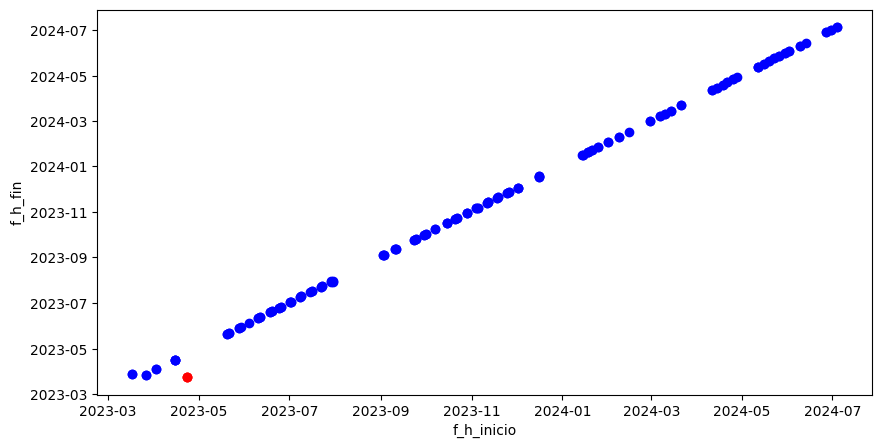

In [1475]:
def plot_fechas(df, col1, col2):
    # Scatter plot of col1 vs fecha de fin real
    # Whenever the col1 is greater than fecha de fin real, the point will be red
    # Whenever the col1 is less than fecha de fin real, the point will be blue
    # If it is equal, it will be yellow
    plt.figure(figsize=(10, 5))
    for index, row in df.iterrows():
        if row[col1] > row[col2]:
            plt.scatter(row[col1], row[col2], color='red')
        elif row[col1] < row[col2]:
            plt.scatter(row[col1], row[col2], color='blue')
        else:
            plt.scatter(row[col1], row[col2], color='yellow')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

plot_fechas(pino, 'f_h_inicio', 'f_h_fin')

In [1476]:
# Is it only an isolated datapoint that is wrong?
pino[pino['f_h_inicio'] > pino['f_h_fin']]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion
10,23033,2023-04-23 05:00:00,2023-03-24 13:30:00,5.448,5.456,5.392,28.08,28.24,29.44,1,0,1,-30 days +08:30:00
11,23034,2023-04-23 05:00:00,2023-03-24 13:30:00,5.448,5.456,5.392,28.08,28.24,29.44,1,0,1,-30 days +08:30:00
12,23035,2023-04-23 05:00:00,2023-03-24 07:30:00,5.520,5.520,NaN,25.68,26.56,NaN,1,0,0,-30 days +02:30:00


#### Given that most of the times it is around 0 or 1 days to complete
#### It is likely that this date was 2023-03-23 but it was written as 2023-04-23 by human error.
#### We should drop it for now

In [1477]:
# Remove the row
pino = pino[pino['f_h_inicio'] < pino['f_h_fin']]

In [1478]:
# Make duracion again
pino['duracion'] = pino['f_h_fin'] - pino['f_h_inicio']

In [1479]:
pino['duracion'].describe()

count                          161
mean     1 days 08:49:11.180124223
std      1 days 02:36:00.051739875
min                0 days 02:10:00
25%                1 days 02:45:00
50%                1 days 06:45:00
75%                1 days 07:05:00
max               11 days 01:42:00
Name: duracion, dtype: object

### ph_2

In [1480]:
# is ph2 loaded correctly?
pino[pino['ph_2'].astype(str).str.contains('[\D][.]')]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion


In [1481]:
# ph2 null values
pino[pino['ph_2'].isnull()]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion
49,23075,2023-07-29 05:00:00,2023-07-31 07:15:00,5.464,NaN,NaN,42.56,NaN,NaN,1,0,0,2 days 02:15:00
51,23076,2023-07-30 05:00:00,2023-07-31 07:00:00,5.376,NaN,NaN,34.88,NaN,NaN,1,0,0,1 days 02:00:00
56,23081,2023-09-10 05:00:00,2023-09-11 08:00:00,5.496,NaN,5.504,28.40,NaN,28.00,1,0,1,1 days 03:00:00
57,23082,2023-09-10 05:00:00,2023-09-11 08:00:00,5.496,NaN,5.504,28.40,NaN,28.00,1,0,1,1 days 03:00:00
58,23083,2023-09-11 05:00:00,2023-09-12 07:45:00,5.424,NaN,5.448,29.20,NaN,30.48,1,0,1,1 days 02:45:00
59,23084,2023-09-11 05:00:00,2023-09-12 07:45:00,5.424,NaN,5.448,29.20,NaN,30.48,1,0,1,1 days 02:45:00
71,23097,2023-10-15 00:30:00,2023-10-16 07:30:00,5.352,NaN,NaN,34.08,NaN,NaN,1,0,0,1 days 07:00:00
89,23118,2023-11-18 00:30:00,2023-11-19 07:30:00,5.352,NaN,5.368,39.92,NaN,37.68,1,0,1,1 days 07:00:00
90,23119,2023-11-18 00:30:00,2023-11-19 07:30:00,5.352,NaN,5.368,39.92,NaN,37.68,1,0,1,1 days 07:00:00
95,23126,2023-11-26 00:30:00,2023-11-27 07:15:00,5.432,NaN,5.384,29.20,NaN,27.04,1,0,1,1 days 06:45:00


In [1482]:
# Whenever ph_2 is null, turb_2 is also null and viceversa
pino[pino['ph_2'].isnull() & pino['turb_2'].notnull()]


,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion


In [1483]:
# Whenever ph_2 is null, turb_2 is also null and viceversa
pino[pino['ph_2'].notnull() & pino['turb_2'].isnull()]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion


In [1484]:
# Whenever ph_2 or turb_2 is null, usada_2 is 0
pino[(pino['ph_2'].isnull() | pino['turb_2'].isnull())  & pino['usada_2'] != 0]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion


### ph_3

In [1485]:
# whenever ph_3 is null, turb_3 is also null and viceversa
pino[pino['ph_3'].isnull() & pino['turb_3'].notnull()]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion
144,24075,2024-05-12 00:30:00,2024-05-13 07:54:00,5.424,5.424,NaN,25.12,26.96,27.84,0,1,1,1 days 07:24:00


In [1486]:
# whenever ph_3 is null, turb_3 is also null and viceversa
pino[pino['ph_3'].notnull() & pino['turb_3'].isnull()]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion


In [1487]:
# whenever ph_3 or turb_3 is null, usada_3 is 0
pino[(pino['ph_3'].isnull() | pino['turb_3'].isnull())  & pino['usada_3'] != 0]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion
144,24075,2024-05-12 00:30:00,2024-05-13 07:54:00,5.424,5.424,NaN,25.12,26.96,27.84,0,1,1,1 days 07:24:00


### ph_1

In [1488]:
# ph_1 null values
pino[pino['ph_1'].isnull()]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion
80,23108,2023-11-04 00:30:00,2023-11-05 09:45:00,NaN,5.416,5.4,NaN,35.6,34.4,0,1,1,1 days 09:15:00
81,23109,2023-11-04 00:30:00,2023-11-05 09:45:00,NaN,5.416,5.4,NaN,35.6,34.4,0,1,1,1 days 09:15:00


In [1489]:
# whenever ph_1 is null, turb_1 is also null and viceversa
pino[pino['ph_1'].isnull() & pino['turb_1'].notnull()]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion


In [1490]:
# whenever ph_1 is null, turb_1 is also null and viceversa
pino[pino['ph_1'].notnull() & pino['turb_1'].isnull()]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion


In [1491]:
# whenever ph_1 or turb_1 is null, usada_1 is 0
pino[(pino['ph_1'].isnull() | pino['turb_1'].isnull())  & pino['usada_1'] != 0]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion


### Usadas


In [1492]:
# Lineas usadas, are they all 1 values
print(pino['usada_1'].unique())
print(pino['usada_2'].unique())
print(pino['usada_3'].unique())


[1 0]
[1 0]
[0 1]


In [1493]:
# Are there rows with all 0 values?
pino[(pino['usada_1'] == 0) & (pino['usada_2'] == 0) & (pino['usada_3'] == 0)]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion


In [1494]:
# Are there rows with all 1 values?
pino[(pino['usada_1'] == 1) & (pino['usada_2'] == 1) & (pino['usada_3'] == 1)]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion


In [1495]:
# Are there rows with only 1 value?
pino[(pino['usada_1'] == 1) & (pino['usada_2'] == 0) & (pino['usada_3'] == 0)]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion
49,23075,2023-07-29 05:00:00,2023-07-31 07:15:00,5.464,NaN,NaN,42.56,NaN,NaN,1,0,0,2 days 02:15:00
51,23076,2023-07-30 05:00:00,2023-07-31 07:00:00,5.376,NaN,NaN,34.88,NaN,NaN,1,0,0,1 days 02:00:00
71,23097,2023-10-15 00:30:00,2023-10-16 07:30:00,5.352,NaN,NaN,34.08,NaN,NaN,1,0,0,1 days 07:00:00
91,23120,2023-11-19 00:30:00,2023-11-20 07:45:00,5.320,5.384,NaN,32.16,31.44,NaN,1,0,0,1 days 07:15:00
92,23121,2023-11-19 00:30:00,2023-11-20 07:50:00,5.232,5.408,NaN,28.72,25.76,NaN,1,0,0,1 days 07:20:00
97,23131,2023-12-02 00:30:00,2023-12-03 06:55:00,5.376,5.424,NaN,35.12,35.52,NaN,1,0,0,1 days 06:25:00
107,24005,2024-01-18 00:30:00,2024-01-19 07:15:00,5.360,5.440,NaN,28.96,26.48,NaN,1,0,0,1 days 06:45:00
116,24021,2024-02-01 00:30:00,2024-02-02 07:10:00,5.280,5.440,NaN,37.68,26.72,NaN,1,0,0,1 days 06:40:00
158,24098,2024-06-13 00:30:00,2024-06-14 08:00:00,5.672,5.608,5.608,23.04,22.56,20.96,1,0,0,1 days 07:30:00


In [1496]:
# Are there rows with only 1 value?
pino[(pino['usada_1'] == 0) & (pino['usada_2'] == 1) & (pino['usada_3'] == 0)]  

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion
19,23042,2023-05-29 05:00:00,2023-05-30 07:30:00,5.512,5.472,NaN,24.80,27.12,NaN,0,1,0,1 days 02:30:00
78,23104,2023-10-29 00:30:00,2023-10-30 09:45:00,5.376,5.336,NaN,32.16,36.08,NaN,0,1,0,1 days 09:15:00
86,P23462,2023-11-12 00:30:00,2023-11-13 07:25:00,5.432,5.352,NaN,28.64,26.80,NaN,0,1,0,1 days 06:55:00
114,24019,2024-02-01 00:30:00,2024-02-02 07:20:00,5.520,5.360,NaN,35.20,37.04,NaN,0,1,0,1 days 06:50:00
119,24031,2024-02-15 00:30:00,2024-02-16 07:30:00,5.768,5.488,NaN,24.48,32.96,NaN,0,1,0,1 days 07:00:00
120,24035,2024-02-29 00:30:00,2024-03-01 07:00:00,5.440,5.448,5.512,26.88,31.12,28.8,0,1,0,1 days 06:30:00
121,24036,2024-02-29 00:30:00,2024-03-01 07:00:00,5.440,5.448,5.512,26.88,31.12,28.8,0,1,0,1 days 06:30:00
140,24071,2024-04-28 00:30:00,2024-04-29 07:45:00,6.280,5.488,NaN,27.36,24.88,NaN,0,1,0,1 days 07:15:00
141,24072,2024-05-12 00:30:00,2024-05-13 08:16:00,5.424,5.424,NaN,25.36,30.96,NaN,0,1,0,1 days 07:46:00


In [1497]:
# Are there rows with only 1 value?
pino[(pino['usada_1'] == 0) & (pino['usada_2'] == 0) & (pino['usada_3'] == 1)]

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion


## Inóculo

### Load and anomalies check

In [1498]:
ino = pd.read_excel('../../data/raw/Fases producción v02.xlsx', sheet_name='Inóculo')

In [1499]:
ino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   LOTE                      168 non-null    object        
 1   ID bioreactor             168 non-null    int64         
 2   Fecha/hora inicio         164 non-null    datetime64[ns]
 3   Fecha/hora fin            164 non-null    datetime64[ns]
 4   Volumen de cultivo        164 non-null    float64       
 5   Turbidez inicio cultivo   162 non-null    float64       
 6   Turbidez final culttivo   168 non-null    float64       
 7   Viabilidad final cultivo  168 non-null    object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 10.6+ KB


In [1500]:
#  Rename Turbidez final culttivo to Turbidez final cultivo
ino = ino.rename(columns={'Turbidez final culttivo': 'Turbidez final cultivo'})

In [1501]:
ino.head()

,LOTE,ID bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de cultivo,Turbidez inicio cultivo,Turbidez final cultivo,Viabilidad final cultivo
0,23019,13171,NaT,NaT,NaN,NaN,32.80,134400000
1,23020,13171,NaT,NaT,NaN,NaN,32.80,134400000
2,23021,14618,NaT,NaT,NaN,NaN,27.84,115200000
3,23022,14618,NaT,NaT,NaN,NaN,27.84,115200000
4,23023,14618,2023-03-27 07:22:00,2023-03-28 07:29:00,155.2,18.24,31.68,106400000


### Duplicated rows

In [1502]:
# Number of dupe rows
print(ino.duplicated().sum())

1


In [1503]:
print(ino[ino.duplicated()])

      LOTE  ID bioreactor   Fecha/hora inicio      Fecha/hora fin  \
119  24020          13171 2024-01-26 07:00:00 2024-01-27 07:10:00   

     Volumen de cultivo  Turbidez inicio cultivo  Turbidez final cultivo  \
119               160.0                    15.52                   30.64   

    Viabilidad final cultivo  
119                 95200000  


In [1504]:
# Drop dupe row
ino = ino.drop_duplicates()

### Lote

In [1505]:
# Lote is an object. Which values are non-digits?
# First to str
ino['LOTE'] = ino['LOTE'].astype(str)
# Then find non-digit values
ino[ino['LOTE'].str.contains('[\D]')]

,LOTE,ID bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de cultivo,Turbidez inicio cultivo,Turbidez final cultivo,Viabilidad final cultivo
90,P23462,13171,2023-11-13 07:25:00,2023-11-14 07:20:00,80.0,12.96,25.52,142400000


#### This LOTE has already been located at other datapoints

In [1506]:
ino['LOTE'].value_counts()

LOTE
23019    1
23020    1
23021    1
23022    1
23023    1
        ..
24101    1
24103    1
24104    1
24105    1
24108    1
Name: count, Length: 167, dtype: int64

#### Remember to cross the LOTE with other datasets.

### ID bioreactor

In [1507]:
# Looks like ID is loaded as int, which should mean no non-digit values
ino['ID bioreactor'].astype(str).str.contains('[\D]').sum()

np.int64(0)

In [1508]:
# There are also no null values but we should have this as str
ino['ID bioreactor'] = ino['ID bioreactor'].astype(str)

In [1509]:
# Unique values
ino['ID bioreactor'].value_counts()

ID bioreactor
13171    60
14618    55
13172    52
Name: count, dtype: int64

#### We should check unique values to cross with other data

### Viabilidad final cultivo

In [1510]:
# Show viabilidad values
ino['Viabilidad final cultivo'].value_counts()

Viabilidad final cultivo
104000000    8
86400000     8
91200000     8
83200000     7
88000000     6
            ..
167200000    1
66640000     1
1,27+e08     1
79760000     1
54240000     1
Name: count, Length: 64, dtype: int64

In [1511]:
# Viabilidad final cultivo is an object. Which values are non-digits?
# First to str
ino['Viabilidad final cultivo'] = ino['Viabilidad final cultivo'].astype(str)
# Then find non-digit values
ino[ino['Viabilidad final cultivo'].str.contains('[\D]')]

,LOTE,ID bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de cultivo,Turbidez inicio cultivo,Turbidez final cultivo,Viabilidad final cultivo
118,24019,13171,2024-02-02 07:20:00,2024-02-03 07:00:00,80.0,14.32,26.48,"1,27+e08"


#### It looks like there is only one wrong entry

In [1512]:
# Fix the entry with LOTE == 24019 to be 1.27E+08
ino.loc[ino['LOTE'] == '24019', 'Viabilidad final cultivo'] = '1.27E+08'
# To float
ino['Viabilidad final cultivo'] = ino['Viabilidad final cultivo'].astype(float)



In [1513]:
# Get LOTE 24019
ino[ino['LOTE'] == '24019']['Viabilidad final cultivo']

118    127000000.0
Name: Viabilidad final cultivo, dtype: float64

In [1514]:
# Null values for Viabilidad final cultivo
ino[ino['Viabilidad final cultivo'].isnull()]

,LOTE,ID bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de cultivo,Turbidez inicio cultivo,Turbidez final cultivo,Viabilidad final cultivo


### Volumen cultivo

In [1515]:
# Null values for Volumen cultivo
ino[ino['Volumen de cultivo'].isnull()]

,LOTE,ID bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de cultivo,Turbidez inicio cultivo,Turbidez final cultivo,Viabilidad final cultivo
0,23019,13171,NaT,NaT,NaN,NaN,32.80,134400000.0
1,23020,13171,NaT,NaT,NaN,NaN,32.80,134400000.0
2,23021,14618,NaT,NaT,NaN,NaN,27.84,115200000.0
3,23022,14618,NaT,NaT,NaN,NaN,27.84,115200000.0


#### We should check if those LOTEs are in another dataset if these features end up being important

In [1516]:
# Range of Volumen cultivo
ino['Volumen de cultivo'].min(), ino['Volumen de cultivo'].max()

(np.float64(79.2), np.float64(176.0))

### Turbidez final cultivo

In [1517]:
# Range of Turbidez final cultivo
ino['Turbidez final cultivo'].min(), ino['Turbidez final cultivo'].max()

(np.float64(17.680000000000003), np.float64(32.88))

### Turbidez inicio cultivo

In [1518]:
# Null values for Turbidez final cultivo
ino[ino['Turbidez inicio cultivo'].isnull()]

,LOTE,ID bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de cultivo,Turbidez inicio cultivo,Turbidez final cultivo,Viabilidad final cultivo
0,23019,13171,NaT,NaT,NaN,NaN,32.80,134400000.0
1,23020,13171,NaT,NaT,NaN,NaN,32.80,134400000.0
2,23021,14618,NaT,NaT,NaN,NaN,27.84,115200000.0
3,23022,14618,NaT,NaT,NaN,NaN,27.84,115200000.0
37,23056,13171,2023-07-02 08:35:00,2023-07-03 08:35:00,168.8,NaN,27.04,112000000.0
38,23057,13171,2023-07-02 08:35:00,2023-07-03 08:35:00,168.8,NaN,27.04,112000000.0


In [1519]:
# Range of Turbidez inicio cultivo
ino['Turbidez inicio cultivo'].min(), ino['Turbidez inicio cultivo'].max()

(np.float64(11.2), np.float64(21.52))

### Diff turbidez

In [1520]:
# Compute the difference between Turbidez final cultivo and Turbidez inicio cultivo
ino['Turbidez_diff'] = ino['Turbidez final cultivo'] - ino['Turbidez inicio cultivo']

### Fechas

In [1521]:
## There are 4 null values for Fecha/hora inicio cultivo and they are the same for Fecha/hora fin cultivo
ino[ino['Fecha/hora inicio'].isnull()]

,LOTE,ID bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de cultivo,Turbidez inicio cultivo,Turbidez final cultivo,Viabilidad final cultivo,Turbidez_diff
0,23019,13171,NaT,NaT,NaN,NaN,32.80,134400000.0,NaN
1,23020,13171,NaT,NaT,NaN,NaN,32.80,134400000.0,NaN
2,23021,14618,NaT,NaT,NaN,NaN,27.84,115200000.0,NaN
3,23022,14618,NaT,NaT,NaN,NaN,27.84,115200000.0,NaN


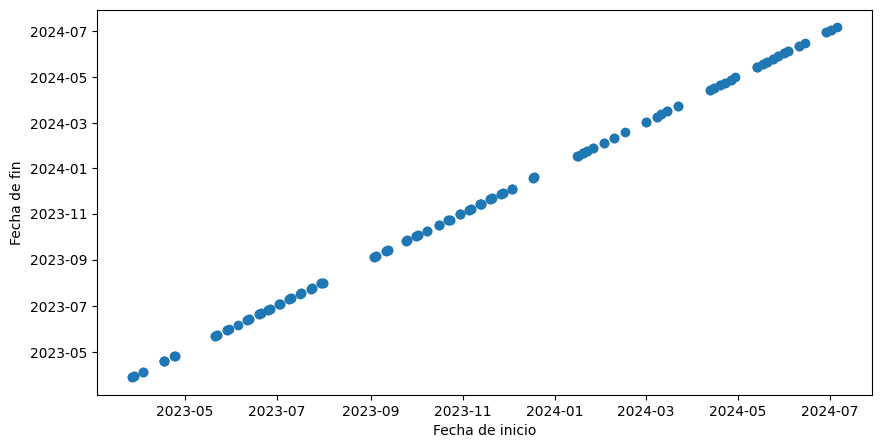

In [1522]:
# Scatter plot of Fecha/hora inicio and Fecha/hora fin
plt.figure(figsize=(10, 5))
plt.scatter(ino['Fecha/hora inicio'], ino['Fecha/hora fin'])
plt.xlabel('Fecha de inicio')
plt.ylabel('Fecha de fin')
plt.show()

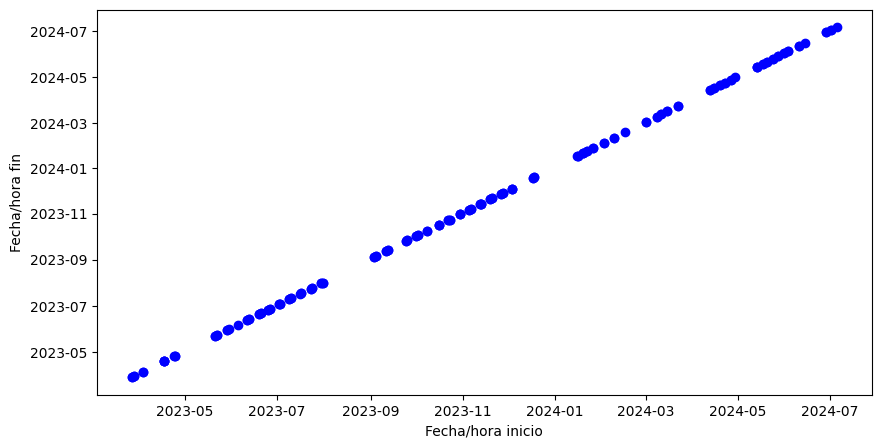

In [1523]:
def plot_fechas(df, col1, col2):
    # Scatter plot of col1 vs fecha de fin real
    # Whenever the col1 is greater than fecha de fin real, the point will be red
    # Whenever the col1 is less than fecha de fin real, the point will be blue
    # If it is equal, it will be yellow
    plt.figure(figsize=(10, 5))
    for index, row in df.iterrows():
        if row[col1] > row[col2]:
            plt.scatter(row[col1], row[col2], color='red')
        elif row[col1] < row[col2]:
            plt.scatter(row[col1], row[col2], color='blue')
        else:
            plt.scatter(row[col1], row[col2], color='yellow')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

plot_fechas(ino, 'Fecha/hora inicio', 'Fecha/hora fin')

In [1524]:
## Is there any date that is wrong?
ino[ino['Fecha/hora inicio'] > ino['Fecha/hora fin']]

,LOTE,ID bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de cultivo,Turbidez inicio cultivo,Turbidez final cultivo,Viabilidad final cultivo,Turbidez_diff


### Duracion

In [1525]:
# Make new column for duration
ino['Duracion'] = ino['Fecha/hora fin'] - ino['Fecha/hora inicio']

In [1526]:
ino['Duracion'].describe()

count                          163
mean     1 days 00:27:03.680981595
std      0 days 01:18:54.383419911
min                0 days 22:05:00
25%                0 days 23:50:00
50%                1 days 00:05:00
75%                1 days 00:51:00
max                1 days 06:10:00
Name: Duracion, dtype: object

## Cultivo final

In [1527]:
cultivo = pd.read_excel('../../data/raw/Fases producción v02.xlsx', sheet_name='Cultivo final') 

In [1528]:
cultivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LOTE                          152 non-null    int64         
 1   Orden en el encadenado        152 non-null    int64         
 2   LOTE parental                 22 non-null     float64       
 3   ID Bioreactor                 152 non-null    int64         
 4   Fecha/hora inicio             152 non-null    datetime64[ns]
 5   Fecha/hora fin                152 non-null    datetime64[ns]
 6   Volumen de inóculo utilizado  147 non-null    float64       
 7   Turbidez inicio cultivo       152 non-null    float64       
 8   Turbidez fin cultivo          152 non-null    float64       
 9   Viabilidad final cultivo      152 non-null    object        
 10  ID Centrífuga                 152 non-null    int64         
 11  Centrifugación 1 turbidez     14

### Duplicated rows

In [1529]:
# Number of dupe rows
print(cultivo.duplicated().sum())

0


### LOTE

In [1530]:
# LOTE is loaded as int, which likely means no non-digit values
cultivo['LOTE'].astype(str).str.contains('[\D]').sum()

np.int64(0)

In [1531]:
# LOTE value counts
cultivo['LOTE'].value_counts()

LOTE
23019    1
23020    1
23021    1
23022    1
23023    1
        ..
24049    1
24050    1
24051    1
24052    1
24053    1
Name: count, Length: 152, dtype: int64

In [1532]:
# LOTE should be str
cultivo['LOTE'] = cultivo['LOTE'].astype(str)


### Orden en el encadenado

In [1533]:
# Orden is int, which likely means no non-digit values
cultivo['Orden en el encadenado'].astype(str).str.contains('[\D]').sum()

np.int64(0)

In [1534]:
# Orden value counts
cultivo['Orden en el encadenado'].value_counts()

Orden en el encadenado
1    127
2     23
3      2
Name: count, dtype: int64

In [1535]:
# To str
cultivo['Orden en el encadenado'] = cultivo['Orden en el encadenado'].astype(str)  

### LOTE parental

In [1536]:
# LOTE parental is float? Find the decimals and extract them
cultivo['LOTE parental'].astype(str).str.extract(r'(\.\d+)').dropna().value_counts()

0 
.0    22
Name: count, dtype: int64

In [1537]:
# It is float because int cannot be NaN. Change to str
cultivo['LOTE parental'] = cultivo['LOTE parental'].astype(str)
# Remove the decimals
cultivo['LOTE parental'] = cultivo['LOTE parental'].str.extract(r'(\d+)')


In [1538]:
# How many null values for LOTE parental?
cultivo['LOTE parental']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
147      NaN
148      NaN
149      NaN
150    24050
151    24051
Name: LOTE parental, Length: 152, dtype: object

In [1539]:
# How many null values for LOTE parental?
print('Null values:' + str(cultivo['LOTE parental'].isnull().sum()) + ' out of ' + str(len(cultivo)))

Null values:130 out of 152


#### This number is weird. This means 22 have a LOTE parental, but there are 25 values which have a parent?

In [1540]:
# Which values for Orden en el encadenado are == 2 or == 3?
parents = cultivo[cultivo['Orden en el encadenado'].isin([2, 3])]
# Out of the parents, which have a null value for LOTE parental?
parents[parents['LOTE parental'].isnull()]

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2


#### Could we identify which LOTE parental are they from? Probably not

### ID Bioreactor

In [1541]:
# Unique values of ID bioreactor
cultivo['ID Bioreactor'].value_counts()

ID Bioreactor
14616    34
14615    30
13170    29
14614    27
13169    22
14617     9
13189     1
Name: count, dtype: int64

#### Way more bioreactors used in this than the previous one.

In [1542]:
# To str
cultivo['ID Bioreactor'] = cultivo['ID Bioreactor'].astype(str)

### Fechas


In [1543]:
# Fechas de inicio y fin
cultivo['Fecha/hora inicio'].describe(), cultivo['Fecha/hora fin'].describe()

(count                              152
 mean     2023-10-07 01:19:58.421052672
 min                2023-03-21 07:30:00
 25%                2023-07-04 07:30:00
 50%                2023-10-24 07:00:00
 75%                2024-01-16 16:53:45
 max                2024-03-25 13:28:00
 Name: Fecha/hora inicio, dtype: object,
 count                              152
 mean     2023-10-09 01:27:14.605263360
 min                2023-03-23 06:30:00
 25%                2023-07-06 08:30:00
 50%                2023-10-26 08:15:00
 75%                2024-01-18 15:06:15
 max                2024-03-27 08:51:00
 Name: Fecha/hora fin, dtype: object)

In [1544]:
# Fecha de inicio > Fecha de fin
cultivo[cultivo['Fecha/hora inicio'] > cultivo['Fecha/hora fin']]

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2


### Duracion

In [1545]:
# Make new column for duration
cultivo['Duracion'] = cultivo['Fecha/hora fin'] - cultivo['Fecha/hora inicio']

In [1546]:
cultivo['Duracion'].describe()

count                          152
mean     2 days 00:07:16.184210526
std      0 days 01:57:01.105263287
min                1 days 18:00:00
25%                1 days 23:30:45
50%                2 days 00:22:30
75%                2 days 01:15:00
max                2 days 05:45:00
Name: Duracion, dtype: object

### Volumen de inoculo utilizado

In [1547]:
# Volumen de inóculo utilizado
cultivo.head()['Volumen de inóculo utilizado']

0    82.4
1    80.4
2    66.4
3    85.6
4    77.6
Name: Volumen de inóculo utilizado, dtype: float64

In [1548]:
# Describe
cultivo['Turbidez fin cultivo'].describe()

count    152.000000
mean      74.416316
std        8.940899
min       42.800000
25%       69.100000
50%       74.320000
75%       81.080000
max       91.200000
Name: Turbidez fin cultivo, dtype: float64

In [1549]:
# Null values
cultivo[cultivo['Volumen de inóculo utilizado'].isnull()]

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Duracion
32,23053,1,NaN,14616,2023-06-26 08:00:00,2023-06-28 07:30:00,NaN,16.64,72.64,167733333.333334,17825,24.48,14.56,1681.424,6.48,1 days 23:30:00
33,23054,1,NaN,13170,2023-06-27 08:15:00,2023-06-29 08:15:00,NaN,17.04,65.28,192800000,14246,24.16,28.88,1683.056,7.76,2 days 00:00:00
34,23055,1,NaN,14615,2023-06-27 08:15:00,2023-06-29 08:15:00,NaN,17.12,81.60,169066666.666666,17825,26.64,23.84,1563.008,8.08,2 days 00:00:00
80,23106,2,23099,13169,2023-10-25 12:30:00,2023-10-27 09:30:00,NaN,20.80,70.24,184000000,14246,27.68,26.32,1351.592,6.72,1 days 21:00:00
81,23107,2,23100,14614,2023-10-25 13:30:00,2023-10-27 11:30:00,NaN,23.20,71.28,163200000,17825,30.88,23.92,1965.896,7.76,1 days 22:00:00


This is kinda weird that there is no value for this column but all the rest are okay


In [1550]:
v_i_u_null = cultivo[cultivo['Volumen de inóculo utilizado'].isnull()]
# Check the lote of v_i_u_null in the ino dataframe
ino[ino['LOTE'].isin(v_i_u_null['LOTE'])]

,LOTE,ID bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de cultivo,Turbidez inicio cultivo,Turbidez final cultivo,Viabilidad final cultivo,Turbidez_diff,Duracion
34,23053,13172,2023-06-25 07:30:00,2023-06-26 07:45:00,165.6,15.20,28.88,88000000.0,13.68,1 days 00:15:00
35,23054,14618,2023-06-26 07:45:00,2023-06-27 07:50:00,163.2,14.56,26.00,85600000.0,11.44,1 days 00:05:00
36,23055,14618,2023-06-26 07:45:00,2023-06-27 07:50:00,163.2,14.56,26.00,85600000.0,11.44,1 days 00:05:00


We don't know the volumen but we know those variables, can we estimate it somehow?

### Viabilidad final cultivo

In [1551]:
# viabilidad final cultivo is float get those incorrect values
cultivo[cultivo['Viabilidad final cultivo'].astype(str).str.contains('[^\d\.\,]')]

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Duracion
67,23093,2,23085,13170,2023-09-27 13:00:00,2023-09-29 13:00:00,80.0,21.84,71.36,"1,82+e08",14246,28.8,20.0,1792.072,6.4,2 days


In [1552]:
cultivo[cultivo['Viabilidad final cultivo'].astype(str).str.contains('[^\d\,]')]

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Duracion
20,23040,1,NaN,13169,2023-05-30 12:00:00,2023-06-01 12:00:00,77.6,15.92,83.20,189866666.666666,14246,27.44,NaN,2129.9200,8.16,2 days 00:00:00
27,23047,1,NaN,14616,2023-06-13 08:00:00,2023-06-15 08:15:00,83.2,18.72,72.08,162133333.333334,17825,26.64,19.28,1697.6008,6.88,2 days 00:15:00
32,23053,1,NaN,14616,2023-06-26 08:00:00,2023-06-28 07:30:00,NaN,16.64,72.64,167733333.333334,17825,24.48,14.56,1681.4240,6.48,1 days 23:30:00
34,23055,1,NaN,14615,2023-06-27 08:15:00,2023-06-29 08:15:00,NaN,17.12,81.60,169066666.666666,17825,26.64,23.84,1563.0080,8.08,2 days 00:00:00
67,23093,2,23085,13170,2023-09-27 13:00:00,2023-09-29 13:00:00,80.0,21.84,71.36,"1,82+e08",14246,28.80,20.00,1792.0720,6.40,2 days 00:00:00


In [1553]:
# Fix the entry with LOTE == 23093 to be 1,82E+08
cultivo.loc[cultivo['LOTE'] == '23093', 'Viabilidad final cultivo'] = '1.82E+08'
# To float
cultivo['Viabilidad final cultivo'] = cultivo['Viabilidad final cultivo'].astype(float)

In [1554]:
# Cultivo lote 23040	
cultivo[cultivo['LOTE'] == '23040']

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Duracion
20,23040,1,NaN,13169,2023-05-30 12:00:00,2023-06-01 12:00:00,77.6,15.92,83.2,1.898667e+08,14246,27.44,NaN,2129.92,8.16,2 days


In [1555]:
cultivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   LOTE                          152 non-null    object         
 1   Orden en el encadenado        152 non-null    object         
 2   LOTE parental                 22 non-null     object         
 3   ID Bioreactor                 152 non-null    object         
 4   Fecha/hora inicio             152 non-null    datetime64[ns] 
 5   Fecha/hora fin                152 non-null    datetime64[ns] 
 6   Volumen de inóculo utilizado  147 non-null    float64        
 7   Turbidez inicio cultivo       152 non-null    float64        
 8   Turbidez fin cultivo          152 non-null    float64        
 9   Viabilidad final cultivo      152 non-null    float64        
 10  ID Centrífuga                 152 non-null    int64          
 11  Centrifugación 1 tu

### Turbidez inicio y fin cultivo

In [1556]:
# Turbidez inicio cultivo
cultivo.head()['Turbidez inicio cultivo']


0    17.28
1    18.80
2    16.16
3    18.48
4    17.12
Name: Turbidez inicio cultivo, dtype: float64

In [1557]:
cultivo.head()['Turbidez fin cultivo']

0    91.2
1    91.2
2    86.4
3    83.2
4    74.4
Name: Turbidez fin cultivo, dtype: float64

In [1558]:
# Turbidez fin < Turbidez inicio
cultivo[cultivo['Turbidez fin cultivo'] < cultivo['Turbidez inicio cultivo']]

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Duracion


In [1559]:
# Turbidez fin == Turbidez inicio
cultivo[cultivo['Turbidez fin cultivo'] == cultivo['Turbidez inicio cultivo']]

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Duracion


In [1560]:
# Turbidez fin > Turbidez inicio, get the number of rows
print(str(cultivo[cultivo['Turbidez fin cultivo'] > cultivo['Turbidez inicio cultivo']].shape[0])
       + ' out of ' + str(len(cultivo)))

152 out of 152


In [1561]:
# Describe
cultivo['Turbidez fin cultivo'].describe()

count    152.000000
mean      74.416316
std        8.940899
min       42.800000
25%       69.100000
50%       74.320000
75%       81.080000
max       91.200000
Name: Turbidez fin cultivo, dtype: float64

### Turbidez diff

In [1562]:
# Compute diference between Turbidez fin cultivo and Turbidez inicio cultivo
cultivo['turbidez_diff'] = cultivo['Turbidez fin cultivo'] - cultivo['Turbidez inicio cultivo']

In [1563]:
cultivo['turbidez_diff'].describe()

count    152.000000
mean      56.380000
std        9.164008
min       24.720000
25%       51.040000
50%       56.320000
75%       63.600000
max       73.920000
Name: turbidez_diff, dtype: float64

### ID centrifuga

In [1564]:
# ID centrifuga value counts
cultivo['ID Centrífuga'].value_counts()

ID Centrífuga
14246    60
17825    54
12912    36
6379      2
Name: count, dtype: int64

In [1565]:
# To str
cultivo['ID Centrífuga'] = cultivo['ID Centrífuga'].astype(str)

### Centrifugación 1 & 2 turbidez 

In [1566]:
# Centrifugación 1 turbidez describe
cultivo['Centrifugación 1 turbidez'].describe()

count    148.000000
mean      30.067703
std       15.167552
min       21.280000
25%       26.440000
50%       28.560000
75%       30.500000
max      168.800000
Name: Centrifugación 1 turbidez, dtype: float64

In [1567]:
# Centrifugación 1 turbidez null values
cultivo[cultivo['Centrifugación 1 turbidez'].isnull()]

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Duracion,turbidez_diff
0,23019,1,NaN,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.4,17.28,91.2,184000000.0,17825,NaN,NaN,1747.920,6.00,1 days 23:00:00,73.92
1,23020,1,NaN,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.4,18.80,91.2,181600000.0,14246,NaN,NaN,1676.160,6.56,1 days 23:00:00,72.40
2,23021,1,NaN,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.4,16.16,86.4,248000000.0,17825,NaN,NaN,1928.496,8.08,1 days 23:00:00,70.24
3,23022,1,NaN,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.6,18.48,83.2,229600000.0,12912,NaN,NaN,1782.800,5.92,1 days 23:00:00,64.72


In [1568]:
# Centrifugación 2 turbidez describe
cultivo['Centrifugación 2 turbidez'].describe()

count    143.00000
mean      23.56979
std       17.21646
min        9.84000
25%       17.72000
50%       20.72000
75%       25.00000
max      156.96000
Name: Centrifugación 2 turbidez, dtype: float64

In [1569]:
# Centrifugación 2 turbidez null values
cultivo[cultivo['Centrifugación 2 turbidez'].isnull()]

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Duracion,turbidez_diff
0,23019,1,NaN,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.40,17.28,91.20,1.840000e+08,17825,NaN,NaN,1747.920,6.00,1 days 23:00:00,73.92
1,23020,1,NaN,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.40,18.80,91.20,1.816000e+08,14246,NaN,NaN,1676.160,6.56,1 days 23:00:00,72.40
2,23021,1,NaN,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.40,16.16,86.40,2.480000e+08,17825,NaN,NaN,1928.496,8.08,1 days 23:00:00,70.24
3,23022,1,NaN,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.60,18.48,83.20,2.296000e+08,12912,NaN,NaN,1782.800,5.92,1 days 23:00:00,64.72
12,23031,1,NaN,14615,2023-04-18 07:30:00,2023-04-20 07:30:00,82.24,18.64,84.00,9.760000e+07,14246,29.52,NaN,1816.080,6.16,2 days 00:00:00,65.36
13,23032,1,NaN,14616,2023-04-18 07:30:00,2023-04-20 08:40:00,83.04,18.88,76.00,1.960000e+08,17825,29.44,NaN,1865.360,6.56,2 days 01:10:00,57.12
20,23040,1,NaN,13169,2023-05-30 12:00:00,2023-06-01 12:00:00,77.60,15.92,83.20,1.898667e+08,14246,27.44,NaN,2129.920,8.16,2 days 00:00:00,67.28
118,24011,1,NaN,13189,2024-01-22 08:00:00,2024-01-24 08:20:00,80.00,18.32,72.48,1.608000e+08,12912,26.56,NaN,1571.280,6.64,2 days 00:20:00,54.16
119,24016,2,NaN,14616,2024-01-22 11:20:00,2024-01-24 09:00:00,80.00,21.44,89.60,1.576000e+08,17825,34.00,NaN,1671.840,8.16,1 days 21:40:00,68.16


### Producto 1 & 2

In [1570]:
# Producto 1 describe
cultivo['Producto 1'].describe()

count     152.000000
mean     1658.315726
std       307.713060
min       526.400000
25%      1466.760000
50%      1675.400000
75%      1853.798000
max      2395.360000
Name: Producto 1, dtype: float64

In [1571]:
# Producto 2 describe
cultivo['Producto 2'].describe()

count    152.000000
mean       6.120979
std        1.407973
min        2.800000
25%        5.100000
50%        6.080000
75%        7.120000
max        9.200000
Name: Producto 2, dtype: float64

## Save

In [1572]:
pino.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 0 to 164
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   Lote        161 non-null    object         
 1   f_h_inicio  161 non-null    datetime64[ns] 
 2   f_h_fin     161 non-null    datetime64[ns] 
 3   ph_1        159 non-null    float64        
 4   ph_2        148 non-null    float64        
 5   ph_3        130 non-null    float64        
 6   turb_1      159 non-null    float64        
 7   turb_2      148 non-null    float64        
 8   turb_3      131 non-null    float64        
 9   usada_1     161 non-null    int64          
 10  usada_2     161 non-null    int64          
 11  usada_3     161 non-null    int64          
 12  duracion    161 non-null    timedelta64[ns]
dtypes: datetime64[ns](2), float64(6), int64(3), object(1), timedelta64[ns](1)
memory usage: 17.6+ KB


In [1573]:
# pino to csv and replace the original
print(pino.iloc[144])
pino.to_csv('../../data/processed/preinoculo.csv', index=False)
# ino
ino.to_csv('../../data/processed/inoculo.csv', index=False)
# cultivo
cultivo.to_csv('../../data/processed/cf.csv', index=False)

Lote                        24081
f_h_inicio    2024-05-26 00:30:00
f_h_fin       2024-05-27 08:05:00
ph_1                         5.44
ph_2                        5.504
ph_3                        5.496
turb_1                      29.68
turb_2                       31.2
turb_3                      28.96
usada_1                         1
usada_2                         1
usada_3                         0
duracion          1 days 07:35:00
Name: 148, dtype: object


# Horas inicio fin centrifugas: anomalies detection and analysis

In [1574]:
import pandas as pd
import matplotlib.pyplot as plt


In [1575]:
# Load Horas inicio fin centrífugas.xlsx
df = pd.read_excel('../../data/raw/Horas inicio fin centrífugas.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   EQUIPO     984 non-null    int64 
 1   Operación  984 non-null    object
 2   Orden      984 non-null    int64 
 3   DATEVALUE  984 non-null    object
dtypes: int64(2), object(2)
memory usage: 30.9+ KB


In [1576]:
df.head()

,EQUIPO,Operación,Orden,DATEVALUE
0,14246,Centrifugació 1 ini,10005144,05-26-2023 13:45:41
1,14246,Centrifugació 1 fi,10005144,05-26-2023 15:26:57
2,14246,Centrifugació 2 ini,10005144,05-26-2023 16:56:30
3,14246,Centrifugació 2 fi,10005144,05-26-2023 18:18:12
4,14246,Centrifugació 1 ini,10005176,07-07-2023 11:53:24


In [1577]:
# Duplicated rows
df.duplicated().sum()

np.int64(0)

## Equipo

In [1578]:
# EQUIPO value counts
df['EQUIPO'].value_counts()

EQUIPO
14246    385
17825    306
12912    293
Name: count, dtype: int64

In [1579]:
# To str
df['EQUIPO'] = df['EQUIPO'].astype(str)

## Operación

In [1580]:
df['Operación'].value_counts()

Operación
Centrifugació 1 ini    247
Centrifugació 1 fi     247
Centrifugació 2 fi     246
Centrifugació 2 ini    244
Name: count, dtype: int64

In [1581]:
# To str
df['Operación'] = df['Operación'].astype(str)
# For each centrifuga [1,2] Make new columns ini_1, ini_2,fin_1,fin_2
centrifugas = ['1', '2']
operaciones = ['ini', 'fi']

In [1582]:
# Make column that matches centrifuga
df['Centrifuga'] = str(0)
for centrifuga in centrifugas:
    df.loc[df['Operación'] == 'Centrifugació ' + centrifuga + ' ini', 'Centrifuga'] = centrifuga
    df.loc[df['Operación'] == 'Centrifugació ' + centrifuga + ' fi', 'Centrifuga'] = centrifuga

In [1583]:
# Make column that matches op
df['op'] = str(0)

for operacion in operaciones:
    df.loc[df['Operación'] == 'Centrifugació ' + '1 ' + operacion, 'op'] = operacion
    df.loc[df['Operación'] == 'Centrifugació ' + '2 ' + operacion, 'op'] = operacion
# Change ini and fi to 0 and 1
df['op'] = df['op'].str.replace('ini', '0')
df['op'] = df['op'].str.replace('fi', '1')

## Orden

In [1584]:
# Value counts
df['Orden'].value_counts()

Orden
200209981    5
200200380    5
10005176     4
10005233     4
10005271     4
            ..
200209968    4
200209980    4
200179220    2
200182432    2
200184609    2
Name: count, Length: 247, dtype: int64

They should be in multiples of 2. Why is there one with 5

In [1585]:
# To str
df['Orden'] = df['Orden'].astype(str)
# Check Orden 200209981
df[df['Orden'] == '200209981']

,EQUIPO,Operación,Orden,DATEVALUE,Centrifuga,op
372,14246,Centrifugació 1 ini,200209981,07-25-2024 07:27:48,1,0
373,14246,Centrifugació 1 fi,200209981,07-25-2024 07:43:45,1,1
374,14246,Centrifugació 2 ini,200209981,07-25-2024 11:17:35,2,0
375,14246,Centrifugació 2 fi,200209981,07-25-2024 12:04:23,2,1
376,14246,Centrifugació 2 fi,200209981,07-25-2024 13:46:48,2,1


We can probably assume its the later one. We should doublecheck anyways or drop this orden/value

In [1586]:
# Check Orden 200200380
df[df['Orden'] == '200200380']

,EQUIPO,Operación,Orden,DATEVALUE,Centrifuga,op
855,12912,Centrifugació 1 ini,200200380,03-18-2024 08:40:15,1,0
856,12912,Centrifugació 1 fi,200200380,03-18-2024 12:12:21,1,1
857,12912,Centrifugació 2 ini,200200380,03-18-2024 12:44:51,2,0
858,12912,Centrifugació 2 fi,200200380,03-18-2024 12:59:37,2,1
859,12912,Centrifugació 2 fi,200200380,03-18-2024 14:44:06,2,1


Again.

In [1587]:
# We will drop them for now
df = df[df['Orden'] != '200209981']
df = df[df['Orden'] != '200200380']
df['Orden'].value_counts()
# Reset index
df = df.reset_index(drop=True)

In [1588]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   EQUIPO      974 non-null    object
 1   Operación   974 non-null    object
 2   Orden       974 non-null    object
 3   DATEVALUE   974 non-null    object
 4   Centrifuga  974 non-null    object
 5   op          974 non-null    object
dtypes: object(6)
memory usage: 45.8+ KB


In [1589]:
# Just to be sure
# Is there any Orden with more than 2 centrifugas?
df['Centrifuga'].value_counts()
#0 NULLs, which means its ok

Centrifuga
1    490
2    484
Name: count, dtype: int64

In [1590]:
# If we group by Orden, centrifuga and op we should have 1 row per group
df.groupby(['Orden', 'Centrifuga', 'op']).size().value_counts()


1    974
Name: count, dtype: int64

## Reconvert dataframe

In [1591]:
# We want to simplify the rows. We need 2 columns, one for inicio and one for end
df['Inicio'] = str(0)
df['Fin'] = str(0)
# Whenever we have a 0 in op, we want to put the time in inicio
df.loc[df['op'] == '0', 'Inicio'] = df['DATEVALUE']
# Whenever we have a 1 in op, we want to put the time in fin
df.loc[df['op'] == '1', 'Fin'] = df['DATEVALUE']
# Now we merge the rows
h = df.groupby(['EQUIPO', 'Orden', 'Centrifuga'], as_index=False).agg({'Inicio': 'first', 'Fin': 'last'})


In [1592]:
df.head(20)

,EQUIPO,Operación,Orden,DATEVALUE,Centrifuga,op,Inicio,Fin
0,14246,Centrifugació 1 ini,10005144,05-26-2023 13:45:41,1,0,05-26-2023 13:45:41,0
1,14246,Centrifugació 1 fi,10005144,05-26-2023 15:26:57,1,1,0,05-26-2023 15:26:57
2,14246,Centrifugació 2 ini,10005144,05-26-2023 16:56:30,2,0,05-26-2023 16:56:30,0
3,14246,Centrifugació 2 fi,10005144,05-26-2023 18:18:12,2,1,0,05-26-2023 18:18:12
4,14246,Centrifugació 1 ini,10005176,07-07-2023 11:53:24,1,0,07-07-2023 11:53:24,0
5,14246,Centrifugació 1 fi,10005176,07-07-2023 15:06:24,1,1,0,07-07-2023 15:06:24
6,14246,Centrifugació 2 ini,10005176,07-07-2023 16:15:02,2,0,07-07-2023 16:15:02,0
7,14246,Centrifugació 2 fi,10005176,07-07-2023 17:58:02,2,1,0,07-07-2023 17:58:02
8,14246,Centrifugació 1 ini,10005183,09-08-2023 12:48:53,1,0,09-08-2023 12:48:53,0
9,14246,Centrifugació 1 fi,10005183,09-08-2023 16:18:56,1,1,0,09-08-2023 16:18:56


In [1593]:
# Print orden == 10005144
print(h[h['Orden'] == 10005144])
h.head(2)


Empty DataFrame
Columns: [EQUIPO, Orden, Centrifuga, Inicio, Fin]
Index: []


,EQUIPO,Orden,Centrifuga,Inicio,Fin
0,12912,10005236,1,11-30-2023 08:38:34,11-30-2023 11:46:33
1,12912,10005236,2,11-30-2023 12:50:22,11-30-2023 14:27:29


In [1594]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   EQUIPO      487 non-null    object
 1   Orden       487 non-null    object
 2   Centrifuga  487 non-null    object
 3   Inicio      487 non-null    object
 4   Fin         487 non-null    object
dtypes: object(5)
memory usage: 19.2+ KB


In [1595]:
h['EQUIPO'] = h['EQUIPO'].astype(str)
h['Orden'] = h['Orden'].astype(str)
h['Centrifuga'] = h['Centrifuga'].astype(str)
h['Inicio'] = pd.to_datetime(h['Inicio'])
h['Fin'] = pd.to_datetime(h['Fin'])

In [1596]:
# Rename EQUIPO to Equipo
h = h.rename(columns={'EQUIPO': 'Equipo'})

## DATEVALUE

In [1597]:
# DATEVALUE TO DATETIME
df['DATEVALUE'] = pd.to_datetime(df['DATEVALUE'])
df

,EQUIPO,Operación,Orden,DATEVALUE,Centrifuga,op,Inicio,Fin
0,14246,Centrifugació 1 ini,10005144,2023-05-26 13:45:41,1,0,05-26-2023 13:45:41,0
1,14246,Centrifugació 1 fi,10005144,2023-05-26 15:26:57,1,1,0,05-26-2023 15:26:57
2,14246,Centrifugació 2 ini,10005144,2023-05-26 16:56:30,2,0,05-26-2023 16:56:30,0
3,14246,Centrifugació 2 fi,10005144,2023-05-26 18:18:12,2,1,0,05-26-2023 18:18:12
4,14246,Centrifugació 1 ini,10005176,2023-07-07 11:53:24,1,0,07-07-2023 11:53:24,0
...,...,...,...,...,...,...,...,...
969,12912,Centrifugació 2 fi,200209978,2024-07-24 12:43:33,2,1,0,07-24-2024 12:43:33
970,12912,Centrifugació 1 ini,200209980,2024-07-25 07:44:43,1,0,07-25-2024 07:44:43,0
971,12912,Centrifugació 1 fi,200209980,2024-07-25 11:18:25,1,1,0,07-25-2024 11:18:25
972,12912,Centrifugació 2 ini,200209980,2024-07-25 12:08:37,2,0,07-25-2024 12:08:37,0


NEW POSSIBLE FEATURE: How many days between each centrifugation?

In [1598]:
# is there any Inicio > Fin?
h[h['Inicio'] > h['Fin']]


,Equipo,Orden,Centrifuga,Inicio,Fin


In [1599]:
# Is there any Inicio == Fin?
h[h['Inicio'] == h['Fin']]

,Equipo,Orden,Centrifuga,Inicio,Fin


### We should save h dataframe. NOT df as it is more useful.

In [1600]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Equipo      487 non-null    object        
 1   Orden       487 non-null    object        
 2   Centrifuga  487 non-null    object        
 3   Inicio      487 non-null    datetime64[ns]
 4   Fin         487 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 19.2+ KB


In [1601]:
# Save to csv
h.to_csv('../../data/processed/horas.csv', index=False)

# OF : anomalies detection and analysis

In [1602]:
import pandas as pd
import matplotlib.pyplot as plt

In [1603]:
dtypes = {'Orden': str, 'Número material': str, 'Texto breve material': str, 'Lote': str, 'Fecha de inicio real': str, 'Fecha de fin real': str, 'Cantidad entregada': float, 'Unidad de medida' : str}
parse_dates = ['Fecha de inicio real', 'Fecha de fin real']
of = pd.read_excel('../../data/raw/OF 123456 v02.xlsx', dtype=dtypes)
#of['Fecha de inicio real'] = pd.to_datetime(of['Fecha de inicio real'])
#of['Fecha de fin real'] = pd.to_datetime(of['Fecha de fin real'])

of.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Orden                 207 non-null    object 
 1   Número material       207 non-null    object 
 2   Texto breve material  207 non-null    object 
 3   Lote                  207 non-null    object 
 4   Cantidad entregada    207 non-null    float64
 5   Unidad de medida      207 non-null    object 
dtypes: float64(1), object(5)
memory usage: 9.8+ KB


In [1604]:
of.head()

,Orden,Número material,Texto breve material,Lote,Cantidad entregada,Unidad de medida
0,200178572,123456,MATERIAL DESCRITION,23/019,13.8,L
1,200179217,123456,MATERIAL DESCRITION,23/020,13.6,L
2,200181620,123456,MATERIAL DESCRITION,23/021,13.5,L
3,200182428,123456,MATERIAL DESCRITION,23/022,13.8,L
4,200182429,123456,MATERIAL DESCRITION,23/023,13.7,L


## Sanity checks

In [1605]:
#Drop column 'Texto breve material' because it is not useful
of.drop(columns=['Texto breve material'], inplace=True)

In [1606]:
# Check Unidad de medida if it is always L
print(of['Unidad de medida'].unique())

['L']


In [1607]:
# Drop column 'Unidad de medida' because it is always L
of.drop(columns=['Unidad de medida'], inplace=True)

In [1608]:
# Numero material unique values
print(of['Número material'].value_counts())

Número material
123456    207
Name: count, dtype: int64


In [1609]:
# Makes sense there is only one antigen material for our study. Drop column 'Número material' as it does not add any information
of.drop(columns=['Número material'], inplace=True)

### We end up with 5 columns. 2 Out of them are 2 dates in datetime format, another 2 are identifiers and the last one is a number.

In [1610]:
of.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Orden               207 non-null    object 
 1   Lote                207 non-null    object 
 2   Cantidad entregada  207 non-null    float64
dtypes: float64(1), object(2)
memory usage: 5.0+ KB


In [1611]:
# Number of repeated rows
print(of.duplicated().sum())

0


## Columns

### Orden


In [1612]:
# Let's be sure Orden is unique
print(of['Orden'].nunique()==of.shape[0])

True


In [1613]:
# We dont need Orden as an int for this use case. It is an identifier. Let's convert it to a string
of['Orden'] = of['Orden'].astype(str)

In [1614]:
# Look for weird values with regex
print('Number of values with non-word characters: ' + str(of['Orden'].str.count('\W').sum()))
print('Number of values with non-digit characters: ' + str(of['Orden'].str.count('\D').sum()))

Number of values with non-word characters: 0
Number of values with non-digit characters: 0


In [1615]:
# Look if the number of digits is consistent
print(of[~of['Orden'].str.match('^\d{9}$')])

        Orden    Lote  Cantidad entregada
42   10005176  P23273               13.80
93   10005233  23/121               13.60
99   10005235  23/126               13.60
100  10005236  23/127               13.60
139  10005271  24/038               13.89


In [1616]:
# Prefixes 
print(of['Orden'].str.extract('(^\d{3})\d*')[0].unique())
print(of['Orden'].str.extract('(^\d{3})\d*')[0].value_counts())

print(of['Orden'].str.extract('(^\d{4})\d*')[0].unique())
print(of['Orden'].str.extract('(^\d{4})\d*')[0].value_counts())

print(of['Orden'].str.extract('(^\d{5})\d*')[0].unique())
print(of['Orden'].str.extract('(^\d{5})\d*')[0].value_counts())

['200' '100']
0
200    202
100      5
Name: count, dtype: int64
['2001' '1000' '2002']
0
2001    131
2002     71
1000      5
Name: count, dtype: int64
['20017' '20018' '10005' '20019' '20020']
0
20019    76
20020    71
20018    53
10005     5
20017     2
Name: count, dtype: int64


In [1617]:
print(of['Orden'].str.extract('(^\d{6})\d*')[0].unique())
print(of['Orden'].str.extract('(^\d{6})\d*')[0].value_counts())

['200178' '200179' '200181' '200182' '200185' '200184' '200187' '100051'
 '200188' '200191' '200195' '200196' '100052' '200197' '200199' '200200'
 '200202' '200203' '200205']
0
200196    39
200205    30
200191    28
200200    27
200182    18
200202    12
200188    11
200184    11
200187    10
200195     6
100052     4
200203     2
200199     2
200185     2
200178     1
200181     1
200179     1
100051     1
200197     1
Name: count, dtype: int64


#### It is likely Orden is a combination of codes. With likely the first 4(5?) digits being a category of something.

In [1618]:
# Suffixes
#Which do not match this regex? (None)
print(of[~of['Orden'].str.match('^\d*(\d{3})$')])
print(of['Orden'].str.extract('^\d*(\d{3})$').value_counts())

Empty DataFrame
Columns: [Orden, Lote, Cantidad entregada]
Index: []
0  
388    2
385    2
233    2
386    2
387    2
      ..
906    1
907    1
908    1
909    1
910    1
Name: count, Length: 195, dtype: int64


In [1619]:
# Number of unique values
print(of['Orden'].str.extract('^\d*(\d{3})$').nunique())
# (SEE ALSO: of['Orden'].str.slice(start=-3) )
# How many times are they repeated?
print(of['Orden'].str.extract('^\d*(\d{3})$').value_counts().value_counts())
# Which are the ones that are repeated more than once?
print(of['Orden'].str.extract('^\d*(\d{3})$').value_counts()[of['Orden'].str.extract('^\d*(\d{3})$').value_counts()>1])

# Put them on a list
repeated_suffixes = of['Orden'].str.extract('^\d*(\d{3})$').value_counts()[of['Orden'].str.extract('^\d*(\d{3})$').value_counts()>1].index.tolist()
# Flatten the list
repeated_suffixes = [item for sublist in repeated_suffixes for item in sublist]

0    195
dtype: int64
count
1    183
2     12
Name: count, dtype: int64
0  
388    2
385    2
233    2
386    2
387    2
877    2
534    2
533    2
440    2
441    2
400    2
878    2
Name: count, dtype: int64


In [1620]:
# Filter all the elements in the column that their 3 last digits are in the list

of[of['Orden'].str.extract('^\d*(\d{3})$')[0].isin(repeated_suffixes)]
# Sort the values by their last 3 digits
#Use lock to avoid the SettingWithCopyWarning
filtered_df = of[of['Orden'].str.extract('^\d*(\d{3})$')[0].isin(repeated_suffixes)].copy()
filtered_df['Last3Digits'] = filtered_df['Orden'].str[-3:]

filtered_df.sort_values(by='Last3Digits')


,Orden,Lote,Cantidad entregada,Last3Digits
93,10005233,23/121,13.60,233
145,200200233,24/044,13.75,233
149,200200385,24/051,13.83,385
67,200191385,23/092,13.80,385
150,200200386,24/053,13.75,386
69,200191386,23/094,13.70,386
70,200191387,23/095,13.70,387
144,200200387,24/046,13.71,387
151,200200388,24/052,13.78,388
71,200191388,23/096,13.30,388


#### There is some incremental nature to Orden, and we are obviously missing numbers in between that do not correspond to the material. We cannot conclude that there are other antigens in production between Orders but it is highly likely.

#### Still there's an strong indication that the first 3/4 digits could mean something else that is not an incremental number, but some kind of category or change in procedures. Could be a potential line for investigation.

In [1621]:
# Are the last 3 digits in the original dataframe incremental?
# Slice orden
of['Orden'].str[-3:].astype(int).diff().value_counts()


Orden
 1.0      93
 3.0       8
 2.0       8
 4.0       5
-3.0       3
          ..
-296.0     1
 446.0     1
-6.0       1
-8.0       1
 9.0       1
Name: count, Length: 77, dtype: int64

In [1622]:
# Sort of by Orden
of = of.sort_values(by='Orden')
# Show first 20 rows
of.head(20)

,Orden,Lote,Cantidad entregada
42,10005176,P23273,13.80
93,10005233,23/121,13.60
99,10005235,23/126,13.60
100,10005236,23/127,13.60
139,10005271,24/038,13.89
0,200178572,23/019,13.80
1,200179217,23/020,13.60
2,200181620,23/021,13.50
3,200182428,23/022,13.80
4,200182429,23/023,13.70


### Lote

In [1623]:
# Let's be sure Lote is unique
print(of['Lote'].nunique()==of.shape[0])

True


In [1624]:
# Lote does not follow the same pattern as in the other files. Let's see if we can convert the identifier.
# First to string
of['Lote'] = of['Lote'].astype(str)

In [1625]:
# Now remove /
of['Lote'] = of['Lote'].apply(lambda x: x.replace("/",""))

In [1626]:
# Check now for unique values
print(of['Lote'].nunique()==of.shape[0])

True


In [1627]:
# Are all of them digits?
print(of['Lote'].str.isdigit().all())

False


In [1628]:
# Lets have a final look at the Lote column
print(of['Lote'].head())
print(of['Lote'].tail())
print(of['Lote'].sample(5))
# Check for weird values with regex
print('Number of non-word characters: ' + str(of['Lote'].str.contains(r'\W').sum()))
print('Number of non-digit characters: ' + str(of['Lote'].str.contains(r'\D').sum()))
#Print the values that contain non-digit characters (FOUND YOU!)
print(of['Lote'][of['Lote'].str.contains(r'\D')])

42     P23273
93      23121
99      23126
100     23127
139     24038
Name: Lote, dtype: object
201    24105
203    24106
204    24107
197    24100
199    24101
Name: Lote, dtype: object
197    24100
191    24094
11     23030
204    24107
6      23025
Name: Lote, dtype: object
Number of non-word characters: 0
Number of non-digit characters: 1
42    P23273
Name: Lote, dtype: object


#### Lote does look like an index of ordered entries, with 23 as year SLASH ('/') and 019 as number of entry
#### However there is one concerning entry that does not follow this pattern. It's value is P23273. No slash.

### Cantidad entregada

In [1629]:
# Number of unique values
print(of['Cantidad entregada'].nunique())

46


In [1630]:
# Does the column follow the same format? (at least 1 digit, 1 dot, at least 1 digit)
print(of['Cantidad entregada'].astype(str).str.match('\d+\.\d+$').sum() == of.shape[0])
# Does the column use always 2 decimals? (at least 1 digit, 1 dot, 2 digits)
print(of['Cantidad entregada'].astype(str).str.match('\d+\.\d{2}$').sum() == of.shape[0])
# Whats the maximum number of digits after the dot?
print('Maximum and minimum of digits after the dot')
print(of['Cantidad entregada'].astype(str).str.extract('\d+\.(\d+)$')[0].astype(int).max())
print(of['Cantidad entregada'].astype(str).str.extract('\d+\.(\d+)$')[0].astype(int).min())
# Whats the minimum number of digits before the dot?
print('Maximum and minimum of digits before the dot')
print(of['Cantidad entregada'].astype(str).str.extract('(\d+)\.\d+$')[0].astype(int).max())
print(of['Cantidad entregada'].astype(str).str.extract('(\d+)\.\d+$')[0].astype(int).min())

True
False
Maximum and minimum of digits after the dot
89
0
Maximum and minimum of digits before the dot
14
0


#### Range and numbers looks OK loaded

In [1631]:
# Max and min values
print(of['Cantidad entregada'].astype(float).max())
print(of['Cantidad entregada'].astype(float).min())

14.0
0.0


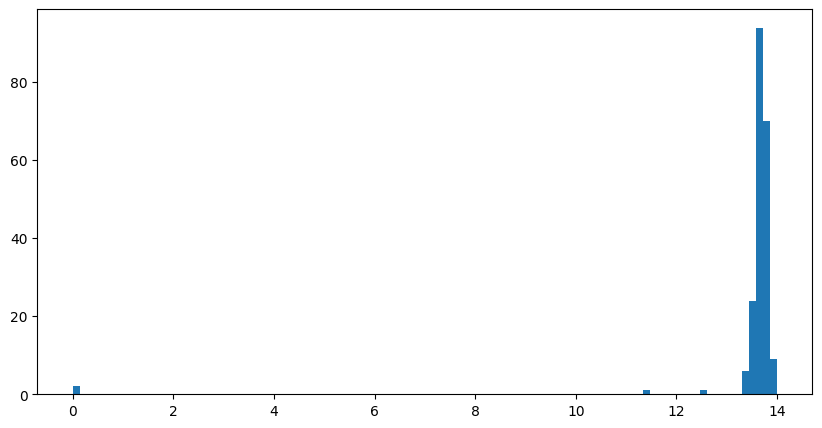

In [1632]:
# Histogram of cantidad entregada
plt.figure(figsize=(10, 5))
plt.hist(of['Cantidad entregada'].astype(float), bins=100)
plt.show()

#### It seems it follows a normal distribution but some of the values are 0 L . Why is that?

#### Look at the duration of the OF which have a quantity delivered of 0

### Save

In [1633]:
# Save the cleaned file
of.to_csv('../../data/processed/of.csv', index=False)

# Temperatura y humedades : anomalies detection and analysis

In [1634]:
import pandas as pd
import matplotlib.pyplot as plt

In [1635]:
dtypes = {'DateTime': str,
           '06299_TI1302.PV': float,
              '06299_MI1302.PV': float,
                '06299_TI1402.PV': float,
                    '06299_MI1402.PV': float,
                        '07633_TI0601.PV': float,
                            '07633_HI0101.PV': float,
                                '07781_TI1501.PV': float,
                                    '07781_MI1501.PV': float}


th = pd.read_excel('../../data/raw/Temperaturas y humedades.xlsx', sheet_name='Datos', dtype=dtypes)
th

,DateTime,06299_TI1302.PV,06299_MI1302.PV,06299_TI1402.PV,06299_MI1402.PV,07633_TI0601.PV,07633_HI0101.PV,07781_TI1501.PV,07781_MI1501.PV
0,2023-03-15 00:00:00.000,23.931585,34.801435,22.854169,35.223422,18.901909,35.290073,20.247395,48.842590
1,2023-03-15 01:00:00.000,23.747978,34.404315,21.562853,36.619001,18.786171,35.456451,20.247395,48.712383
2,2023-03-15 02:00:00.000,23.615734,33.789356,22.580972,33.759999,18.453837,35.040508,20.133463,48.571323
3,2023-03-15 03:00:00.000,19.906570,38.749275,19.631797,38.061402,18.422140,33.698639,20.133463,48.296440
4,2023-03-15 04:00:00.000,19.037770,39.895817,19.551820,37.560487,18.726911,32.628036,19.997829,48.166233
...,...,...,...,...,...,...,...,...,...
13099,2024-09-10 20:00:00.000,18.594929,71.293758,18.877224,64.958649,20.865883,46.839989,21.306482,45.888538
13100,2024-09-10 21:00:00.000,18.399609,72.166002,18.865017,65.335573,20.486107,46.724247,21.169041,43.729252
13101,2024-09-10 22:00:00.000,18.289743,71.672722,18.692587,68.999299,20.105803,46.185329,20.626505,43.327778
13102,2024-09-10 23:00:00.000,18.399609,71.721550,18.828394,73.986536,19.997826,46.062355,20.357046,44.282639


In [1636]:
# Are datetime values loaded correctly?
# Any null on the datetime column?
print(th['DateTime'].isnull().sum())
# Any non digit character on the datetime column?
# Regex for datetime values
print(th['DateTime'].str.contains(r'[^0-9\-\.\,\s:]').sum())
# Does any string not follow this regex?
print(th['DateTime'].str.contains(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}.\d{3}').sum())

0
0
13104


In [1637]:
th['DateTime'] = pd.to_datetime(th['DateTime'])
th.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13104 entries, 0 to 13103
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DateTime         13104 non-null  datetime64[ns]
 1   06299_TI1302.PV  13101 non-null  float64       
 2   06299_MI1302.PV  13100 non-null  float64       
 3   06299_TI1402.PV  13101 non-null  float64       
 4   06299_MI1402.PV  13101 non-null  float64       
 5   07633_TI0601.PV  13103 non-null  float64       
 6   07633_HI0101.PV  13103 non-null  float64       
 7   07781_TI1501.PV  13099 non-null  float64       
 8   07781_MI1501.PV  13100 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 921.5 KB


In [1638]:
# Are there any duplicated rows?
print(th.duplicated().sum())

0


In [1639]:
# There are columns with null values, put them on a list
null_cols = th.columns[th.isnull().any()].tolist()
null_cols

['06299_TI1302.PV',
 '06299_MI1302.PV',
 '06299_TI1402.PV',
 '06299_MI1402.PV',
 '07633_TI0601.PV',
 '07633_HI0101.PV',
 '07781_TI1501.PV',
 '07781_MI1501.PV']

In [1640]:
# Show me the rows with null values
th[th.isnull().any(axis=1)]

,DateTime,06299_TI1302.PV,06299_MI1302.PV,06299_TI1402.PV,06299_MI1402.PV,07633_TI0601.PV,07633_HI0101.PV,07781_TI1501.PV,07781_MI1501.PV
3356,2023-08-01 21:00:00,NaN,NaN,NaN,NaN,21.654366,53.693184,20.151185,51.388889
5674,2023-11-06 10:00:00,18.961966,46.348461,21.318705,38.315154,NaN,NaN,20.401186,41.536457
6016,2023-11-20 16:00:00,NaN,NaN,NaN,NaN,21.950951,39.771412,20.021412,49.377892
6900,2023-12-27 12:00:00,21.855831,38.023010,18.558306,25.224400,23.629196,27.535446,NaN,NaN
6901,2023-12-27 13:00:00,22.856838,37.096119,20.260811,20.074763,23.422116,26.996529,NaN,NaN
6902,2023-12-27 14:00:00,23.455000,35.798210,20.964689,18.704794,22.229825,27.401619,NaN,NaN
9416,2024-04-10 09:00:00,18.795450,41.434066,19.289405,38.580476,20.500580,40.304253,NaN,NaN
10310,2024-05-17 15:00:00,NaN,NaN,NaN,NaN,22.575429,43.729357,20.164280,51.241606
11850,2024-07-20 19:00:00,20.085756,NaN,19.817194,67.473373,23.759399,47.237846,NaN,51.570686


In [1641]:
# Min and max values for each column
th.describe()

,DateTime,06299_TI1302.PV,06299_MI1302.PV,06299_TI1402.PV,06299_MI1402.PV,07633_TI0601.PV,07633_HI0101.PV,07781_TI1501.PV,07781_MI1501.PV
count,13104,13101.000000,13100.000000,13101.000000,13101.000000,13103.000000,13103.000000,13099.000000,13100.000000
mean,2023-12-13 00:11:51.538461696,19.945667,59.758269,21.225364,52.883192,21.153857,44.195312,20.309929,47.745456
min,2023-03-15 00:00:00,11.207923,17.899105,14.017152,16.216573,17.462379,20.525896,19.399305,25.625723
25%,2023-07-29 12:45:00,18.338572,46.750788,19.103062,40.836264,20.225693,40.960716,20.083971,45.382350
50%,2023-12-12 23:30:00,19.634083,61.750085,20.537432,53.287868,21.137154,44.865162,20.288324,49.348072
75%,2024-04-27 12:15:00,21.669557,71.920933,22.182369,66.390607,22.037758,48.216869,20.426504,51.388938
max,2024-09-11 00:00:00,39.573353,93.908478,38.340405,86.951979,26.645691,60.445585,26.199074,59.357064
std,NaN,4.208069,15.538909,3.348947,14.166843,1.252494,6.070702,0.487869,4.930274


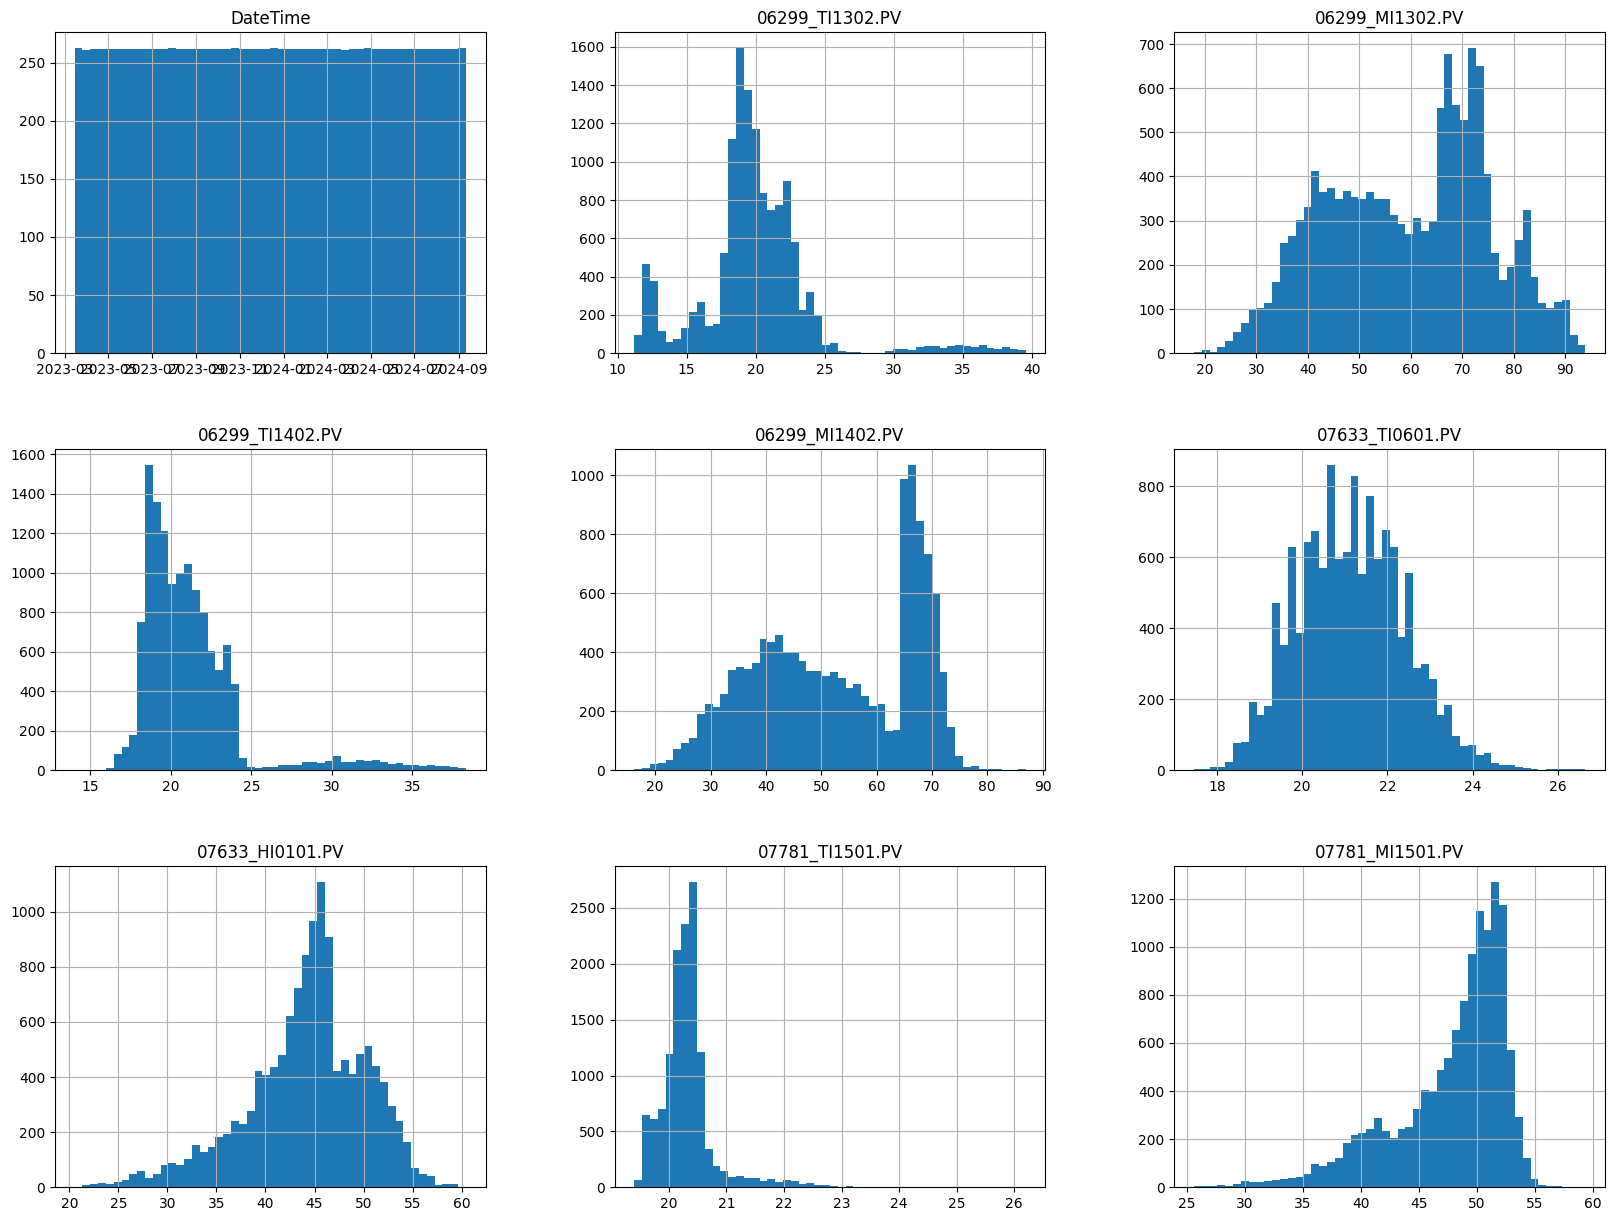

In [1642]:
# Plot hist of each column
th.hist(bins=50, figsize=(20,15))
plt.show()


In [1643]:
# Save the cleaned data
th.to_csv('../../data/processed/th.csv', index=False)

# Types and checks of biorreactor data

In [1644]:
import pandas as pd


In [1645]:
# Load Biorreactor_Total.csv
bt = pd.read_csv('../../data/processed/Biorreactor_Total.csv')
bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471717 entries, 0 to 471716
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DateTime                  471717 non-null  object 
 1   Agitation_PV              431877 non-null  float64
 2   Air_Sparge_PV             431877 non-null  float64
 3   Biocontainer_Pressure_PV  431890 non-null  float64
 4   DO_1_PV                   384002 non-null  float64
 5   DO_2_PV                   245346 non-null  float64
 6   Gas_Overlay_PV            431879 non-null  float64
 7   Load_Cell_Net_PV          431888 non-null  float64
 8   pH_1_PV                   426758 non-null  float64
 9   pH_2_PV                   429724 non-null  float64
 10  PUMP_1_PV                 431878 non-null  float64
 11  PUMP_1_TOTAL              431885 non-null  float64
 12  PUMP_2_PV                 431878 non-null  float64
 13  PUMP_2_TOTAL              431884 non-null  f

In [1646]:
#Change name of columns
bt.columns = ("f_h_bt", "vel_agitacion_bt", "aire_sparger_bt", "pres_bio_bt", "pres_par_O2_1_bt", "pres_par_O2_2_bt", "aire_cupula_bt", "peso_bt", "ph_1_bt", "ph_2_bt", "antiespumante_bt", "total_antiespumante_bt", "sol_base_bt", "total_sol_base_bt", "pres_parcial_O2_bt", "ph_cultivo_bt", "temp_bt", "id_bio")


In [1647]:
# To datetime format from Madrid and convert to UTC
bt['f_h_bt'] = pd.to_datetime(bt['f_h_bt'])
bt['f_h_bt'] = bt['f_h_bt'].dt.tz_localize('Europe/Madrid',ambiguous='infer').dt.tz_convert('UTC')

# To UTC

In [1648]:
# id_bio to string
bt['id_bio'] = bt['id_bio'].astype(str)

In [1649]:
bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471717 entries, 0 to 471716
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   f_h_bt                  471717 non-null  datetime64[ns, UTC]
 1   vel_agitacion_bt        431877 non-null  float64            
 2   aire_sparger_bt         431877 non-null  float64            
 3   pres_bio_bt             431890 non-null  float64            
 4   pres_par_O2_1_bt        384002 non-null  float64            
 5   pres_par_O2_2_bt        245346 non-null  float64            
 6   aire_cupula_bt          431879 non-null  float64            
 7   peso_bt                 431888 non-null  float64            
 8   ph_1_bt                 426758 non-null  float64            
 9   ph_2_bt                 429724 non-null  float64            
 10  antiespumante_bt        431878 non-null  float64            
 11  total_antiespumante_bt  43

In [1650]:
bt.head()

,f_h_bt,vel_agitacion_bt,aire_sparger_bt,pres_bio_bt,pres_par_O2_1_bt,pres_par_O2_2_bt,aire_cupula_bt,peso_bt,ph_1_bt,ph_2_bt,antiespumante_bt,total_antiespumante_bt,sol_base_bt,total_sol_base_bt,pres_parcial_O2_bt,ph_cultivo_bt,temp_bt,id_bio
0,2023-03-14 23:00:00+00:00,80.0,0.0,0.572660,0.0,-0.00553,4.000087,1576.8,-0.156925,5.888288,0.0,14.88,0.0,191.200293,799.991992,799.967969,30.216161,14614
1,2023-03-14 23:15:00+00:00,80.0,0.0,0.491942,0.0,-0.00553,4.000084,1576.8,-0.156925,5.896104,0.0,14.88,0.0,191.200293,799.991992,799.967969,30.135999,14614
2,2023-03-14 23:30:00+00:00,80.0,0.0,0.552688,0.0,-0.00553,4.000161,1576.8,-0.156925,5.896104,0.0,14.88,0.0,191.200293,799.991992,799.967969,29.823988,14614
3,2023-03-14 23:45:00+00:00,80.0,0.0,0.613318,0.0,-0.00553,4.000088,1576.8,-0.156925,5.896104,0.0,14.88,0.0,191.200293,799.991992,799.967969,29.408039,14614
4,2023-03-15 00:00:00+00:00,80.0,0.0,0.552421,0.0,-0.00553,3.999864,1577.2,-0.156925,5.904210,0.0,14.88,0.0,191.200293,799.991992,799.967969,29.191720,14614


In [1651]:
# To pkl
bt.to_pickle('../../data/processed/biorreactor_total.pkl')

# Types and checks of centrifuga data

In [1652]:
import pandas as pd

In [1653]:
# Read the data from the CSV file
ct = pd.read_csv('../../data/processed/Centrifuga_Total.csv')
ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157239 entries, 0 to 157238
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DateTime               157239 non-null  object 
 1   EN_parcial             154983 non-null  float64
 2   EN_total               155199 non-null  float64
 3   Apertura valvula agua  156224 non-null  float64
 4   Caudal                 156223 non-null  float64
 5   Contrapresion          156223 non-null  float64
 6   Presion agua           111674 non-null  float64
 7   Velocidad separacion   156224 non-null  float64
 8   Num_centrifuga         157239 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 10.8+ MB


In [1654]:
# Rename columns
ct = ct.rename(columns={
    'DateTime': 'f_h_ct',
    'EN_parcial': 'desc_parcial_ct',
    'EN_total': 'desc_total_ct',
    'Apertura valvula agua': 'apertura_valvula_agua_ct',
    'Caudal': 'caudal_ct',
    'Contrapresion': 'contrapresion_ct',
    'Presion agua': 'presion_agua_ct',
    'Velocidad separacion': 'vel_separacion_ct',
    'Num_centrifuga': 'id_centr'
})

In [1655]:
# Types
ct['f_h_ct'] = pd.to_datetime(ct['f_h_ct'])
ct['id_centr'] = ct['id_centr'].astype(str)


In [1656]:
# We should then fix the datetimes.
# We can standardize the time to UTC.
ct['f_h_ct'] = ct['f_h_ct'].dt.tz_localize('Europe/Madrid', ambiguous='infer').dt.tz_convert('UTC')

In [1657]:
# Save as pkl
ct.to_pickle('../../data/processed/centrifuga_total.pkl')

# Types and checks of componentes 

In [1658]:
import pandas as pd

In [1659]:
mc = pd.read_csv('../../data/processed/mov_componentes.csv')
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lote             4920 non-null   int64  
 1   Material         4920 non-null   int64  
 2   Lote interno     4920 non-null   int64  
 3   Lote Proveedor   4920 non-null   object 
 4   Qty              4920 non-null   float64
 5   Fecha recepción  4920 non-null   object 
 6   Fecha traslado   4920 non-null   object 
 7   Duration         4920 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 307.6+ KB


In [1660]:
# Drop Lote interno, Lote Proveedor
mc.drop(['Lote interno', 'Lote Proveedor'], axis=1, inplace=True)

Maybe we could use Lote interno and Lote Proveedor for some feature engineering but right now it is of no use


In [1661]:
mc.columns = ['lote', 'material_mc', 'qty_mc', 'f_recepcion_mc', 'f_traslado_mc', 'duracion_mc']
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lote            4920 non-null   int64  
 1   material_mc     4920 non-null   int64  
 2   qty_mc          4920 non-null   float64
 3   f_recepcion_mc  4920 non-null   object 
 4   f_traslado_mc   4920 non-null   object 
 5   duracion_mc     4920 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 230.8+ KB


In [1662]:
# lote to string
mc['lote'] = mc['lote'].astype(str)
# material_mc to string
mc['material_mc'] = mc['material_mc'].astype(str)
# f_recepcion_mc to datetime
mc['f_recepcion_mc'] = pd.to_datetime(mc['f_recepcion_mc'])
# f_traslado_mc to datetime
mc['f_traslado_mc'] = pd.to_datetime(mc['f_traslado_mc'])
# duracion_mc to timedelta
mc['duracion_mc'] = pd.to_timedelta(mc['duracion_mc'])
# From timedelta to float
mc['duracion_mc'] = mc['duracion_mc'].dt.total_seconds().astype(float)

In [1663]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   lote            4920 non-null   object        
 1   material_mc     4920 non-null   object        
 2   qty_mc          4920 non-null   float64       
 3   f_recepcion_mc  4920 non-null   datetime64[ns]
 4   f_traslado_mc   4920 non-null   datetime64[ns]
 5   duracion_mc     4920 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 230.8+ KB


In [1664]:
# f recepcion to utc from madrid
mc['f_recepcion_mc'] = mc['f_recepcion_mc'].dt.tz_localize('Europe/Madrid').dt.tz_convert('UTC')
# f traslado to utc
mc['f_traslado_mc'] = mc['f_traslado_mc'].dt.tz_localize('Europe/Madrid').dt.tz_convert('UTC')

In [1665]:
# pkl
mc.to_pickle('../../data/processed/mov_componentes.pkl')

# Types and checks of cultivo final

In [1666]:
import pandas as pd

In [1667]:
# Read cultivo.csv
cf = pd.read_csv('../../data/processed/cf.csv')

In [1668]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LOTE                          152 non-null    int64  
 1   Orden en el encadenado        152 non-null    int64  
 2   LOTE parental                 22 non-null     float64
 3   ID Bioreactor                 152 non-null    int64  
 4   Fecha/hora inicio             152 non-null    object 
 5   Fecha/hora fin                152 non-null    object 
 6   Volumen de inóculo utilizado  147 non-null    float64
 7   Turbidez inicio cultivo       152 non-null    float64
 8   Turbidez fin cultivo          152 non-null    float64
 9   Viabilidad final cultivo      152 non-null    float64
 10  ID Centrífuga                 152 non-null    int64  
 11  Centrifugación 1 turbidez     148 non-null    float64
 12  Centrifugación 2 turbidez     143 non-null    float64
 13  Produ

In [1669]:


# Rename columns
cf.columns = ['lote', 'orden_encadenado_cf', 'lote_parental_cf', 'id_bio',
                    'f_h_inicio_cf', 'f_h_fin_cf', 'vol_ino_util_cf', 
                    'turb_inicio_cultivo_cf', 'turb_fin_cultivo_cf', 'viab_final_cultivo_cf',
                      'id_centr', 'centr_1_turb_cf', 'centr_2_turb_cf',
                        'producto_1_cf', 'producto_2_cf', 'dur_cf', 'turbidez_diff_cf']
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   lote                    152 non-null    int64  
 1   orden_encadenado_cf     152 non-null    int64  
 2   lote_parental_cf        22 non-null     float64
 3   id_bio                  152 non-null    int64  
 4   f_h_inicio_cf           152 non-null    object 
 5   f_h_fin_cf              152 non-null    object 
 6   vol_ino_util_cf         147 non-null    float64
 7   turb_inicio_cultivo_cf  152 non-null    float64
 8   turb_fin_cultivo_cf     152 non-null    float64
 9   viab_final_cultivo_cf   152 non-null    float64
 10  id_centr                152 non-null    int64  
 11  centr_1_turb_cf         148 non-null    float64
 12  centr_2_turb_cf         143 non-null    float64
 13  producto_1_cf           152 non-null    float64
 14  producto_2_cf           152 non-null    fl

In [1670]:
# lote to string
cf['lote'] = cf['lote'].astype(str)

# Orden_encadenado_cf could be string or int

# lote_parental_cf to string
cf['lote_parental_cf'] = cf['lote_parental_cf'].astype(str)

# id_bio to string
cf['id_bio'] = cf['id_bio'].astype(str)

# f_h_inicio_cf to datetime
cf['f_h_inicio_cf'] = pd.to_datetime(cf['f_h_inicio_cf'])

# f_h_fin_cf to datetime
cf['f_h_fin_cf'] = pd.to_datetime(cf['f_h_fin_cf'])

# id_centr to string
cf['id_centr'] = cf['id_centr'].astype(str)

# duracion_cf to timedelta
cf['dur_cf'] = pd.to_timedelta(cf['dur_cf'])
# dur_cf to int
cf['dur_cf'] = cf['dur_cf'].dt.total_seconds().astype(float)

cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   lote                    152 non-null    object        
 1   orden_encadenado_cf     152 non-null    int64         
 2   lote_parental_cf        152 non-null    object        
 3   id_bio                  152 non-null    object        
 4   f_h_inicio_cf           152 non-null    datetime64[ns]
 5   f_h_fin_cf              152 non-null    datetime64[ns]
 6   vol_ino_util_cf         147 non-null    float64       
 7   turb_inicio_cultivo_cf  152 non-null    float64       
 8   turb_fin_cultivo_cf     152 non-null    float64       
 9   viab_final_cultivo_cf   152 non-null    float64       
 10  id_centr                152 non-null    object        
 11  centr_1_turb_cf         148 non-null    float64       
 12  centr_2_turb_cf         143 non-null    float64   

In [1671]:
# Times to UTC
cf['f_h_inicio_cf'] = cf['f_h_inicio_cf'].dt.tz_localize('Europe/Madrid').dt.tz_convert('UTC')
cf['f_h_fin_cf'] = cf['f_h_fin_cf'].dt.tz_localize('Europe/Madrid').dt.tz_convert('UTC')

In [1672]:
# Save as pkl
cf.to_pickle('../../data/processed/cf.pkl')

# Types and checks of horas inicio fin de centrifugas

In [1673]:
import pandas as pd

In [1674]:
# load horas centrifugas
hc = pd.read_csv('../../data/processed/horas.csv')
hc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Equipo      487 non-null    int64 
 1   Orden       487 non-null    int64 
 2   Centrifuga  487 non-null    int64 
 3   Inicio      487 non-null    object
 4   Fin         487 non-null    object
dtypes: int64(3), object(2)
memory usage: 19.2+ KB


In [1675]:
# Rename columns
hc.columns = ['equipo', 'orden', 'n_centrifugacion_hc', 'f_inicio_hc', 'f_fin_hc']
hc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   equipo               487 non-null    int64 
 1   orden                487 non-null    int64 
 2   n_centrifugacion_hc  487 non-null    int64 
 3   f_inicio_hc          487 non-null    object
 4   f_fin_hc             487 non-null    object
dtypes: int64(3), object(2)
memory usage: 19.2+ KB


In [1676]:
# equipo should be string
hc['equipo'] = hc['equipo'].astype(str)
# orden should be string
hc['orden'] = hc['orden'].astype(str)
# centr_hc string
hc['n_centrifugacion_hc'] = hc['n_centrifugacion_hc'].astype(str)
# f_inicio_hc should be datetime
hc['f_inicio_hc'] = pd.to_datetime(hc['f_inicio_hc'])
# f_fin_hc should be datetime
hc['f_fin_hc'] = pd.to_datetime(hc['f_fin_hc'])

hc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   equipo               487 non-null    object        
 1   orden                487 non-null    object        
 2   n_centrifugacion_hc  487 non-null    object        
 3   f_inicio_hc          487 non-null    datetime64[ns]
 4   f_fin_hc             487 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 19.2+ KB


In [1677]:
# f_inicio_hc head
hc['f_inicio_hc'].head()

0   2023-11-30 08:38:34
1   2023-11-30 12:50:22
2   2024-02-02 08:39:16
3   2024-02-02 11:50:13
4   2023-03-24 08:11:53
Name: f_inicio_hc, dtype: datetime64[ns]

In [1678]:
# It is a Madrid time zone. Convert to UTC
hc['f_inicio_hc'] = hc['f_inicio_hc'].dt.tz_localize('Europe/Madrid').dt.tz_convert('UTC')
hc['f_fin_hc'] = hc['f_fin_hc'].dt.tz_localize('Europe/Madrid').dt.tz_convert('UTC')

In [1679]:
# save as pkl
hc.to_pickle('../../data/processed/horas.pkl')

# Types and checks of inoculo

In [1680]:
import pandas as pd

In [1681]:
# Load inoculo
inoculo = pd.read_csv('../../data/processed/inoculo.csv')

In [1682]:
inoculo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LOTE                      167 non-null    object 
 1   ID bioreactor             167 non-null    int64  
 2   Fecha/hora inicio         163 non-null    object 
 3   Fecha/hora fin            163 non-null    object 
 4   Volumen de cultivo        163 non-null    float64
 5   Turbidez inicio cultivo   161 non-null    float64
 6   Turbidez final cultivo    167 non-null    float64
 7   Viabilidad final cultivo  167 non-null    float64
 8   Turbidez_diff             161 non-null    float64
 9   Duracion                  163 non-null    object 
dtypes: float64(5), int64(1), object(4)
memory usage: 13.2+ KB


In [1683]:
# Rename columns
columns = ['lote', 'id_bio_ino', 'f_h_inicio_ino', 'f_h_fin_ino', 'vol_cultivo_ino', 'turb_inicio_cultivo_ino',
            'turb_fin_cultivo_ino', 'viab_fin_cultivo_ino', 'turb_diff_ino', 'dur_ino',]
inoculo.columns = columns

In [1684]:
# f_h_inicio_ino to datetime from madrid AND CONVERT to UTC
inoculo['f_h_inicio_ino'] = pd.to_datetime(inoculo['f_h_inicio_ino'])
inoculo['f_h_inicio_ino'] = inoculo['f_h_inicio_ino'].dt.tz_localize('Europe/Madrid').dt.tz_convert('UTC')

# f_h_fin_ino to datetime from madrid AND CONVERT to UTC
inoculo['f_h_fin_ino'] = pd.to_datetime(inoculo['f_h_fin_ino']) 
inoculo['f_h_fin_ino'] = inoculo['f_h_fin_ino'].dt.tz_localize('Europe/Madrid').dt.tz_convert('UTC')


# dur_ino to timedelta
inoculo['dur_ino'] = pd.to_timedelta(inoculo['dur_ino'])
# Now to seconds
inoculo['dur_ino'] = inoculo['dur_ino'].dt.total_seconds().astype(float)

In [1685]:
#id_bio to str
inoculo['id_bio_ino'] = inoculo['id_bio_ino'].astype(str)

In [1686]:
# Save with pandas (to a pandas type)
inoculo.to_pickle('../../data/processed/inoculo.pkl')

# Types and checks of OF

In [1687]:
import pandas as pd

In [1688]:
# Load OF.csv into a DataFrame
of = pd.read_csv('../../data/processed/of.csv')
of.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Orden               207 non-null    int64  
 1   Lote                207 non-null    object 
 2   Cantidad entregada  207 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.0+ KB


In [1689]:
# Orden to str
of['Orden'] = of['Orden'].astype(str)
# Lote to str
of['Lote'] = of['Lote'].astype(str)

In [1690]:
# Rename columns
of.columns = ['orden', 'lote', 'cantidad_of']
of.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   orden        207 non-null    object 
 1   lote         207 non-null    object 
 2   cantidad_of  207 non-null    float64
dtypes: float64(1), object(2)
memory usage: 5.0+ KB


In [1691]:
# pkl
of.to_pickle('../../data/processed/of.pkl')

# Types and checks of pino

In [1692]:
import pandas as pd
import numpy as np

In [1693]:
# Load pino
pino = pd.read_csv('../../data/processed/preinoculo.csv')

In [1694]:
pino.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Lote        161 non-null    object 
 1   f_h_inicio  161 non-null    object 
 2   f_h_fin     161 non-null    object 
 3   ph_1        159 non-null    float64
 4   ph_2        148 non-null    float64
 5   ph_3        130 non-null    float64
 6   turb_1      159 non-null    float64
 7   turb_2      148 non-null    float64
 8   turb_3      131 non-null    float64
 9   usada_1     161 non-null    int64  
 10  usada_2     161 non-null    int64  
 11  usada_3     161 non-null    int64  
 12  duracion    161 non-null    object 
dtypes: float64(6), int64(3), object(4)
memory usage: 16.5+ KB


We do not need all these columns. Lets make remake pino so it has one value per row and drop not used values.

In [1695]:
# We should repeat Lote, for each row, but also duracion and f_h_inicio and f_h_fin

# We will create a new dataframe for each usada_1==1 value and from that we need 
# ['ph_1']['turb_1']['f_h_inicio']['f_h_fin']['duracion']['lote']

# For each usada 
lineas = [1,2,3]
new_pino = pd.DataFrame()
for linea in lineas:
    usada = pino[pino['usada_'+str(linea)]==1]
    usada = usada[['ph_'+str(linea),'turb_'+str(linea),'f_h_inicio','f_h_fin','duracion','Lote']].reset_index(drop=True)
    usada.rename(columns={'ph_'+str(linea):'ph','turb_'+str(linea):'turb'},inplace=True)
    new_pino = pd.concat([new_pino,usada],ignore_index=True)
new_pino

,ph,turb,f_h_inicio,f_h_fin,duracion,Lote
0,5.496,28.32,2023-03-26 05:00:00,2023-03-27 07:21:00,1 days 02:21:00,23023
1,5.496,28.32,2023-03-26 05:00:00,2023-03-27 07:21:00,1 days 02:21:00,23024
2,5.480,26.56,2023-03-17 06:00:00,2023-03-28 07:42:00,11 days 01:42:00,23025
3,5.480,26.56,2023-03-17 06:00:00,2023-03-28 07:42:00,11 days 01:42:00,23026
4,5.384,33.84,2023-04-02 05:00:00,2023-04-03 13:30:00,1 days 08:30:00,23027
...,...,...,...,...,...,...
299,5.480,29.68,2024-05-30 00:30:00,2024-05-31 07:46:00,1 days 07:16:00,24089
300,5.392,26.64,2024-06-30 00:30:00,2024-07-01 07:01:00,1 days 06:31:00,24104
301,5.392,26.64,2024-06-30 00:30:00,2024-07-01 07:01:00,1 days 06:31:00,24105
302,5.504,25.60,2024-07-04 00:30:00,2024-07-05 07:04:00,1 days 06:34:00,24108


In [1696]:
# Lote to str
new_pino['Lote'] = new_pino['Lote'].astype(str)
# f_h_inicio and f_h_fin to datetime
new_pino['f_h_inicio'] = pd.to_datetime(new_pino['f_h_inicio'])
new_pino['f_h_fin'] = pd.to_datetime(new_pino['f_h_fin'])
# Convert them from Europe/Madrid to UTC
new_pino['f_h_inicio'] = new_pino['f_h_inicio'].dt.tz_localize('Europe/Madrid').dt.tz_convert('UTC')
new_pino['f_h_fin'] = new_pino['f_h_fin'].dt.tz_localize('Europe/Madrid').dt.tz_convert('UTC')

# duracion to timedelta
new_pino['duracion'] = pd.to_timedelta(new_pino['duracion'])
# from timedelta to int 
new_pino['duracion'] = new_pino['duracion'].dt.total_seconds().astype(float)
new_pino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   ph          303 non-null    float64            
 1   turb        304 non-null    float64            
 2   f_h_inicio  304 non-null    datetime64[ns, UTC]
 3   f_h_fin     304 non-null    datetime64[ns, UTC]
 4   duracion    304 non-null    float64            
 5   Lote        304 non-null    object             
dtypes: datetime64[ns, UTC](2), float64(3), object(1)
memory usage: 14.4+ KB


In [1697]:
# Rename Lote to lote
new_pino.rename(columns={'Lote':'lote', 'ph': 'ph_pino', 'turb': 'turb_pino', 
                         'f_h_inicio': 'f_h_inicio_pino', 'f_h_fin': 'f_h_fin_pino', 
                         'duracion': 'dur_pino'}, inplace=True)

In [1698]:
# Show the nan row
new_pino[new_pino.isnull().any(axis=1)]

,ph_pino,turb_pino,f_h_inicio_pino,f_h_fin_pino,dur_pino,lote
297,NaN,27.84,2024-05-11 22:30:00+00:00,2024-05-13 05:54:00+00:00,113040.0,24075


In [1699]:
# get lote where 23023
new_pino[new_pino['lote']=='23023']

,ph_pino,turb_pino,f_h_inicio_pino,f_h_fin_pino,dur_pino,lote
0,5.496,28.32,2023-03-26 03:00:00+00:00,2023-03-27 05:21:00+00:00,94860.0,23023
129,5.504,27.92,2023-03-26 03:00:00+00:00,2023-03-27 05:21:00+00:00,94860.0,23023


In [1700]:
pino_orig = new_pino.copy()
# Groupby by lote size == 1 values

In [1701]:
# Convert the df back to ph_1, turb_1, ph_2, turb_2
# We should group by lote and then split the rows into columns in a new dataframe
pino_orig = new_pino.copy()
# Now for each lote, we will have 2 rows. Now use groupby and apply
# Group by lote
pino_orig = pino_orig.groupby('lote').apply(lambda x: x.reset_index(drop=True))
pino_orig['ph_1'] = pino_orig['ph_pino']
pino_orig['turb_1'] = pino_orig['turb_pino']
pino_orig['ph_2'] = pino_orig['ph_pino'].shift(-1)
pino_orig['turb_2'] = pino_orig['turb_pino'].shift(-1)

pino_orig = pino_orig.reset_index(drop=True)
# Drop dupes
pino_orig = pino_orig.drop_duplicates(subset=['lote'])
pino_orig

/tmp/ipykernel_10017/1745385144.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pino_orig = pino_orig.groupby('lote').apply(lambda x: x.reset_index(drop=True))


,ph_pino,turb_pino,f_h_inicio_pino,f_h_fin_pino,dur_pino,lote,ph_1,turb_1,ph_2,turb_2
0,5.496,28.32,2023-03-26 03:00:00+00:00,2023-03-27 05:21:00+00:00,94860.0,23023,5.496,28.32,5.504,27.92
2,5.496,28.32,2023-03-26 03:00:00+00:00,2023-03-27 05:21:00+00:00,94860.0,23024,5.496,28.32,5.504,27.92
4,5.480,26.56,2023-03-17 05:00:00+00:00,2023-03-28 05:42:00+00:00,956520.0,23025,5.480,26.56,5.520,27.52
6,5.480,26.56,2023-03-17 05:00:00+00:00,2023-03-28 05:42:00+00:00,956520.0,23026,5.480,26.56,5.520,27.52
8,5.384,33.84,2023-04-02 03:00:00+00:00,2023-04-03 11:30:00+00:00,117000.0,23027,5.384,33.84,5.400,32.48
...,...,...,...,...,...,...,...,...,...,...
295,5.408,27.44,2024-06-29 22:30:00+00:00,2024-07-01 05:01:00+00:00,109860.0,24104,5.408,27.44,5.392,26.64
297,5.408,27.44,2024-06-29 22:30:00+00:00,2024-07-01 05:01:00+00:00,109860.0,24105,5.408,27.44,5.392,26.64
299,5.432,28.80,2024-07-03 22:30:00+00:00,2024-07-05 05:04:00+00:00,110040.0,24108,5.432,28.80,5.504,25.60
301,5.432,28.80,2024-07-03 22:30:00+00:00,2024-07-05 05:04:00+00:00,110040.0,24111,5.432,28.80,5.504,25.60


In [1702]:
# ph_2 null
pino_orig[pino_orig['ph_2'].isnull()]

,ph_pino,turb_pino,f_h_inicio_pino,f_h_fin_pino,dur_pino,lote,ph_1,turb_1,ph_2,turb_2
262,5.424,26.96,2024-05-11 22:30:00+00:00,2024-05-13 05:54:00+00:00,113040.0,24075,5.424,26.96,NaN,27.84
303,5.352,26.80,2023-11-11 23:30:00+00:00,2023-11-13 06:25:00+00:00,111300.0,P23462,5.352,26.80,NaN,NaN


In [1703]:
# Rename ph_1, turb_1, ph_2, turb_2
pino_orig.rename(columns={'ph_1': 'ph_1_pino', 'turb_1': 'turb_1_pino', 
                          'ph_2': 'ph_2_pino', 'turb_2': 'turb_2_pino'}, inplace=True)


## Original

In [1704]:
# as pkl
new_pino.to_pickle('../../data/processed/preinoculo_alternate.pkl')

In [1705]:
# as pkl
pino_orig.to_pickle('../../data/processed/preinoculo.pkl')

# Types and checks of temperatura y humedades

In [1706]:
import pandas as pd

In [1707]:
th = pd.read_csv('../../data/processed/th.csv')
th.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13104 entries, 0 to 13103
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DateTime         13104 non-null  object 
 1   06299_TI1302.PV  13101 non-null  float64
 2   06299_MI1302.PV  13100 non-null  float64
 3   06299_TI1402.PV  13101 non-null  float64
 4   06299_MI1402.PV  13101 non-null  float64
 5   07633_TI0601.PV  13103 non-null  float64
 6   07633_HI0101.PV  13103 non-null  float64
 7   07781_TI1501.PV  13099 non-null  float64
 8   07781_MI1501.PV  13100 non-null  float64
dtypes: float64(8), object(1)
memory usage: 921.5+ KB


In [1708]:
# Rename the columns from this dict
columns = {'DateTime': 'datetime_th',
           '06299_TI1302.PV': 't_bio_th',
              '06299_MI1302.PV': 'h_bio_th',
                '06299_TI1402.PV': 't_cent_th',
                    '06299_MI1402.PV': 'h_cent_th',
                        '07633_TI0601.PV': 't_al_princ_th',
                            '07633_HI0101.PV': 'h_al_princ_th',
                                '07781_TI1501.PV': 't_al_prod_th',
                                    '07781_MI1501.PV': 'h_al_prod_th'}
th.rename(columns=columns, inplace=True)
th.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13104 entries, 0 to 13103
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime_th    13104 non-null  object 
 1   t_bio_th       13101 non-null  float64
 2   h_bio_th       13100 non-null  float64
 3   t_cent_th      13101 non-null  float64
 4   h_cent_th      13101 non-null  float64
 5   t_al_princ_th  13103 non-null  float64
 6   h_al_princ_th  13103 non-null  float64
 7   t_al_prod_th   13099 non-null  float64
 8   h_al_prod_th   13100 non-null  float64
dtypes: float64(8), object(1)
memory usage: 921.5+ KB


In [1709]:
# datetime_th to datetime
th['datetime_th'] = pd.to_datetime(th['datetime_th'])
# To UTC from Madrid
th['datetime_th'] = th['datetime_th'].dt.tz_localize('Europe/Madrid', ambiguous='infer').dt.tz_convert('UTC')

In [1710]:
# Save to pkl
th.to_pickle('../../data/processed/th.pkl')

# Test: anomalies detection and analysis

In [1711]:
import pandas as pd


In [1712]:
# load data
test = pd.read_excel('../../data/raw/Fases producción_test v02.xlsx')

In [1713]:
inoculo = pd.read_csv('../../data/processed/inoculo.csv')

In [1714]:
test

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2
0,24054,1,NaN,14616,2024-04-16 08:12:00,2024-04-18 07:28:00,81.60,15.44,85.60,184800000,14246.0,27.84,23.96,NaN,NaN
1,24055,1,NaN,14614,2024-04-13 08:18:00,2024-04-15 08:30:00,NaN,14.32,73.68,175200000,12912.0,30.96,23.16,NaN,NaN
2,24056,1,NaN,14615,2024-04-13 08:18:00,2024-04-15 08:15:00,NaN,14.56,82.40,168000000,14246.0,29.52,28.88,NaN,NaN
3,24057,1,NaN,13170,2024-04-16 08:12:00,2024-04-18 07:41:00,82.40,17.76,78.96,180800000,12912.0,31.04,25.32,NaN,NaN
4,24058,2,24055.0,14614,2024-04-15 12:28:00,2024-04-17 08:14:00,87.20,18.00,82.40,144800000,12912.0,26.08,20.36,NaN,NaN
5,24059,2,24056.0,14615,2024-04-15 12:27:00,2024-04-17 08:22:00,87.20,18.08,78.40,166400000,14246.0,26.88,23.64,NaN,NaN
6,24060,1,NaN,13169,2024-04-20 09:19:00,2024-04-22 09:12:00,82.40,25.92,76.32,161600000,14246.0,32.56,17.92,NaN,NaN
7,24061,1,NaN,14617,2024-04-20 09:24:00,2024-04-22 09:12:00,81.60,28.56,68.96,148800000,12912.0,27.76,14.72,NaN,NaN
8,24062,3,24058.0,14614,2024-04-17 12:05:00,2024-04-19 08:05:00,87.20,18.88,80.00,164800000,12912.0,27.52,24.64,NaN,NaN
9,24063,1,NaN,13170,2024-04-23 10:35:00,2024-04-25 11:14:00,NaN,15.52,68.72,180800000,12912.0,25.92,18.28,NaN,NaN


In [1715]:
test['LOTE'] = test['LOTE'].astype(str)

In [1716]:
# Inoculo unique vs test unique
inoculo_unique = inoculo['LOTE'].unique()
test_unique = test['LOTE'].unique()
# perform intersection
intersection = list(set(inoculo_unique) & set(test_unique))

In [1717]:
# Load pino_rebuilt
pino_rebuilt = pd.read_csv('../../data/processed/preinoculo.csv')
pino_rebuilt.info()
pino_rebuilt['Lote'] = pino_rebuilt['Lote'].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Lote        161 non-null    object 
 1   f_h_inicio  161 non-null    object 
 2   f_h_fin     161 non-null    object 
 3   ph_1        159 non-null    float64
 4   ph_2        148 non-null    float64
 5   ph_3        130 non-null    float64
 6   turb_1      159 non-null    float64
 7   turb_2      148 non-null    float64
 8   turb_3      131 non-null    float64
 9   usada_1     161 non-null    int64  
 10  usada_2     161 non-null    int64  
 11  usada_3     161 non-null    int64  
 12  duracion    161 non-null    object 
dtypes: float64(6), int64(3), object(4)
memory usage: 16.5+ KB


In [1718]:
# Are there LOTE which are not in the pino data? get the number of them
pino_rebuilt['Lote'].isin(test['LOTE']).value_counts()
# Reverse
test['LOTE'].isin(pino_rebuilt['Lote']).value_counts()

LOTE
True     34
False    22
Name: count, dtype: int64

In [1719]:
# load OF
OF = pd.read_csv('../../data/processed/of.csv')
OF['Lote'] = OF['Lote'].astype(str)
OF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Orden               207 non-null    int64  
 1   Lote                207 non-null    object 
 2   Cantidad entregada  207 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.0+ KB


In [1720]:
# Are there LOTE which are not in the OF data? get the number of them
OF['Lote'].isin(test['LOTE']).value_counts()
# Reverse
test['LOTE'].isin(OF['Lote']).value_counts()

LOTE
True     55
False     1
Name: count, dtype: int64

In [1721]:
# Load mov_componentes
mov_componentes = pd.read_csv('../../data/processed/mov_componentes.csv')
mov_componentes['Lote'] = mov_componentes['Lote'].astype(str)
mov_componentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lote             4920 non-null   object 
 1   Material         4920 non-null   int64  
 2   Lote interno     4920 non-null   int64  
 3   Lote Proveedor   4920 non-null   object 
 4   Qty              4920 non-null   float64
 5   Fecha recepción  4920 non-null   object 
 6   Fecha traslado   4920 non-null   object 
 7   Duration         4920 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 307.6+ KB


In [1722]:
# Are there LOTE which are not in the mov_componentes data? get the number of them
#use apply
mov_componentes['Lote'].isin(test['LOTE'])
# Reverse
test['LOTE'].isin(mov_componentes['Lote']).value_counts()


LOTE
True     54
False     2
Name: count, dtype: int64

In [1723]:
# lote which is not in any of the data
# Not in mov_componentes
notmov = test[~test['LOTE'].isin(mov_componentes['Lote'])]
# Not in OF
notof = test[~test['LOTE'].isin(OF['Lote'])]
# Not in pino_rebuilt
not_pino = test[~test['LOTE'].isin(pino_rebuilt['Lote'])]

# 24076

In [1724]:
# Extract with lote = 24076, f_h_inicio from pino
pino_rebuilt[pino_rebuilt['Lote'] == '24076']

,Lote,f_h_inicio,f_h_fin,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion
141,24076,2024-05-16 00:30:00,2024-05-17 07:15:00,5.408,5.408,5.384,27.36,28.08,24.32,1,1,0,1 days 06:45:00


In [1725]:
# load cultivo.csv
cultivo = pd.read_csv('../../data/processed/cf.csv')
cultivo.info()
cultivo['LOTE'] = cultivo['LOTE'].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LOTE                          152 non-null    int64  
 1   Orden en el encadenado        152 non-null    int64  
 2   LOTE parental                 22 non-null     float64
 3   ID Bioreactor                 152 non-null    int64  
 4   Fecha/hora inicio             152 non-null    object 
 5   Fecha/hora fin                152 non-null    object 
 6   Volumen de inóculo utilizado  147 non-null    float64
 7   Turbidez inicio cultivo       152 non-null    float64
 8   Turbidez fin cultivo          152 non-null    float64
 9   Viabilidad final cultivo      152 non-null    float64
 10  ID Centrífuga                 152 non-null    int64  
 11  Centrifugación 1 turbidez     148 non-null    float64
 12  Centrifugación 2 turbidez     143 non-null    float64
 13  Produ

In [1726]:
# is there any Fecha/hora inicio > f_h_inicio from pino_rebuilt?
# Merge
cultivo_pino = pd.merge(cultivo, pino_rebuilt, left_on='LOTE', right_on='Lote')
cultivo_pino['Fecha/hora inicio'] = pd.to_datetime(cultivo_pino['Fecha/hora inicio'])
cultivo_pino['f_h_inicio'] = pd.to_datetime(cultivo_pino['f_h_inicio'])
# Show the rows where Fecha/hora inicio > f_h_inicio
cultivo_pino[cultivo_pino['Fecha/hora inicio'] < cultivo_pino['f_h_inicio']]


,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,...,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion


In [1727]:
cultivo_pino[cultivo_pino['Fecha/hora inicio'] < cultivo_pino['f_h_inicio']]['LOTE'].nunique()

0

In [1728]:
cultivo_pino[cultivo_pino['Fecha/hora inicio'] > cultivo_pino['f_h_inicio']]['LOTE'].nunique()

118

In [1729]:
# Get the number of lotes from pino which are not in the cultivo data
pino_rebuilt['Lote'].isin(cultivo['LOTE']).value_counts()
## Reverse
cultivo['LOTE'].isin(pino_rebuilt['Lote']).value_counts()

LOTE
True     118
False     34
Name: count, dtype: int64

In [1730]:
# And in test?
test_pino = pd.merge(test, pino_rebuilt, left_on='LOTE', right_on='Lote')
test_pino['Fecha/hora inicio'] = pd.to_datetime(test_pino['Fecha/hora inicio'])
test_pino['f_h_inicio'] = pd.to_datetime(test_pino['f_h_inicio'])
# Show the rows where Fecha/hora inicio > f_h_inicio
# drop dupes
test_pino = test_pino.drop_duplicates()
test_pino[test_pino['Fecha/hora inicio'] < test_pino['f_h_inicio']]
# Group that by LOTE
#test_pino[test_pino['Fecha/hora inicio'] < test_pino['f_h_inicio']].groupby('LOTE').size().index.nunique()

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,...,ph_1,ph_2,ph_3,turb_1,turb_2,turb_3,usada_1,usada_2,usada_3,duracion
10,24071,1,NaN,13170,2024-04-27 10:01:00,2024-04-29 09:05:00,82.96,16.40,81.60,168000000,...,6.280,5.488,NaN,27.36,24.88,NaN,0,1,0,1 days 07:15:00
11,24072,1,NaN,14617,2024-04-30 09:59:00,2024-05-02 07:36:00,80.40,16.16,84.80,195200000,...,5.424,5.424,NaN,25.36,30.96,NaN,0,1,0,1 days 07:46:00
13,24074,1,NaN,14615,2024-05-14 08:48:00,2024-05-16 08:08:00,83.60,18.72,71.36,197600000,...,5.408,5.408,5.384,27.36,28.08,24.32,1,1,0,1 days 06:45:00
15,24076,1,NaN,14617,2024-05-14 08:50:00,2024-05-16 07:15:00,83.20,17.12,75.52,179200000,...,5.408,5.408,5.384,27.36,28.08,24.32,1,1,0,1 days 06:45:00
16,24077,1,NaN,14617,2024-05-18 08:35:00,2024-05-20 08:20:00,82.00,16.24,81.60,204800000,...,5.400,5.384,5.400,30.96,27.76,26.24,1,1,0,1 days 06:44:00
18,24081,2,24076.0,14617,2024-05-20 12:04:00,2024-05-22 09:16:00,NaN,19.44,80.00,90400000,...,5.440,5.504,5.496,29.68,31.20,28.96,1,1,0,1 days 07:35:00
19,24083,3,24080.0,14617,2024-05-22 13:10:00,2024-05-24 10:02:00,NaN,18.48,85.60,169600000,...,5.384,5.400,5.400,25.84,30.24,29.68,1,1,0,1 days 06:56:00
21,24085,1,NaN,14615,2024-05-25 08:55:00,2024-05-27 09:19:00,81.60,17.92,74.96,163200000,...,5.440,5.504,5.496,29.68,31.20,28.96,1,1,0,1 days 07:35:00
22,24088,2,24084.0,14615,2024-05-27 13:21:00,2024-05-29 09:13:00,NaN,16.72,74.16,171200000,...,5.472,5.616,5.480,30.56,31.20,29.68,1,0,1,1 days 07:16:00
24,24091,3,24086.0,14614,2024-05-29 12:47:00,2024-05-31 09:39:00,NaN,19.76,73.52,144800000,...,5.392,5.424,5.472,33.44,32.16,29.36,1,1,0,1 days 06:33:00


In [1731]:
test_pino[test_pino['Fecha/hora inicio'] > test_pino['f_h_inicio']]
# Group taht by LOTE
test_pino[test_pino['Fecha/hora inicio'] > test_pino['f_h_inicio']].groupby('LOTE').size().index.nunique()

22

In [1732]:
test_pino['LOTE'].nunique()

34

In [1733]:
test['LOTE'].nunique()

56

In [1734]:
test.shape

(56, 15)

In [1735]:
# Now with ino, load ino with pkl
ino = pd.read_pickle('../../data/processed/inoculo.pkl')
ino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   lote                     167 non-null    object             
 1   id_bio_ino               167 non-null    object             
 2   f_h_inicio_ino           163 non-null    datetime64[ns, UTC]
 3   f_h_fin_ino              163 non-null    datetime64[ns, UTC]
 4   vol_cultivo_ino          163 non-null    float64            
 5   turb_inicio_cultivo_ino  161 non-null    float64            
 6   turb_fin_cultivo_ino     167 non-null    float64            
 7   viab_fin_cultivo_ino     167 non-null    float64            
 8   turb_diff_ino            161 non-null    float64            
 9   dur_ino                  163 non-null    float64            
dtypes: datetime64[ns, UTC](2), float64(6), object(2)
memory usage: 13.2+ KB


In [1736]:
# f_h_inicio to datetime
ino['f_h_inicio_ino'] = pd.to_datetime(ino['f_h_inicio_ino'])
# f_h_fin to datetime
ino['f_h_fin_ino'] = pd.to_datetime(ino['f_h_fin_ino'])
ino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   lote                     167 non-null    object             
 1   id_bio_ino               167 non-null    object             
 2   f_h_inicio_ino           163 non-null    datetime64[ns, UTC]
 3   f_h_fin_ino              163 non-null    datetime64[ns, UTC]
 4   vol_cultivo_ino          163 non-null    float64            
 5   turb_inicio_cultivo_ino  161 non-null    float64            
 6   turb_fin_cultivo_ino     167 non-null    float64            
 7   viab_fin_cultivo_ino     167 non-null    float64            
 8   turb_diff_ino            161 non-null    float64            
 9   dur_ino                  163 non-null    float64            
dtypes: datetime64[ns, UTC](2), float64(6), object(2)
memory usage: 13.2+ KB


In [1737]:
# Datetimes to tz aware, they are from Europe/Madrid
test['Fecha/hora inicio'] = pd.to_datetime(test['Fecha/hora inicio']).dt.tz_localize('Europe/Madrid')
test['Fecha/hora fin'] = pd.to_datetime(test['Fecha/hora fin']).dt.tz_localize('Europe/Madrid')
# To UTC
test['Fecha/hora inicio'] = test['Fecha/hora inicio'].dt.tz_convert('UTC')
test['Fecha/hora fin'] = test['Fecha/hora fin'].dt.tz_convert('UTC')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   LOTE                          56 non-null     object             
 1   Orden en el encadenado        56 non-null     int64              
 2   LOTE parental                 22 non-null     float64            
 3   ID Bioreactor                 56 non-null     int64              
 4   Fecha/hora inicio             56 non-null     datetime64[ns, UTC]
 5   Fecha/hora fin                56 non-null     datetime64[ns, UTC]
 6   Volumen de inóculo utilizado  43 non-null     float64            
 7   Turbidez inicio cultivo       56 non-null     float64            
 8   Turbidez fin cultivo          56 non-null     float64            
 9   Viabilidad final cultivo      56 non-null     int64              
 10  ID Centrífuga                 56 non-nul

In [1738]:
# Now merge ino with test
test_ino = pd.merge(test, ino, left_on='LOTE', right_on='lote')
test_ino['Fecha/hora inicio'] = pd.to_datetime(test_ino['Fecha/hora inicio'])
test_ino['f_h_inicio_ino'] = pd.to_datetime(test_ino['f_h_inicio_ino'])
# Show the rows where Fecha/hora inicio > f_h_inicio
test_ino[test_ino['Fecha/hora inicio'] < test_ino['f_h_inicio_ino']]

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,...,lote,id_bio_ino,f_h_inicio_ino,f_h_fin_ino,vol_cultivo_ino,turb_inicio_cultivo_ino,turb_fin_cultivo_ino,viab_fin_cultivo_ino,turb_diff_ino,dur_ino
10,24071,1,NaN,13170,2024-04-27 08:01:00+00:00,2024-04-29 07:05:00+00:00,82.96,16.40,81.60,168000000,...,24071,14618,2024-04-29 05:45:00+00:00,2024-04-30 07:30:00+00:00,80.400,17.84,27.36,84000000.0,9.52,92700.0
11,24072,1,NaN,14617,2024-04-30 07:59:00+00:00,2024-05-02 05:36:00+00:00,80.40,16.16,84.80,195200000,...,24072,13172,2024-05-13 06:16:00+00:00,2024-05-14 06:33:00+00:00,84.000,13.04,24.32,144800000.0,11.28,87420.0
13,24074,1,NaN,14615,2024-05-14 06:48:00+00:00,2024-05-16 06:08:00+00:00,83.60,18.72,71.36,197600000,...,24074,14618,2024-05-17 05:15:00+00:00,2024-05-18 06:08:00+00:00,168.032,14.08,23.68,129600000.0,9.60,89580.0
15,24076,1,NaN,14617,2024-05-14 06:50:00+00:00,2024-05-16 05:15:00+00:00,83.20,17.12,75.52,179200000,...,24076,14618,2024-05-17 05:15:00+00:00,2024-05-18 06:08:00+00:00,168.032,14.08,23.68,129600000.0,9.60,89580.0
16,24077,1,NaN,14617,2024-05-18 06:35:00+00:00,2024-05-20 06:20:00+00:00,82.00,16.24,81.60,204800000,...,24077,13172,2024-05-20 05:14:00+00:00,2024-05-21 05:01:00+00:00,166.880,16.24,26.48,122400000.0,10.24,85620.0
18,24081,2,24076.0,14617,2024-05-20 10:04:00+00:00,2024-05-22 07:16:00+00:00,NaN,19.44,80.00,90400000,...,24081,13172,2024-05-27 06:05:00+00:00,2024-05-28 05:54:00+00:00,161.200,16.24,25.52,122400000.0,9.28,85740.0
19,24083,3,24080.0,14617,2024-05-22 11:10:00+00:00,2024-05-24 08:02:00+00:00,NaN,18.48,85.60,169600000,...,24083,13171,2024-05-24 05:26:00+00:00,2024-05-25 06:55:00+00:00,166.240,14.08,26.32,124800000.0,12.24,91740.0
21,24085,1,NaN,14615,2024-05-25 06:55:00+00:00,2024-05-27 07:19:00+00:00,81.60,17.92,74.96,163200000,...,24085,13172,2024-05-27 06:05:00+00:00,2024-05-28 05:54:00+00:00,161.200,16.24,25.52,122400000.0,9.28,85740.0
22,24088,2,24084.0,14615,2024-05-27 11:21:00+00:00,2024-05-29 07:13:00+00:00,NaN,16.72,74.16,171200000,...,24088,13171,2024-05-31 05:46:00+00:00,2024-06-01 05:56:00+00:00,166.800,16.00,25.52,129600000.0,9.52,87000.0
24,24091,3,24086.0,14614,2024-05-29 10:47:00+00:00,2024-05-31 07:39:00+00:00,NaN,19.76,73.52,144800000,...,24091,13172,2024-06-03 05:03:00+00:00,2024-06-04 05:03:00+00:00,166.800,17.20,25.60,104000000.0,8.40,86400.0


In [1739]:
# Get unique
test_ino[test_ino['Fecha/hora inicio'] < test_ino['f_h_inicio_ino']]['LOTE'].nunique()

12

In [1740]:
# load of with pkl
of = pd.read_pickle('../../data/processed/of.pkl')


In [1741]:
# Is there any of those 12 in the OF data?
twelve = test_ino[test_ino['Fecha/hora inicio'] < test_ino['f_h_inicio_ino']]['LOTE'].unique()
# is any of those 12 in the OF data?
of['lote'].apply(lambda x: x in twelve).value_counts()
# print them
of[of['lote'].apply(lambda x: x in twelve)]

,orden,lote,cantidad_of
142,200200230,24074,13.38
172,200202555,24071,13.57
173,200202557,24072,13.72
177,200205524,24091,13.71
179,200205527,24077,13.72
182,200205530,24083,13.75
183,200205531,24085,13.77
185,200205533,24081,13.72
187,200205535,24088,13.67
193,200205684,24095,13.65


In [1742]:
# Print pino info
pino_rebuilt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Lote        161 non-null    object 
 1   f_h_inicio  161 non-null    object 
 2   f_h_fin     161 non-null    object 
 3   ph_1        159 non-null    float64
 4   ph_2        148 non-null    float64
 5   ph_3        130 non-null    float64
 6   turb_1      159 non-null    float64
 7   turb_2      148 non-null    float64
 8   turb_3      131 non-null    float64
 9   usada_1     161 non-null    int64  
 10  usada_2     161 non-null    int64  
 11  usada_3     161 non-null    int64  
 12  duracion    161 non-null    object 
dtypes: float64(6), int64(3), object(4)
memory usage: 16.5+ KB


In [1743]:
# Are those lotes the same as before?
unique_pino = test_pino[test_pino['Fecha/hora inicio'] < test_pino['f_h_inicio']]['LOTE'].unique()
unique_ino = test_ino[test_ino['Fecha/hora inicio'] < test_ino['f_h_inicio_ino']]['LOTE'].unique()

# Compare the sets
set(unique_pino) == set(unique_ino)

True

In [1744]:
print(cultivo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LOTE                          152 non-null    object 
 1   Orden en el encadenado        152 non-null    int64  
 2   LOTE parental                 22 non-null     float64
 3   ID Bioreactor                 152 non-null    int64  
 4   Fecha/hora inicio             152 non-null    object 
 5   Fecha/hora fin                152 non-null    object 
 6   Volumen de inóculo utilizado  147 non-null    float64
 7   Turbidez inicio cultivo       152 non-null    float64
 8   Turbidez fin cultivo          152 non-null    float64
 9   Viabilidad final cultivo      152 non-null    float64
 10  ID Centrífuga                 152 non-null    int64  
 11  Centrifugación 1 turbidez     148 non-null    float64
 12  Centrifugación 2 turbidez     143 non-null    float64
 13  Produ

In [1745]:
# Cultivo Fecha/hora inicio to datetime from Europe/Madrid
cultivo['Fecha/hora inicio'] = pd.to_datetime(cultivo['Fecha/hora inicio']).dt.tz_localize('Europe/Madrid')
cultivo['Fecha/hora fin'] = pd.to_datetime(cultivo['Fecha/hora fin']).dt.tz_localize('Europe/Madrid')
# To UTC
cultivo['Fecha/hora inicio'] = cultivo['Fecha/hora inicio'].dt.tz_convert('UTC')
cultivo['Fecha/hora fin'] = cultivo['Fecha/hora fin'].dt.tz_convert('UTC')


In [1746]:
# Does this happen with cultivo?
cultivo_ino = pd.merge(cultivo, ino, left_on='LOTE', right_on='lote')
cultivo_ino['Fecha/hora inicio'] = pd.to_datetime(cultivo_ino['Fecha/hora inicio'])
cultivo_ino['f_h_inicio_ino'] = pd.to_datetime(cultivo_ino['f_h_inicio_ino'])
# Show the rows where Fecha/hora inicio > f_h_inicio
cultivo_ino[cultivo_ino['Fecha/hora inicio'] < cultivo_ino['f_h_inicio_ino']]

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,...,lote,id_bio_ino,f_h_inicio_ino,f_h_fin_ino,vol_cultivo_ino,turb_inicio_cultivo_ino,turb_fin_cultivo_ino,viab_fin_cultivo_ino,turb_diff_ino,dur_ino


In [1747]:
# Print info of test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   LOTE                          56 non-null     object             
 1   Orden en el encadenado        56 non-null     int64              
 2   LOTE parental                 22 non-null     float64            
 3   ID Bioreactor                 56 non-null     int64              
 4   Fecha/hora inicio             56 non-null     datetime64[ns, UTC]
 5   Fecha/hora fin                56 non-null     datetime64[ns, UTC]
 6   Volumen de inóculo utilizado  43 non-null     float64            
 7   Turbidez inicio cultivo       56 non-null     float64            
 8   Turbidez fin cultivo          56 non-null     float64            
 9   Viabilidad final cultivo      56 non-null     int64              
 10  ID Centrífuga                 56 non-nul

In [1748]:
# add new column to test with the time difference
test['dur_cf'] = test['Fecha/hora fin'] - test['Fecha/hora inicio']
test['dur_cf'] = test['dur_cf'].dt.total_seconds().astype(float)

# add new column to test with the turbidez difference
test['turb_diff_cf'] = test['Turbidez fin cultivo'] - test['Turbidez inicio cultivo']



In [1749]:
# Rename columns
test.columns = ['lote', 'orden_encadenado_cf', 'lote_parental_cf', 'id_bio',
                    'f_h_inicio_cf', 'f_h_fin_cf', 'vol_ino_util_cf', 
                    'turb_inicio_cultivo_cf', 'turb_fin_cultivo_cf', 'viab_final_cultivo_cf',
                      'id_centr', 'centr_1_turb_cf', 'centr_2_turb_cf',
                        'producto_1_cf', 'producto_2_cf', 'dur_cf', 'turbidez_diff_cf']
# Change types as with cf
test['lote'] = test['lote'].astype(str)

test['id_centr'] = test['id_centr'].astype(str)
test['id_bio'] = test['id_bio'].astype(str)

test['viab_final_cultivo_cf'] = test['viab_final_cultivo_cf'].astype(float)

test ['lote_parental_cf'] = test['lote_parental_cf'].astype(str)

test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   lote                    56 non-null     object             
 1   orden_encadenado_cf     56 non-null     int64              
 2   lote_parental_cf        56 non-null     object             
 3   id_bio                  56 non-null     object             
 4   f_h_inicio_cf           56 non-null     datetime64[ns, UTC]
 5   f_h_fin_cf              56 non-null     datetime64[ns, UTC]
 6   vol_ino_util_cf         43 non-null     float64            
 7   turb_inicio_cultivo_cf  56 non-null     float64            
 8   turb_fin_cultivo_cf     56 non-null     float64            
 9   viab_final_cultivo_cf   56 non-null     float64            
 10  id_centr                56 non-null     object             
 11  centr_1_turb_cf         56 non-null     float64

In [1750]:
# Save as pkl
test.to_pickle('../../data/processed/test.pkl')

# Join all files and tables for train into a single dataframe by lote, fecha and orden

In [1751]:
import pandas as pd

In [1752]:
# Load the pkl files
path = '../../data/processed/'
ct = pd.read_pickle(path + 'centrifuga_total.pkl')
cf = pd.read_pickle(path + 'cf.pkl')
h = pd.read_pickle(path + 'horas.pkl')
mc = pd.read_pickle(path + 'mov_componentes.pkl')
th = pd.read_pickle(path + 'th.pkl')
ino = pd.read_pickle(path + 'inoculo.pkl')
pino = pd.read_pickle(path + 'preinoculo.pkl')
of = pd.read_pickle(path + 'of.pkl')
bt = pd.read_pickle(path + 'biorreactor_total.pkl')


## Indexed by Lote

### cf + of

In [1753]:
# Merge cf and of on lote using left join
cf_of = pd.merge(cf, of, on='lote', how='left')

### cf_ino

In [1754]:
# Merge
cf_ino = cf.merge(ino, on=['lote'], how='left')

### cf_pino 

In [1755]:
# Merge
cf_pino = cf.merge(pino, on=['lote'], how='left')

### MC

In [1756]:
# Max material unique values
mc['material_mc'].nunique()

13

In [1757]:
# Do all lotes have the same material?
mc.groupby('lote')['material_mc'].nunique().max()

np.int64(13)

We could add 13 mc columns

In [1758]:
# For each material, we can add a column
mc_copy = mc.copy()
for m in mc['material_mc'].unique():
    mc_copy[m + '_mc'] = 0
mc_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   lote            4920 non-null   object             
 1   material_mc     4920 non-null   object             
 2   qty_mc          4920 non-null   float64            
 3   f_recepcion_mc  4920 non-null   datetime64[ns, UTC]
 4   f_traslado_mc   4920 non-null   datetime64[ns, UTC]
 5   duracion_mc     4920 non-null   float64            
 6   100001_mc       4920 non-null   int64              
 7   100002_mc       4920 non-null   int64              
 8   100003_mc       4920 non-null   int64              
 9   100004_mc       4920 non-null   int64              
 10  100005_mc       4920 non-null   int64              
 11  100006_mc       4920 non-null   int64              
 12  100007_mc       4920 non-null   int64              
 13  100008_mc       4920 non-null   i

In [1759]:
# For each if the material is in the row, we set the value to dur_mc
for i, row in mc.iterrows():
    for m in mc['material_mc'].unique():
        if row['material_mc'] == m:
            mc_copy.at[i, m + '_mc'] = row['duracion_mc']

In [1760]:

# Perform average for each material and lote combination on duracion_mc
mc_copy = mc_copy.groupby(['lote', 'material_mc']).mean().reset_index()
mc_copy.head(2)

,lote,material_mc,qty_mc,f_recepcion_mc,f_traslado_mc,duracion_mc,100001_mc,100002_mc,100003_mc,100004_mc,100005_mc,100006_mc,100007_mc,100008_mc,100009_mc,100010_mc,100011_mc,100012_mc,100013_mc
0,23019,100001,45.616,2023-01-11 23:00:00+00:00,2023-03-08 15:00:00+00:00,4809600.0,4809600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23019,100002,168.768,2022-03-06 23:00:00+00:00,2023-03-14 23:00:00+00:00,32227200.0,0.0,32227200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1761]:
# Drop material_mc, duracion_mc, f_recepcion_mc, f_entrega_mc, qty_mc
mc_copy.drop(columns=['material_mc', 'duracion_mc', 'f_recepcion_mc', 'f_traslado_mc', 'qty_mc'], inplace=True)

In [1762]:
mc_copy.head(2)


,lote,100001_mc,100002_mc,100003_mc,100004_mc,100005_mc,100006_mc,100007_mc,100008_mc,100009_mc,100010_mc,100011_mc,100012_mc,100013_mc
0,23019,4809600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23019,0.0,32227200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1763]:
# zeros to nan
mc_copy.replace(0, pd.NA, inplace=True)

In [1764]:
# Groupby lote and sum
mc_copy = mc_copy.groupby(['lote']).sum().reset_index()
mc_copy.head(1)

,lote,100001_mc,100002_mc,100003_mc,100004_mc,100005_mc,100006_mc,100007_mc,100008_mc,100009_mc,100010_mc,100011_mc,100012_mc,100013_mc
0,23019,4809600.0,32227200.0,48643200.0,40608000.0,10281600.0,27302400.0,2937600.0,15379200.0,35035200.0,14947200.0,6134400.0,172800.0,0


In [1765]:
# Merge with cf
cf_mc = cf.merge(mc_copy, on='lote', how='left')

In [1766]:
# Merge everything
cf_mc_ino = cf_mc.merge(ino, on=['lote'], how='left')

In [1767]:
# Merge everything
cf_mc_ino_pino = cf_mc_ino.merge(pino, on=['lote'], how='left')

In [1768]:
# Convert materials to float
for m in mc['material_mc'].unique():
    cf_mc_ino_pino[m + '_mc'] = cf_mc_ino_pino[m + '_mc'].astype(float)

In [1769]:
# Merge of
cf_mc_ino_pino_of = cf_mc_ino_pino.merge(of, on=['lote'], how='left')


In [1770]:
# to pkl
cf_mc_ino_pino_of.to_pickle(path + 'cf_mc_ino_pino_of.pkl')

## Add Bio

In [1771]:

# Merge Bio with cf_mc_ino_pino_of
def mean_values_biorreactor(bt, th, datetime_init, datetime_end, id_biorreactor):
    """ 
    Gets the mean, min, max, init and end values of the biorreactor between the range of datetimes and matching the id_biorreactor
    """
    bt_dttm_range = bt[(bt['f_h_bt'] >= datetime_init) 
                       & (bt['f_h_bt'] <= datetime_end) 
                    & (bt['id_bio'] == id_biorreactor)]

    # Sort the dataframe by f_h_bt
    bt_dttm_range = bt_dttm_range.sort_values(by='f_h_bt').reset_index(drop=True).drop(columns=['f_h_bt', 'id_bio'])

    # Create new dataframe with the same columns as the original dataframe and same types
    bt_mean_dttm_range = pd.DataFrame(bt_dttm_range.mean(), index = bt_dttm_range.columns).transpose()

    # Get the first and last
    # Create new dataframe with the first values of the original dataframe
    bt_first_dttm_range = bt_dttm_range.head(1).reset_index(drop=True).copy()
    bt_last_dttm_range = bt_dttm_range.tail(1).reset_index(drop=True).copy()

    for column in bt_first_dttm_range.columns:
        bt_first_dttm_range.rename(columns={column: column + '_first'}, inplace=True)
    # Create new dataframe with the last values of the original dataframe

    for column in bt_last_dttm_range.columns:
        bt_last_dttm_range.rename(columns={column: column + '_last'}, inplace=True)

    # Create new dataframe with the max values of the original dataframe, rename the columns adding _max
    bt_max_dttm_range = pd.DataFrame(bt_dttm_range.max(), index = bt_dttm_range.columns).transpose()
    for column in bt_max_dttm_range.columns:
        bt_max_dttm_range.rename(columns={column: column + '_max'}, inplace=True)

    # Create new dataframe with the min values of the original dataframe
    bt_min_dttm_range = pd.DataFrame(bt_dttm_range.min(), index = bt_dttm_range.columns).transpose()
    for column in bt_min_dttm_range.columns:
        bt_min_dttm_range.rename(columns={column: column + '_min'}, inplace=True)

    # Join them all 
    bt_mean_dttm_range = pd.concat([bt_mean_dttm_range, bt_max_dttm_range, bt_min_dttm_range, bt_first_dttm_range, bt_last_dttm_range], axis=1)

    #Adding columns for temparture and humidity
    bt_mean_dttm_range = pd.concat([bt_mean_dttm_range, t_h_biocent(th, datetime_init, datetime_end, 'biorreactor')], axis=1)


    return bt_mean_dttm_range
def t_h_biocent(df, datetime_init, datetime_end, type):
    """
    Get the mean values of the temperature and humidity of the biorreactor or centrifuga between the range of datetimes
    """
    if type == 'biorreactor':
        df_dttm_range = df[(df['datetime_th'] >= datetime_init) 
                           & (df['datetime_th'] <= datetime_end)].loc[:,'t_bio_th':'h_bio_th'].mean().to_frame().transpose()
    elif type == 'centrifuga':
        df_dttm_range = df[(df['datetime_th'] >= datetime_init) 
                           & (df['datetime_th'] <= datetime_end)].loc[:,'t_cent_th':'h_cent_th'].mean().to_frame().transpose()
    else:
        raise ValueError('type must be "biorreactor" or "centrifuga"')
    
    return df_dttm_range


In [1772]:


# Iterrows
cf_mc_ino_pino_of_bt = cf_mc_ino_pino_of.copy()
cf_mc_ino_pino_of_bt.iloc[10]['f_h_inicio_ino']
for i, row in cf_mc_ino_pino_of.iterrows():
    # Mean_valus_biorreactor returns a row with 4 columns
    bt_mean_row = mean_values_biorreactor(bt, th, row['f_h_inicio_ino'], row['f_h_fin_ino'], row['id_bio_ino'])
    # For each column returned, we set the value in the row
    # Print col 0 values
    for col in bt_mean_row.columns:
        cf_mc_ino_pino_of_bt.at[i, col + '_ino'] = bt_mean_row[col].values[0]

cf_mc_ino_pino_of_bt.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Columns: 132 entries, lote to h_bio_th_ino
dtypes: datetime64[ns, UTC](6), float64(119), int64(1), object(6)
memory usage: 156.9+ KB


In [1773]:
# Merge Bio with cf_mc_ino_pino_of

# Iterrows
cf_mc_ino_pino_of_bt = cf_mc_ino_pino_of.copy()
cf_mc_ino_pino_of_bt.iloc[10]['f_h_inicio_ino']
for i, row in cf_mc_ino_pino_of.iterrows():
    # Mean_valus_biorreactor returns a row with 4 columns
    bt_mean_row = mean_values_biorreactor(bt, th, row['f_h_inicio_cf'], row['f_h_fin_cf'], row['id_bio'])
    # For each column returned, we set the value in the row
    for col in bt_mean_row.columns:
        cf_mc_ino_pino_of_bt.at[i, col + '_cf'] = bt_mean_row[col].values[0]

cf_mc_ino_pino_of_bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Columns: 132 entries, lote to h_bio_th_cf
dtypes: datetime64[ns, UTC](6), float64(119), int64(1), object(6)
memory usage: 156.9+ KB


In [1774]:
# To pkl
cf_mc_ino_pino_of_bt.to_pickle(path + 'cf_mc_ino_pino_of_bt.pkl')

## Add Centr

In [1775]:
def mean_values_centrifuga(ct, th, datetime_init, datetime_end, id_centrifuga):
    """ 
    Gets the mean, min, max, init and end values of the biorreactor between the range of datetimes and matching the id_centrifuga
    """
    #Get the data between the range of datetimes and matching the from id_biorreactor, transposing the dataframe
    ct_dttm_range = ct[(ct['f_h_ct'] >= datetime_init) 
                    & (ct['f_h_ct'] <= datetime_end) 
                & (ct['id_centr'] == id_centrifuga)]
    
    # Sort the dataframe by f_h_ct
    ct_dttm_range = ct_dttm_range.sort_values(by='f_h_ct').reset_index(drop=True).drop(columns=['f_h_ct', 'id_centr'])

    #Mean values and storage in a dataframe with the same columns, name columns as the original dataframe
    ct_mean_dttm_range = pd.DataFrame(ct_dttm_range.mean(), index = ct_dttm_range.columns).transpose()
    # Create new dataframe with the first values of the original dataframe
    ct_first_dttm_range = ct_dttm_range.head(1).reset_index(drop=True).copy()
    ct_last_dttm_range = ct_dttm_range.tail(1).reset_index(drop=True).copy()
    for column in ct_first_dttm_range.columns:
        ct_first_dttm_range.rename(columns={column: column + '_first'}, inplace=True)
    # Create new dataframe with the last values of the original dataframe
    for column in ct_last_dttm_range.columns:
        ct_last_dttm_range.rename(columns={column: column + '_last'}, inplace=True)
    # Create new dataframe with the max values of the original dataframe, rename the columns adding _max
    ct_max_dttm_range = pd.DataFrame(ct_dttm_range.max(), index = ct_dttm_range.columns).transpose()
    for column in ct_max_dttm_range.columns:
        ct_max_dttm_range.rename(columns={column: column + '_max'}, inplace=True)
    # Create new dataframe with the min values of the original dataframe
    ct_min_dttm_range = pd.DataFrame(ct_dttm_range.min(), index = ct_dttm_range.columns).transpose()
    for column in ct_min_dttm_range.columns:
        ct_min_dttm_range.rename(columns={column: column + '_min'}, inplace=True)
    # Join them all
    ct_mean_dttm_range = pd.concat([ct_mean_dttm_range, ct_max_dttm_range, ct_min_dttm_range, ct_first_dttm_range, ct_last_dttm_range], axis=1)

    #Adding columns for temparture and humidity
    ct_mean_dttm_range = pd.concat([ct_mean_dttm_range, t_h_biocent(th, datetime_init, datetime_end, 'centrifuga')], axis=1)

    return ct_mean_dttm_range

def t_h_biocent(df, datetime_init, datetime_end, type):
    """
    Get the mean values of the temperature and humidity of the biorreactor or centrifuga between the range of datetimes
    """
    if type == 'biorreactor':
        df_dttm_range = df[(df['datetime_th'] >= datetime_init) 
                           & (df['datetime_th'] <= datetime_end)].loc[:,'t_bio_th':'h_bio_th'].mean().to_frame().transpose()
    elif type == 'centrifuga':
        df_dttm_range = df[(df['datetime_th'] >= datetime_init) 
                           & (df['datetime_th'] <= datetime_end)].loc[:,'t_cent_th':'h_cent_th'].mean().to_frame().transpose()
    else:
        raise ValueError('type must be "biorreactor" or "centrifuga"')
    
    return df_dttm_range


In [1776]:


# Iterrows
cf_mc_ino_pino_of_bt_ct = cf_mc_ino_pino_of_bt.copy()
cf_mc_ino_pino_of_bt_ct.iloc[10]['f_h_inicio_ino']
for i, row in cf_mc_ino_pino_of_bt.iterrows():
    # Mean_valus_biorreactor returns a row with 4 columns
    ct_mean_row = mean_values_centrifuga(ct, th, row['f_h_inicio_cf'], row['f_h_fin_cf'], row['id_centr'])
    # For each column returned, we set the value in the row
    for col in ct_mean_row.columns:
        cf_mc_ino_pino_of_bt_ct.at[i, col + '_cf'] = ct_mean_row[col].values[0]



In [1777]:
# For those rows with orden_encadenado_cf == 2 or 3 we need to get the values from the 'lote_parental_cf'
# We could do this with merge and being efficient etc but we are pressed on time
# Get those rows with orden_encadenado_cf == 2 or 3
cf_mc_ino_pino_of_bt_ct[(cf_mc_ino_pino_of_bt_ct['orden_encadenado_cf'] == 2) | (cf_mc_ino_pino_of_bt_ct['orden_encadenado_cf'] == 3)]

# For each row with orden_encadenado_cf == 2 or 3, we get the values from the row with lote == lote_parental_cf
for i, row in cf_mc_ino_pino_of_bt_ct[(cf_mc_ino_pino_of_bt_ct['orden_encadenado_cf'] == 2) | (cf_mc_ino_pino_of_bt_ct['orden_encadenado_cf'] == 3)].iterrows():
    # Get the row with lote == lote_parental_cf
    row_parental = cf_mc_ino_pino_of_bt_ct[cf_mc_ino_pino_of_bt_ct['lote'] == str(row['lote_parental_cf']).split('.')[0]]
    # If lote_parental is null
    if row_parental.empty:
        continue
    # Get the index of the row
    ind = row_parental.index[0]
    cols = list(cf_mc_ino_pino_of_bt_ct.filter(like='_ino').columns)
    cols += list(cf_mc_ino_pino_of_bt_ct.filter(like='_pino').columns)
    cols += list(cf_mc_ino_pino_of_bt_ct.filter(like='_mc').columns)
    cols.pop(cols.index('vol_ino_util_cf'))
    # Change the values of the row with the values of the row with lote == lote_parental_cf
    for col in cols:
        cf_mc_ino_pino_of_bt_ct.at[i, col] = row_parental.at[ind, col]



In [1778]:
# To pkl
cf_mc_ino_pino_of_bt_ct.to_pickle(path + 'cf_mc_ino_pino_of_bt_ct.pkl')

# Join all files and tables for test into a single dataframe by lote, fecha and orden

In [1779]:
import pandas as pd

In [1780]:
# Load the pkl files
path = '../../data/processed/'
ct = pd.read_pickle(path + 'centrifuga_total.pkl')
test = pd.read_pickle(path + 'test.pkl')
h = pd.read_pickle(path + 'horas.pkl')
mc = pd.read_pickle(path + 'mov_componentes.pkl')
th = pd.read_pickle(path + 'th.pkl')
ino = pd.read_pickle(path + 'inoculo.pkl')
pino = pd.read_pickle(path + 'preinoculo.pkl')
of = pd.read_pickle(path + 'of.pkl')
bt = pd.read_pickle(path + 'biorreactor_total.pkl')


In [1781]:
# Check them all again
print(ct.info())
print(test.info())
print(h.info())
print(mc.info())
print(ino.info())
print(pino.info())
print(th.info())
print(of.info())
print(bt.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157239 entries, 0 to 157238
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   f_h_ct                    157239 non-null  datetime64[ns, UTC]
 1   desc_parcial_ct           154983 non-null  float64            
 2   desc_total_ct             155199 non-null  float64            
 3   apertura_valvula_agua_ct  156224 non-null  float64            
 4   caudal_ct                 156223 non-null  float64            
 5   contrapresion_ct          156223 non-null  float64            
 6   presion_agua_ct           111674 non-null  float64            
 7   vel_separacion_ct         156224 non-null  float64            
 8   id_centr                  157239 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 10.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries

## Indexed by Lote

### test + of

In [1782]:
# Lote in test but not in of
test[test['lote'].isin(of['lote']) == False]

,lote,orden_encadenado_cf,lote_parental_cf,id_bio,f_h_inicio_cf,f_h_fin_cf,vol_ino_util_cf,turb_inicio_cultivo_cf,turb_fin_cultivo_cf,viab_final_cultivo_cf,id_centr,centr_1_turb_cf,centr_2_turb_cf,producto_1_cf,producto_2_cf,dur_cf,turbidez_diff_cf
22,24076,1,nan,14617,2024-05-14 06:50:00+00:00,2024-05-16 05:15:00+00:00,83.2,17.12,75.52,179200000.0,12912.0,29.68,18.72,NaN,NaN,167100.0,58.4


Only 1 lote, which is good.

In [1783]:
# Merge cf and of on lote using left join
test_of = pd.merge(test, of, on='lote', how='left')
test_of.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   lote                    56 non-null     object             
 1   orden_encadenado_cf     56 non-null     int64              
 2   lote_parental_cf        56 non-null     object             
 3   id_bio                  56 non-null     object             
 4   f_h_inicio_cf           56 non-null     datetime64[ns, UTC]
 5   f_h_fin_cf              56 non-null     datetime64[ns, UTC]
 6   vol_ino_util_cf         43 non-null     float64            
 7   turb_inicio_cultivo_cf  56 non-null     float64            
 8   turb_fin_cultivo_cf     56 non-null     float64            
 9   viab_final_cultivo_cf   56 non-null     float64            
 10  id_centr                56 non-null     object             
 11  centr_1_turb_cf         56 non-null     float64

In [1784]:
test_of.head()

,lote,orden_encadenado_cf,lote_parental_cf,id_bio,f_h_inicio_cf,f_h_fin_cf,vol_ino_util_cf,turb_inicio_cultivo_cf,turb_fin_cultivo_cf,viab_final_cultivo_cf,id_centr,centr_1_turb_cf,centr_2_turb_cf,producto_1_cf,producto_2_cf,dur_cf,turbidez_diff_cf,orden,cantidad_of
0,24054,1,nan,14616,2024-04-16 06:12:00+00:00,2024-04-18 05:28:00+00:00,81.6,15.44,85.60,184800000.0,14246.0,27.84,23.96,NaN,NaN,170160.0,70.16,200200376,13.46
1,24055,1,nan,14614,2024-04-13 06:18:00+00:00,2024-04-15 06:30:00+00:00,NaN,14.32,73.68,175200000.0,12912.0,30.96,23.16,NaN,NaN,173520.0,59.36,200200377,13.69
2,24056,1,nan,14615,2024-04-13 06:18:00+00:00,2024-04-15 06:15:00+00:00,NaN,14.56,82.40,168000000.0,14246.0,29.52,28.88,NaN,NaN,172620.0,67.84,200200382,13.85
3,24057,1,nan,13170,2024-04-16 06:12:00+00:00,2024-04-18 05:41:00+00:00,82.4,17.76,78.96,180800000.0,12912.0,31.04,25.32,NaN,NaN,170940.0,61.20,200202545,13.53
4,24058,2,24055.0,14614,2024-04-15 10:28:00+00:00,2024-04-17 06:14:00+00:00,87.2,18.00,82.40,144800000.0,12912.0,26.08,20.36,NaN,NaN,157560.0,64.40,200200384,13.57


### test_ino

In [1785]:
# Lote in test but not in of
test_of[test_of['lote'].isin(ino['lote']) == False].count().max()

np.int64(22)

In [1786]:
# Merge
test_ino = test.merge(ino, on=['lote'], how='left')
test_ino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   lote                     56 non-null     object             
 1   orden_encadenado_cf      56 non-null     int64              
 2   lote_parental_cf         56 non-null     object             
 3   id_bio                   56 non-null     object             
 4   f_h_inicio_cf            56 non-null     datetime64[ns, UTC]
 5   f_h_fin_cf               56 non-null     datetime64[ns, UTC]
 6   vol_ino_util_cf          43 non-null     float64            
 7   turb_inicio_cultivo_cf   56 non-null     float64            
 8   turb_fin_cultivo_cf      56 non-null     float64            
 9   viab_final_cultivo_cf    56 non-null     float64            
 10  id_centr                 56 non-null     object             
 11  centr_1_turb_cf          56 non-nu

### test_pino 

In [1787]:
# Lote in test but not in pino
test_ino[test_ino['lote'].isin(pino['lote']) == False].count().max()

np.int64(22)

In [1788]:
# Merge
test_pino = test.merge(pino, on=['lote'], how='left')
test_pino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   lote                    56 non-null     object             
 1   orden_encadenado_cf     56 non-null     int64              
 2   lote_parental_cf        56 non-null     object             
 3   id_bio                  56 non-null     object             
 4   f_h_inicio_cf           56 non-null     datetime64[ns, UTC]
 5   f_h_fin_cf              56 non-null     datetime64[ns, UTC]
 6   vol_ino_util_cf         43 non-null     float64            
 7   turb_inicio_cultivo_cf  56 non-null     float64            
 8   turb_fin_cultivo_cf     56 non-null     float64            
 9   viab_final_cultivo_cf   56 non-null     float64            
 10  id_centr                56 non-null     object             
 11  centr_1_turb_cf         56 non-null     float64

### MC

In [1789]:
# Max material unique values
mc['material_mc'].nunique()

13

In [1790]:
# Do all lotes have the same material?
mc.groupby('lote')['material_mc'].nunique().max()

np.int64(13)

We could add 13 mc columns

In [1791]:
# For each material, we can add a column
mc_copy = mc.copy()
for m in mc['material_mc'].unique():
    mc_copy[m + '_mc'] = 0
mc_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   lote            4920 non-null   object             
 1   material_mc     4920 non-null   object             
 2   qty_mc          4920 non-null   float64            
 3   f_recepcion_mc  4920 non-null   datetime64[ns, UTC]
 4   f_traslado_mc   4920 non-null   datetime64[ns, UTC]
 5   duracion_mc     4920 non-null   float64            
 6   100001_mc       4920 non-null   int64              
 7   100002_mc       4920 non-null   int64              
 8   100003_mc       4920 non-null   int64              
 9   100004_mc       4920 non-null   int64              
 10  100005_mc       4920 non-null   int64              
 11  100006_mc       4920 non-null   int64              
 12  100007_mc       4920 non-null   int64              
 13  100008_mc       4920 non-null   i

In [1792]:
# For each if the material is in the row, we set the value to dur_mc
for i, row in mc.iterrows():
    for m in mc['material_mc'].unique():
        if row['material_mc'] == m:
            mc_copy.at[i, m + '_mc'] = row['duracion_mc']
mc_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   lote            4920 non-null   object             
 1   material_mc     4920 non-null   object             
 2   qty_mc          4920 non-null   float64            
 3   f_recepcion_mc  4920 non-null   datetime64[ns, UTC]
 4   f_traslado_mc   4920 non-null   datetime64[ns, UTC]
 5   duracion_mc     4920 non-null   float64            
 6   100001_mc       4920 non-null   int64              
 7   100002_mc       4920 non-null   int64              
 8   100003_mc       4920 non-null   int64              
 9   100004_mc       4920 non-null   int64              
 10  100005_mc       4920 non-null   int64              
 11  100006_mc       4920 non-null   int64              
 12  100007_mc       4920 non-null   int64              
 13  100008_mc       4920 non-null   i

In [1793]:
mc_copy.head()

,lote,material_mc,qty_mc,f_recepcion_mc,f_traslado_mc,duracion_mc,100001_mc,100002_mc,100003_mc,100004_mc,100005_mc,100006_mc,100007_mc,100008_mc,100009_mc,100010_mc,100011_mc,100012_mc,100013_mc
0,23019,100001,72.0,2023-01-11 23:00:00+00:00,2023-03-21 23:00:00+00:00,5961600.0,5961600,0,0,0,0,0,0,0,0,0,0,0,0
1,23019,100002,72.0,2022-03-06 23:00:00+00:00,2023-03-14 23:00:00+00:00,32227200.0,0,32227200,0,0,0,0,0,0,0,0,0,0,0
2,23019,100003,4800.0,2021-08-26 22:00:00+00:00,2023-03-12 23:00:00+00:00,48643200.0,0,0,48643200,0,0,0,0,0,0,0,0,0,0
3,23019,100004,320.0,2021-11-24 23:00:00+00:00,2023-03-09 23:00:00+00:00,40608000.0,0,0,0,40608000,0,0,0,0,0,0,0,0,0
4,23019,100005,96.0,2022-11-03 23:00:00+00:00,2023-03-02 23:00:00+00:00,10281600.0,0,0,0,0,10281600,0,0,0,0,0,0,0,0


In [1794]:
# lote == 23019 and material == 100001
mc_copy[(mc_copy['lote'] == '23019') & (mc_copy['material_mc'] == '100001')]

,lote,material_mc,qty_mc,f_recepcion_mc,f_traslado_mc,duracion_mc,100001_mc,100002_mc,100003_mc,100004_mc,100005_mc,100006_mc,100007_mc,100008_mc,100009_mc,100010_mc,100011_mc,100012_mc,100013_mc
0,23019,100001,72.000,2023-01-11 23:00:00+00:00,2023-03-21 23:00:00+00:00,5961600.0,5961600,0,0,0,0,0,0,0,0,0,0,0,0
8,23019,100001,57.600,2023-01-11 23:00:00+00:00,2023-03-01 23:00:00+00:00,4233600.0,4233600,0,0,0,0,0,0,0,0,0,0,0,0
19,23019,100001,7.248,2023-01-11 23:00:00+00:00,2023-03-01 23:00:00+00:00,4233600.0,4233600,0,0,0,0,0,0,0,0,0,0,0,0


In [1795]:
# Is there only 1 value for each material and lote?
a = mc_copy.groupby(['lote', 'material_mc']).size().reset_index(name='count')
# Show more lines of a
a[a['count'] > 1]


,lote,material_mc,count
0,23019,100001,3
1,23019,100002,3
3,23019,100004,2
4,23019,100005,2
5,23019,100006,2
...,...,...,...
2294,24108,100004,2
2303,24109,100001,2
2304,24109,100002,2
2315,24110,100001,2


In [1796]:
mc_copy[(mc_copy['lote'] == '23019') & (mc_copy['material_mc'] == '100001')]

,lote,material_mc,qty_mc,f_recepcion_mc,f_traslado_mc,duracion_mc,100001_mc,100002_mc,100003_mc,100004_mc,100005_mc,100006_mc,100007_mc,100008_mc,100009_mc,100010_mc,100011_mc,100012_mc,100013_mc
0,23019,100001,72.000,2023-01-11 23:00:00+00:00,2023-03-21 23:00:00+00:00,5961600.0,5961600,0,0,0,0,0,0,0,0,0,0,0,0
8,23019,100001,57.600,2023-01-11 23:00:00+00:00,2023-03-01 23:00:00+00:00,4233600.0,4233600,0,0,0,0,0,0,0,0,0,0,0,0
19,23019,100001,7.248,2023-01-11 23:00:00+00:00,2023-03-01 23:00:00+00:00,4233600.0,4233600,0,0,0,0,0,0,0,0,0,0,0,0


In [1797]:
mc_copy[(mc_copy['lote'] == '24108') & (mc_copy['material_mc'] == '100001')]

,lote,material_mc,qty_mc,f_recepcion_mc,f_traslado_mc,duracion_mc,100001_mc,100002_mc,100003_mc,100004_mc,100005_mc,100006_mc,100007_mc,100008_mc,100009_mc,100010_mc,100011_mc,100012_mc,100013_mc
4898,24108,100001,57.808,2024-04-10 22:00:00+00:00,2024-06-19 22:00:00+00:00,6048000.0,6048000,0,0,0,0,0,0,0,0,0,0,0,0
4919,24108,100001,72.000,2024-04-10 22:00:00+00:00,2024-06-19 22:00:00+00:00,6048000.0,6048000,0,0,0,0,0,0,0,0,0,0,0,0


In [1798]:

# Perform average for each material and lote combination on duracion_mc
mc_copy = mc_copy.groupby(['lote', 'material_mc']).mean().reset_index()
mc_copy.head(30)

,lote,material_mc,qty_mc,f_recepcion_mc,f_traslado_mc,duracion_mc,100001_mc,100002_mc,100003_mc,100004_mc,100005_mc,100006_mc,100007_mc,100008_mc,100009_mc,100010_mc,100011_mc,100012_mc,100013_mc
0,23019,100001,45.616000,2023-01-11 23:00:00+00:00,2023-03-08 15:00:00+00:00,4809600.0,4809600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23019,100002,168.768000,2022-03-06 23:00:00+00:00,2023-03-14 23:00:00+00:00,32227200.0,0.0,32227200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23019,100003,4800.000000,2021-08-26 22:00:00+00:00,2023-03-12 23:00:00+00:00,48643200.0,0.0,0.0,48643200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23019,100004,200.000000,2021-11-24 23:00:00+00:00,2023-03-09 23:00:00+00:00,40608000.0,0.0,0.0,0.0,40608000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23019,100005,54.040000,2022-11-03 23:00:00+00:00,2023-03-02 23:00:00+00:00,10281600.0,0.0,0.0,0.0,0.0,10281600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,23019,100006,100.032000,2022-03-06 23:00:00+00:00,2023-01-16 23:00:00+00:00,27302400.0,0.0,0.0,0.0,0.0,0.0,27302400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,23019,100007,5220.000000,2023-02-08 23:00:00+00:00,2023-03-14 23:00:00+00:00,2937600.0,0.0,0.0,0.0,0.0,0.0,0.0,2937600.0,0.0,0.0,0.0,0.0,0.0,0.0
7,23019,100008,81.040000,2022-09-04 22:00:00+00:00,2023-03-01 23:00:00+00:00,15379200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15379200.0,0.0,0.0,0.0,0.0,0.0
8,23019,100009,4319.992000,2022-01-31 23:00:00+00:00,2023-03-13 11:00:00+00:00,35035200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35035200.0,0.0,0.0,0.0,0.0
9,23019,100010,54.040000,2022-06-01 22:00:00+00:00,2022-11-21 23:00:00+00:00,14947200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14947200.0,0.0,0.0,0.0


In [1799]:
# DUracion mc unique values
mc_copy['duracion_mc'].nunique()

506

In [1800]:
# Show first 10 rows, material and duration
mc_copy.head(10)

,lote,material_mc,qty_mc,f_recepcion_mc,f_traslado_mc,duracion_mc,100001_mc,100002_mc,100003_mc,100004_mc,100005_mc,100006_mc,100007_mc,100008_mc,100009_mc,100010_mc,100011_mc,100012_mc,100013_mc
0,23019,100001,45.616,2023-01-11 23:00:00+00:00,2023-03-08 15:00:00+00:00,4809600.0,4809600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23019,100002,168.768,2022-03-06 23:00:00+00:00,2023-03-14 23:00:00+00:00,32227200.0,0.0,32227200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23019,100003,4800.000,2021-08-26 22:00:00+00:00,2023-03-12 23:00:00+00:00,48643200.0,0.0,0.0,48643200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23019,100004,200.000,2021-11-24 23:00:00+00:00,2023-03-09 23:00:00+00:00,40608000.0,0.0,0.0,0.0,40608000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23019,100005,54.040,2022-11-03 23:00:00+00:00,2023-03-02 23:00:00+00:00,10281600.0,0.0,0.0,0.0,0.0,10281600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,23019,100006,100.032,2022-03-06 23:00:00+00:00,2023-01-16 23:00:00+00:00,27302400.0,0.0,0.0,0.0,0.0,0.0,27302400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,23019,100007,5220.000,2023-02-08 23:00:00+00:00,2023-03-14 23:00:00+00:00,2937600.0,0.0,0.0,0.0,0.0,0.0,0.0,2937600.0,0.0,0.0,0.0,0.0,0.0,0.0
7,23019,100008,81.040,2022-09-04 22:00:00+00:00,2023-03-01 23:00:00+00:00,15379200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15379200.0,0.0,0.0,0.0,0.0,0.0
8,23019,100009,4319.992,2022-01-31 23:00:00+00:00,2023-03-13 11:00:00+00:00,35035200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35035200.0,0.0,0.0,0.0,0.0
9,23019,100010,54.040,2022-06-01 22:00:00+00:00,2022-11-21 23:00:00+00:00,14947200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14947200.0,0.0,0.0,0.0


In [1801]:
# Drop material_mc, duracion_mc, f_recepcion_mc, f_entrega_mc, qty_mc
mc_copy.drop(columns=['material_mc', 'duracion_mc', 'f_recepcion_mc', 'f_traslado_mc', 'qty_mc'], inplace=True)

In [1802]:
mc_copy.head()


,lote,100001_mc,100002_mc,100003_mc,100004_mc,100005_mc,100006_mc,100007_mc,100008_mc,100009_mc,100010_mc,100011_mc,100012_mc,100013_mc
0,23019,4809600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23019,0.0,32227200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23019,0.0,0.0,48643200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23019,0.0,0.0,0.0,40608000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23019,0.0,0.0,0.0,0.0,10281600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1803]:
# Number of unique lote in test but not in mc
test[test['lote'].isin(mc['lote']) == False].count().max()

np.int64(2)

In [1804]:
# zeros to nan
mc_copy.replace(0, pd.NA, inplace=True)
mc_copy

,lote,100001_mc,100002_mc,100003_mc,100004_mc,100005_mc,100006_mc,100007_mc,100008_mc,100009_mc,100010_mc,100011_mc,100012_mc,100013_mc
0,23019,4809600.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,23019,<NA>,32227200.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,23019,<NA>,<NA>,48643200.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,23019,<NA>,<NA>,<NA>,40608000.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,23019,<NA>,<NA>,<NA>,<NA>,10281600.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,24110,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,9331200.0,<NA>,<NA>,<NA>,<NA>,<NA>
2323,24110,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,6825600.0,<NA>,<NA>,<NA>,<NA>
2324,24110,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,7344000.0,<NA>,<NA>,<NA>
2325,24110,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,11491200.0,<NA>,<NA>


In [1805]:
# Groupby lote and sum
mc_copy = mc_copy.groupby(['lote']).sum().reset_index()
mc_copy

,lote,100001_mc,100002_mc,100003_mc,100004_mc,100005_mc,100006_mc,100007_mc,100008_mc,100009_mc,100010_mc,100011_mc,100012_mc,100013_mc
0,23019,4809600.0,32227200.0,48643200.0,40608000.0,10281600.0,27302400.0,2937600.0,15379200.0,35035200.0,14947200.0,6134400.0,172800.0,0
1,23020,4809600.0,32227200.0,48643200.0,40809600.0,10281600.0,27302400.0,2937600.0,15379200.0,35035200.0,14947200.0,6134400.0,172800.0,0
2,23021,4809600.0,32227200.0,48643200.0,40910400.0,10281600.0,27302400.0,2937600.0,15379200.0,35035200.0,14947200.0,6134400.0,172800.0,0
3,23022,4809600.0,32227200.0,48643200.0,40910400.0,10281600.0,27302400.0,2937600.0,15379200.0,35035200.0,14947200.0,6134400.0,172800.0,0
4,23024,5961600.0,32227200.0,46310400.0,41385600.0,10281600.0,27302400.0,3628800.0,17323200.0,35337600.0,14947200.0,6134400.0,172800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,24106,6048000.0,2462400.0,6825600.0,38016000.0,41990400.0,7776000.0,3974400.0,9331200.0,6393600.0,7344000.0,11491200.0,11145600.0,0
190,24107,6048000.0,2462400.0,6825600.0,38016000.0,41990400.0,7776000.0,3974400.0,9331200.0,6393600.0,7344000.0,11491200.0,11145600.0,0
191,24108,6048000.0,4147200.0,7344000.0,39182400.0,41990400.0,10713600.0,6566400.0,9590400.0,6825600.0,7344000.0,12009600.0,11145600.0,0
192,24109,6048000.0,4147200.0,6825600.0,38016000.0,41990400.0,10713600.0,3974400.0,9331200.0,6825600.0,7344000.0,11491200.0,11145600.0,0


In [1806]:
# 100001_mc.value_counts
mc_copy['100001_mc'].value_counts().count()

np.int64(44)

In [1807]:
mc_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lote       194 non-null    object
 1   100001_mc  194 non-null    object
 2   100002_mc  194 non-null    object
 3   100003_mc  194 non-null    object
 4   100004_mc  194 non-null    object
 5   100005_mc  194 non-null    object
 6   100006_mc  194 non-null    object
 7   100007_mc  194 non-null    object
 8   100008_mc  194 non-null    object
 9   100009_mc  194 non-null    object
 10  100010_mc  194 non-null    object
 11  100011_mc  194 non-null    object
 12  100012_mc  194 non-null    object
 13  100013_mc  194 non-null    object
dtypes: object(14)
memory usage: 21.3+ KB


In [1808]:
# Merge with test
test_mc = test.merge(mc_copy, on='lote', how='left')
test_mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   lote                    56 non-null     object             
 1   orden_encadenado_cf     56 non-null     int64              
 2   lote_parental_cf        56 non-null     object             
 3   id_bio                  56 non-null     object             
 4   f_h_inicio_cf           56 non-null     datetime64[ns, UTC]
 5   f_h_fin_cf              56 non-null     datetime64[ns, UTC]
 6   vol_ino_util_cf         43 non-null     float64            
 7   turb_inicio_cultivo_cf  56 non-null     float64            
 8   turb_fin_cultivo_cf     56 non-null     float64            
 9   viab_final_cultivo_cf   56 non-null     float64            
 10  id_centr                56 non-null     object             
 11  centr_1_turb_cf         56 non-null     float64

In [1809]:
# Merge everything
test_mc_ino = test_mc.merge(ino, on=['lote'], how='left')
test_mc_ino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   lote                     56 non-null     object             
 1   orden_encadenado_cf      56 non-null     int64              
 2   lote_parental_cf         56 non-null     object             
 3   id_bio                   56 non-null     object             
 4   f_h_inicio_cf            56 non-null     datetime64[ns, UTC]
 5   f_h_fin_cf               56 non-null     datetime64[ns, UTC]
 6   vol_ino_util_cf          43 non-null     float64            
 7   turb_inicio_cultivo_cf   56 non-null     float64            
 8   turb_fin_cultivo_cf      56 non-null     float64            
 9   viab_final_cultivo_cf    56 non-null     float64            
 10  id_centr                 56 non-null     object             
 11  centr_1_turb_cf          56 non-nu

In [1810]:
# Merge everything
test_mc_ino_pino = test_mc_ino.merge(pino, on=['lote'], how='left')

In [1811]:
# Convert materials to float
for m in mc['material_mc'].unique():
    test_mc_ino_pino[m + '_mc'] = test_mc_ino_pino[m + '_mc'].astype(float)

In [1812]:
test_mc_ino_pino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   lote                     56 non-null     object             
 1   orden_encadenado_cf      56 non-null     int64              
 2   lote_parental_cf         56 non-null     object             
 3   id_bio                   56 non-null     object             
 4   f_h_inicio_cf            56 non-null     datetime64[ns, UTC]
 5   f_h_fin_cf               56 non-null     datetime64[ns, UTC]
 6   vol_ino_util_cf          43 non-null     float64            
 7   turb_inicio_cultivo_cf   56 non-null     float64            
 8   turb_fin_cultivo_cf      56 non-null     float64            
 9   viab_final_cultivo_cf    56 non-null     float64            
 10  id_centr                 56 non-null     object             
 11  centr_1_turb_cf          56 non-nu

In [1813]:
# Merge of
test_mc_ino_pino_of = test_mc_ino_pino.merge(of, on=['lote'], how='left')


In [1814]:
test_mc_ino_pino_of.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   lote                     56 non-null     object             
 1   orden_encadenado_cf      56 non-null     int64              
 2   lote_parental_cf         56 non-null     object             
 3   id_bio                   56 non-null     object             
 4   f_h_inicio_cf            56 non-null     datetime64[ns, UTC]
 5   f_h_fin_cf               56 non-null     datetime64[ns, UTC]
 6   vol_ino_util_cf          43 non-null     float64            
 7   turb_inicio_cultivo_cf   56 non-null     float64            
 8   turb_fin_cultivo_cf      56 non-null     float64            
 9   viab_final_cultivo_cf    56 non-null     float64            
 10  id_centr                 56 non-null     object             
 11  centr_1_turb_cf          56 non-nu

In [1815]:
# Merge Bio with cf_mc_ino_pino_of
def mean_values_biorreactor(bt, th, datetime_init, datetime_end, id_biorreactor):
    """ 
    Gets the mean, min, max, init and end values of the biorreactor between the range of datetimes and matching the id_biorreactor
    """
    bt_dttm_range = bt[(bt['f_h_bt'] >= datetime_init) 
                       & (bt['f_h_bt'] <= datetime_end) 
                    & (bt['id_bio'] == id_biorreactor)]

    # Sort the dataframe by f_h_bt
    bt_dttm_range = bt_dttm_range.sort_values(by='f_h_bt').reset_index(drop=True).drop(columns=['f_h_bt', 'id_bio'])

    # Create new dataframe with the same columns as the original dataframe and same types
    bt_mean_dttm_range = pd.DataFrame(bt_dttm_range.mean(), index = bt_dttm_range.columns).transpose()

    # Get the first and last
    # Create new dataframe with the first values of the original dataframe
    bt_first_dttm_range = bt_dttm_range.head(1).reset_index(drop=True).copy()
    bt_last_dttm_range = bt_dttm_range.tail(1).reset_index(drop=True).copy()

    for column in bt_first_dttm_range.columns:
        bt_first_dttm_range.rename(columns={column: column + '_first'}, inplace=True)
    # Create new dataframe with the last values of the original dataframe

    for column in bt_last_dttm_range.columns:
        bt_last_dttm_range.rename(columns={column: column + '_last'}, inplace=True)

    # Create new dataframe with the max values of the original dataframe, rename the columns adding _max
    bt_max_dttm_range = pd.DataFrame(bt_dttm_range.max(), index = bt_dttm_range.columns).transpose()
    for column in bt_max_dttm_range.columns:
        bt_max_dttm_range.rename(columns={column: column + '_max'}, inplace=True)

    # Create new dataframe with the min values of the original dataframe
    bt_min_dttm_range = pd.DataFrame(bt_dttm_range.min(), index = bt_dttm_range.columns).transpose()
    for column in bt_min_dttm_range.columns:
        bt_min_dttm_range.rename(columns={column: column + '_min'}, inplace=True)

    # Join them all 
    bt_mean_dttm_range = pd.concat([bt_mean_dttm_range, bt_max_dttm_range, bt_min_dttm_range, bt_first_dttm_range, bt_last_dttm_range], axis=1)

    #Adding columns for temparture and humidity
    bt_mean_dttm_range = pd.concat([bt_mean_dttm_range, t_h_biocent(th, datetime_init, datetime_end, 'biorreactor')], axis=1)


    return bt_mean_dttm_range
def t_h_biocent(df, datetime_init, datetime_end, type):
    """
    Get the mean values of the temperature and humidity of the biorreactor or centrifuga between the range of datetimes
    """
    if type == 'biorreactor':
        df_dttm_range = df[(df['datetime_th'] >= datetime_init) 
                           & (df['datetime_th'] <= datetime_end)].loc[:,'t_bio_th':'h_bio_th'].mean().to_frame().transpose()
    elif type == 'centrifuga':
        df_dttm_range = df[(df['datetime_th'] >= datetime_init) 
                           & (df['datetime_th'] <= datetime_end)].loc[:,'t_cent_th':'h_cent_th'].mean().to_frame().transpose()
    else:
        raise ValueError('type must be "biorreactor" or "centrifuga"')
    
    return df_dttm_range



In [1816]:

# Iterrows
cf_mc_ino_pino_of_bt = test_mc_ino_pino_of.copy()
cf_mc_ino_pino_of_bt.iloc[10]['f_h_inicio_ino']
for i, row in test_mc_ino_pino_of.iterrows():
    # Mean_valus_biorreactor returns a row with 4 columns
    bt_mean_row = mean_values_biorreactor(bt, th, row['f_h_inicio_ino'], row['f_h_fin_ino'], row['id_bio_ino'])
    # For each column returned, we set the value in the row
    # Print col 0 values
    for col in bt_mean_row.columns:
        cf_mc_ino_pino_of_bt.at[i, col + '_ino'] = bt_mean_row[col].values[0]

cf_mc_ino_pino_of_bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Columns: 132 entries, lote to h_bio_th_ino
dtypes: datetime64[ns, UTC](6), float64(119), int64(1), object(6)
memory usage: 57.9+ KB


In [1817]:
# Merge Bio with cf_mc_ino_pino_of

# Iterrows
cf_mc_ino_pino_of_bt = test_mc_ino_pino_of.copy()
cf_mc_ino_pino_of_bt.iloc[10]['f_h_inicio_ino']
for i, row in test_mc_ino_pino_of.copy().iterrows():
    # Mean_valus_biorreactor returns a row with 4 columns
    bt_mean_row = mean_values_biorreactor(bt, th, row['f_h_inicio_cf'], row['f_h_fin_cf'], row['id_bio'])
    # For each column returned, we set the value in the row
    for col in bt_mean_row.columns:
        cf_mc_ino_pino_of_bt.at[i, col + '_cf'] = bt_mean_row[col].values[0]

cf_mc_ino_pino_of_bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Columns: 132 entries, lote to h_bio_th_cf
dtypes: datetime64[ns, UTC](6), float64(119), int64(1), object(6)
memory usage: 57.9+ KB


In [1818]:
def mean_values_centrifuga(ct, th, datetime_init, datetime_end, id_centrifuga):
    """ 
    Gets the mean, min, max, init and end values of the biorreactor between the range of datetimes and matching the id_centrifuga
    """
    #Get the data between the range of datetimes and matching the from id_biorreactor, transposing the dataframe
    ct_dttm_range = ct[(ct['f_h_ct'] >= datetime_init) 
                    & (ct['f_h_ct'] <= datetime_end) 
                & (ct['id_centr'] == id_centrifuga)]
    
    # Sort the dataframe by f_h_ct
    ct_dttm_range = ct_dttm_range.sort_values(by='f_h_ct').reset_index(drop=True).drop(columns=['f_h_ct', 'id_centr'])

    #Mean values and storage in a dataframe with the same columns, name columns as the original dataframe
    ct_mean_dttm_range = pd.DataFrame(ct_dttm_range.mean(), index = ct_dttm_range.columns).transpose()
    # Create new dataframe with the first values of the original dataframe
    ct_first_dttm_range = ct_dttm_range.head(1).reset_index(drop=True).copy()
    ct_last_dttm_range = ct_dttm_range.tail(1).reset_index(drop=True).copy()
    for column in ct_first_dttm_range.columns:
        ct_first_dttm_range.rename(columns={column: column + '_first'}, inplace=True)
    # Create new dataframe with the last values of the original dataframe
    for column in ct_last_dttm_range.columns:
        ct_last_dttm_range.rename(columns={column: column + '_last'}, inplace=True)
    # Create new dataframe with the max values of the original dataframe, rename the columns adding _max
    ct_max_dttm_range = pd.DataFrame(ct_dttm_range.max(), index = ct_dttm_range.columns).transpose()
    for column in ct_max_dttm_range.columns:
        ct_max_dttm_range.rename(columns={column: column + '_max'}, inplace=True)
    # Create new dataframe with the min values of the original dataframe
    ct_min_dttm_range = pd.DataFrame(ct_dttm_range.min(), index = ct_dttm_range.columns).transpose()
    for column in ct_min_dttm_range.columns:
        ct_min_dttm_range.rename(columns={column: column + '_min'}, inplace=True)
    # Join them all
    ct_mean_dttm_range = pd.concat([ct_mean_dttm_range, ct_max_dttm_range, ct_min_dttm_range, ct_first_dttm_range, ct_last_dttm_range], axis=1)

    #Adding columns for temparture and humidity
    ct_mean_dttm_range = pd.concat([ct_mean_dttm_range, t_h_biocent(th, datetime_init, datetime_end, 'centrifuga')], axis=1)

    return ct_mean_dttm_range

def t_h_biocent(df, datetime_init, datetime_end, type):
    """
    Get the mean values of the temperature and humidity of the biorreactor or centrifuga between the range of datetimes
    """
    if type == 'biorreactor':
        df_dttm_range = df[(df['datetime_th'] >= datetime_init) 
                           & (df['datetime_th'] <= datetime_end)].loc[:,'t_bio_th':'h_bio_th'].mean().to_frame().transpose()
    elif type == 'centrifuga':
        df_dttm_range = df[(df['datetime_th'] >= datetime_init) 
                           & (df['datetime_th'] <= datetime_end)].loc[:,'t_cent_th':'h_cent_th'].mean().to_frame().transpose()
    else:
        raise ValueError('type must be "biorreactor" or "centrifuga"')
    
    return df_dttm_range


In [1819]:


# Iterrows
cf_mc_ino_pino_of_bt_ct = cf_mc_ino_pino_of_bt.copy()
cf_mc_ino_pino_of_bt_ct.iloc[10]['f_h_inicio_ino']
for i, row in cf_mc_ino_pino_of_bt.iterrows():
    # Mean_valus_biorreactor returns a row with 4 columns
    ct_mean_row = mean_values_centrifuga(ct, th, row['f_h_inicio_cf'], row['f_h_fin_cf'], row['id_centr'])
    # For each column returned, we set the value in the row
    for col in ct_mean_row.columns:
        cf_mc_ino_pino_of_bt_ct.at[i, col + '_cf'] = ct_mean_row[col].values[0]


In [1820]:
# For those rows with orden_encadenado_cf == 2 or 3 we need to get the values from the 'lote_parental_cf'
# We could do this with merge and being efficient etc but we are pressed on time
# Get those rows with orden_encadenado_cf == 2 or 3
cf_mc_ino_pino_of_bt_ct[(cf_mc_ino_pino_of_bt_ct['orden_encadenado_cf'] == 2) | (cf_mc_ino_pino_of_bt_ct['orden_encadenado_cf'] == 3)]

# For each row with orden_encadenado_cf == 2 or 3, we get the values from the row with lote == lote_parental_cf
for i, row in cf_mc_ino_pino_of_bt_ct[(cf_mc_ino_pino_of_bt_ct['orden_encadenado_cf'] == 2) | (cf_mc_ino_pino_of_bt_ct['orden_encadenado_cf'] == 3)].iterrows():
    # Get the row with lote == lote_parental_cf
    row_parental = cf_mc_ino_pino_of_bt_ct[cf_mc_ino_pino_of_bt_ct['lote'] == str(row['lote_parental_cf']).split('.')[0]]
    # If lote_parental is null
    if row_parental.empty:
        continue
    # Get the index of the row
    ind = row_parental.index[0]
    cols = list(cf_mc_ino_pino_of_bt_ct.filter(like='_ino').columns)
    cols += list(cf_mc_ino_pino_of_bt_ct.filter(like='_pino').columns)
    cols += list(cf_mc_ino_pino_of_bt_ct.filter(like='_mc').columns)
    cols.pop(cols.index('vol_ino_util_cf'))
    # Change the values of the row with the values of the row with lote == lote_parental_cf
    for col in cols:
        cf_mc_ino_pino_of_bt_ct.at[i, col] = row_parental.at[ind, col]



In [1821]:
cf_mc_ino_pino_of_bt_ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Columns: 169 entries, lote to h_cent_th_cf
dtypes: datetime64[ns, UTC](6), float64(156), int64(1), object(6)
memory usage: 74.1+ KB


In [1822]:
test_mc_ino_pino_of = cf_mc_ino_pino_of_bt_ct.copy()

In [1823]:
# to pkl
test_mc_ino_pino_of.to_pickle(path + 'test_mc_ino_pino_of.pkl')

In [1824]:
test.to_pickle(path + 'test.pkl')

# Possible errors (outliers)

In [1825]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [1826]:
train_df = pd.read_pickle('../../data/processed/cf_mc_ino_pino_of_bt_ct.pkl')

In [1827]:
test_df = pd.read_pickle('../../data/processed/test_mc_ino_pino_of.pkl')

In [1828]:
cols_to_check = ['turbidez_diff_cf', 'turb_fin_cultivo_cf', 'pres_par_O2_1_bt_min_cf',
                'h_bio_th_cf', 'pres_par_O2_1_bt_cf', 'dur_ino', 'presion_agua_ct_min_cf',
                'total_sol_base_bt_cf', 'total_sol_base_bt_last_cf', 'contrapresion_ct_max_cf']

In [1829]:
to_check_df_train = train_df[cols_to_check].copy()

In [1830]:
to_check_df_test = test_df[cols_to_check].copy()

## pres_par_O2_1_bt_min_cf

In [1831]:
upper_limit = to_check_df_train['pres_par_O2_1_bt_min_cf'].mean() + 3*to_check_df_train['pres_par_O2_1_bt_min_cf'].std()
upper_limit

np.float64(527.8008416030727)

In [1832]:
# Impute with median to_check_df_train[to_check_df_train['pres_par_O2_1_bt_min_cf'] > upper_limit]
to_check_df_train['pres_par_O2_1_bt_min_cf'] = to_check_df_train['pres_par_O2_1_bt_min_cf'].apply(lambda x: to_check_df_train['pres_par_O2_1_bt_min_cf'].median() if x > upper_limit else x)


In [1833]:
#to_check_df_train.drop(index = to_check_df_train[to_check_df_train['pres_par_O2_1_bt_min_cf'] > upper_limit].index.to_list(), inplace=True)

## pres_par_O2_1_bt_cf

In [1834]:
upper_limit = to_check_df_train['pres_par_O2_1_bt_cf'].mean() + 3*to_check_df_train['pres_par_O2_1_bt_cf'].std()
upper_limit

np.float64(3805.8929330769906)

In [1835]:
# Impute with median to_check_df_train[to_check_df_train['pres_par_O2_1_bt_cf'] > upper_limit]
to_check_df_train['pres_par_O2_1_bt_cf'] = to_check_df_train['pres_par_O2_1_bt_cf'].apply(lambda x: to_check_df_train['pres_par_O2_1_bt_cf'].median() if x > upper_limit else x)

In [1836]:
#to_check_df_train.drop(index = to_check_df_train[to_check_df_train['pres_par_O2_1_bt_cf'] > upper_limit].index.to_list(), inplace=True)

## dur_ino

In [1837]:
upper_limit = to_check_df_train['dur_ino'].mean() + 3*to_check_df_train['dur_ino'].std()
upper_limit

np.float64(101871.83289837406)

In [1838]:
# Impute with median to_check_df_train[to_check_df_train['dur_ino'] > upper_limit]
to_check_df_train['dur_ino'] = to_check_df_train['dur_ino'].apply(lambda x: to_check_df_train['dur_ino'].median() if x > upper_limit else x)

In [1839]:
#to_check_df_train.drop(index = to_check_df_train[to_check_df_train['dur_ino'] > upper_limit].index.to_list(), inplace=True)

## total_sol_base_bt_last_cf

In [1840]:
upper_limit = to_check_df_train['total_sol_base_bt_last_cf'].mean() + 3*to_check_df_train['total_sol_base_bt_last_cf'].std()
upper_limit

np.float64(15342.787501072358)

In [1841]:
# Impute with median to_check_df_train[to_check_df_train['total_sol_base_bt_last_cf'] > upper_limit]
to_check_df_train['total_sol_base_bt_last_cf'] = to_check_df_train['total_sol_base_bt_last_cf'].apply(lambda x: to_check_df_train['total_sol_base_bt_last_cf'].median() if x > upper_limit else x)

In [1842]:
#to_check_df_train.drop(index = to_check_df_train[to_check_df_train['total_sol_base_bt_last_cf'] > upper_limit].index.to_list(), inplace=True)

## Save changes

In [1843]:
train_df.update(to_check_df_train)

In [1844]:
train_df = train_df.iloc[to_check_df_train.index.to_list(), :]

In [1845]:
path = '../../data/processed/'
train_df.to_pickle(path + 'train_no_outliers.pkl')

# Full plots TEST vs TRAIN

In [1846]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [1847]:
# Test data loading
test_df = pd.read_pickle('../../data/processed/test_mc_ino_pino_of.pkl')
print("Test data loaded")
print(test_df.dtypes.value_counts())
print()

# Train data loading
train_df = pd.read_pickle('../../data/processed/cf_mc_ino_pino_of_bt_ct.pkl')
print("Train data loaded")
print(train_df.dtypes.value_counts())
print()

Test data loaded
float64                156
object                   6
datetime64[ns, UTC]      6
int64                    1
Name: count, dtype: int64

Train data loaded
float64                156
object                   6
datetime64[ns, UTC]      6
int64                    1
Name: count, dtype: int64



In [1848]:
test_df_c = test_df.copy()
train_df_c = train_df.copy()
for col in test_df_c.select_dtypes(include=['object']).columns:
    test_df_c[col] = pd.to_numeric(test_df_c[col], errors='coerce')
for col in train_df_c.select_dtypes(include=['object']).columns:
    train_df_c[col] = pd.to_numeric(train_df_c[col], errors='coerce')
# test_df_filled = test_df_c.fillna(test_df_c.mean()) 
test_df_filled = test_df_c.fillna(test_df_c.median())
# train_df_filled = train_df_c.fillna(train_df_c.mean())
train_df_filled = train_df_c.fillna(train_df_c.median())

In [1852]:
""""
This prints too many plots, so it is commented

for col in test_df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    plt.hist([test_df_filled[col],train_df_filled[col]], bins='auto', histtype='bar', label=['test', 'train'])
    plt.title(f'{col}')
    plt.legend()
    plt.tight_layout()
    plt.show()
"""


'"\nThis prints too many plots, so it is commented\n\nfor col in test_df.select_dtypes(include=[\'float64\', \'int64\']).columns:\n    plt.figure(figsize=(10, 5))\n    plt.hist([test_df_filled[col],train_df_filled[col]], bins=\'auto\', histtype=\'bar\', label=[\'test\', \'train\'])\n    plt.title(f\'{col}\')\n    plt.legend()\n    plt.tight_layout()\n    plt.show()\n'

In [1853]:
"""
for col in test_df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot([test_df_filled[col],train_df_filled[col]], vert=False, patch_artist=True, labels=['test', 'train'])
    plt.title(f'{col}')
    # plt.legend()
    plt.tight_layout()
    plt.show()
"""

"\nfor col in test_df.select_dtypes(include=['float64', 'int64']).columns:\n    plt.figure(figsize=(10, 5))\n    plt.boxplot([test_df_filled[col],train_df_filled[col]], vert=False, patch_artist=True, labels=['test', 'train'])\n    plt.title(f'{col}')\n    # plt.legend()\n    plt.tight_layout()\n    plt.show()\n"

In [1854]:
labels = ['test', 'train']
"""
for col in test_df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    plt.violinplot([test_df_filled[col],train_df_filled[col]], vert=False)
    plt.title(f'{col}')
    plt.yticks(np.arange(1, len(labels) + 1), labels=labels)
    plt.tight_layout()
    plt.show()
"""

"\nfor col in test_df.select_dtypes(include=['float64', 'int64']).columns:\n    plt.figure(figsize=(10, 5))\n    plt.violinplot([test_df_filled[col],train_df_filled[col]], vert=False)\n    plt.title(f'{col}')\n    plt.yticks(np.arange(1, len(labels) + 1), labels=labels)\n    plt.tight_layout()\n    plt.show()\n"